In [3]:
#this block is for reading in all the json files and combining them into one big dataframe for later use
import pandas as pd
import numpy as np
import requests
import nltk
import json
import random
from nltk import word_tokenize,sent_tokenize
import nltk
from nltk.corpus import state_union 
from nltk.collocations import *
import urllib.request
import pickle
from nltk.corpus import stopwords
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer
from time import sleep
#punc_word=set(punctuation)
#stop_word=set(stopwords.words("English"))
#initiallist=""
#cleanlist = []
def read_and_process(file_name):
    df=pd.read_json(file_name, lines=True)
    columns=['coordinates', 'created_at',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'id_str', 'in_reply_to_screen_name',
        'in_reply_to_status_id_str','in_reply_to_user_id_str',
       'lang', 'metadata', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user',
       'withheld_in_countries']
    ex_df=df[columns]
    ex_df=ex_df[ex_df['lang']=='en']
    return ex_df



In [ ]:
df_1=read_and_process("ae832c68a41b48b890a426e159076a9b_001.json")
df_2=read_and_process("ae832c68a41b48b890a426e159076a9b_002.json")
df_3=read_and_process("ae832c68a41b48b890a426e159076a9b_003.json")
df_4=read_and_process("ae832c68a41b48b890a426e159076a9b_004.json")
df_5=read_and_process("ae832c68a41b48b890a426e159076a9b_005.json")
df=df_1.append(df_2,ignore_index=True)
df=df.append(df_3,ignore_index=True)
df=df.append(df_4,ignore_index=True)
df=df.append(df_5,ignore_index=True)
print(df)

In [ ]:
#initial exploring characteristics of the chemtrail tweets
"""random.seed(4)
np.random.permutation(df)
ex_df=df.iloc[:100,1:]
print(ex_df)"""
"""columns=['coordinates', 'created_at',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'id_str', 'in_reply_to_screen_name',
        'in_reply_to_status_id_str','in_reply_to_user_id_str',
       'lang', 'metadata', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user',
       'withheld_in_countries']
ex_df=df[columns]
ex_df=ex_df[ex_df['lang']=='en']"""
#ex_df.to_excel("chemtrail_json_5.xlsx")
grouped=ex_df.groupby('in_reply_to_screen_name')
size=grouped.size().sort_values(ascending=False)
#grouped['count_sum'] = ex_df.groupby('id_str').count()
#grouped.sort_index(ascending=False)
print(grouped)
print(size)
highly_replied_dict=size[size>20].to_dict()
print(highly_replied_dict)
print()
highly_replied_list=list(highly_replied_dict.keys())
print(highly_replied_list)
df_for_scrutiny=ex_df[ex_df['in_reply_to_screen_name'].isin(highly_replied_list)]
print(df_for_scrutiny['full_text'])

In [26]:
print(len(df.columns))
print(df.columns)
print(df['full_text'])

32
Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'metadata', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user',
       'withheld_in_countries'],
      dtype='object')
0         RT @Lena38Baker: #GeoEngineering #WMDs #WWIII ...
1         @DerZentralrat3 @Beatrix_vStorch Hast die chem...
2         USAF Whistleblower talks Chemtrails / Geoengin...
3         RT @miketrep82: #HamOn #Nwo #Haarp #OpChemTrai...
4         RT @tbigggs: 5/1/18 South Jersey #OpChemtrails...
5         RT @tbigggs: 5/3/18 South Jersey #OpChemtrails...
6         #GeoEn

In [8]:
for i in range(32):
    print(df.iloc[:,i].isna().unique())
#contributors-all nan- no use, discard
#'display_text_range': no idea what is it, discard
#geo- some are nan some are not, Deprecated, use coordinates instead. Discard
#id-drop id, use id_str instead
#in_reply_to_status_id - drop, use in_reply_to_status_id_str instead
#'in_reply_to_user_id', drop, use in_reply_to_user_id_str instead
#is_quote_status, discard, since when quoted_status_id_str surfaces, it already means that the tweet is a quote tweet
#'quoted_status_id', discard, use quoted_status_id_str' instead

#coordinates- some tweets have coordinates, maybe can map the tweets by coordinates and see the relations, keep coordinates, The inner coordinates array is formatted as geoJSON (longitude first, then latitude)
#created_at - all not nan, maybe can map by created time to see what's happening behind it
#entities- all not nan, but no idea what it is. Still, keep it
#entended_entities- some are nan and some are not. but no idea what it is. Still, keep it, When between one and four native photos or one video or one animated GIF are in Tweet, contains an array 'media' metadata.
#favorite_count-not nan, keep it
#favorited- not nan, keep it, Indicates whether this Tweet has been liked by the authenticating user
#full_text - keep it
#id_str- keep it
#in_reply_to_screen_name - keep, maybe apply text analytics or NLP on it to figure out what's in common
#in_reply_to_status_id_str', keep
#'in_reply_to_user_id_str', keep
#'lang', keep
#'metadata', keep
#'possibly_sensitive', keep, This field only surfaces when a Tweet contains a link. The meaning of the field doesn’t pertain to the Tweet content itself, but instead it is an indicator that the URL contained in the Tweet may contain content or media identified as sensitive content. 
#quoted_status, keep, this attribute contains the Tweet object of the original Tweet that was quoted.
#'quoted_status_id_str', keep, only surfaces when the Tweet is a quote Tweet. This is the string representation Tweet ID of the quoted Tweet.
#'retweet_count', keep, which could be used to determine the popularity of a certain tweet
#'retweeted',Indicates whether this Tweet has been Retweeted by the authenticating user
#'retweeted_status', This attribute contains a representation of the original Tweet that was retweeted. Keep
#'source', keep, Utility used to post the Tweet, as an HTML-formatted string. could be used to analyze behavoiral pattern
#'truncated', Keep, Indicates whether the value of the text parameter was truncated
#'user', dictionary of the user attributes, keep
#'withheld_in_countries', keep, a list of uppercase two-letter country codes this content is withheld from.


[ True]
[ True False]
[False]
[False]
[False]
[ True False]
[False]
[False]
[False]
[ True False]
[False]
[False]
[ True False]
[ True False]
[ True False]
[ True False]
[ True False]
[False]
[False]
[False]
[ True False]
[False  True]
[ True False]
[False  True]
[False  True]
[False]
[False]
[False  True]
[False]
[False]
[False]
[ True False]


In [4]:
ex_df=read_and_process("ae832c68a41b48b890a426e159076a9b_005.json")
print(ex_df)

       coordinates                created_at  \
2             None 2018-05-04 13:43:02+00:00   
4             None 2018-05-04 13:42:28+00:00   
5             None 2018-05-04 13:42:27+00:00   
7             None 2018-05-04 13:42:14+00:00   
10            None 2018-05-04 13:41:01+00:00   
...            ...                       ...   
154694        None 2018-02-26 16:13:21+00:00   
154697        None 2018-02-26 16:13:01+00:00   
154698        None 2018-02-26 16:12:55+00:00   
154699        None 2018-02-26 16:12:28+00:00   
154700        None 2018-02-26 16:12:19+00:00   

                                                 entities  \
2       {'hashtags': [], 'symbols': [], 'user_mentions...   
4       {'hashtags': [{'text': 'OpChemtrails', 'indice...   
5       {'hashtags': [{'text': 'OpChemtrails', 'indice...   
7       {'hashtags': [{'text': 'WAKEUPAMERICA', 'indic...   
10      {'hashtags': [{'text': 'chemtrails', 'indices'...   
...                                                   ...

In [5]:
ex_df_1=ex_df.iloc[:10000,:]
print(ex_df.retweeted_status.iloc[1]['full_text'])
print(ex_df.retweeted_status.iloc[1].get('full_text'))

5/1/18 South Jersey #OpChemtrails @OpChemtrails #Geoengineering #chemtrails #ChemicalAttack As "the unconscious" walk around ignoring the fate of Humanity, a FEW of us are TRYING to save it (but they LOVE their ignorance/slavery SO MUCH, it's MIND NUMBING!)😒 https://t.co/GEXyV5pc5S
5/1/18 South Jersey #OpChemtrails @OpChemtrails #Geoengineering #chemtrails #ChemicalAttack As "the unconscious" walk around ignoring the fate of Humanity, a FEW of us are TRYING to save it (but they LOVE their ignorance/slavery SO MUCH, it's MIND NUMBING!)😒 https://t.co/GEXyV5pc5S


In [6]:
#print(ex_df['full_text'])
#print(ex_df.full_text.iloc[0])
full_text_list=[]
for i in range (len(ex_df_1)):
    text=ex_df_1.full_text.iloc[i]
    #print(text)
    if (text.startswith("RT") & isinstance(ex_df_1.retweeted_status.iloc[i],dict)):#for tweets that are RTing, using the full text of the original tweet as the full text
        full_text_list.append(ex_df_1.retweeted_status.iloc[i]['full_text'])
        
    else:#for tweets that are replying or original tweeting, use tweet hydrator/tweepy api (a = api.get_status(id_str, tweet_mode='extended')) to get the full text as the full text
        #tweet_id=ex_df.id_str.iloc[i]
        #for now we are only experimenting with the full text extracting directly from the 'full_text' field of the tweet
        full_text_list.append(text)
print(full_text_list)
    

['USAF Whistleblower talks Chemtrails / Geoengineering\nhttps://t.co/UkYlzZ9RhP', '5/1/18 South Jersey #OpChemtrails @OpChemtrails #Geoengineering #chemtrails #ChemicalAttack As "the unconscious" walk around ignoring the fate of Humanity, a FEW of us are TRYING to save it (but they LOVE their ignorance/slavery SO MUCH, it\'s MIND NUMBING!)😒 https://t.co/GEXyV5pc5S', '5/3/18 South Jersey #OpChemtrails @OpChemtrails #chemtrails #Geoengineering ...and it continues on &amp; on &amp; on as NO ONE LOOKS UP OR even takes a flyer.... Amazing 😒 #BrainwashedInfants 🔗👶🍼 https://t.co/2PKjkQ135g', '#WAKEUPAMERICA #THINK WHY SINT #TRUMP STOPPING #CHEMTRAILS GETTING WORSE ! THICKER LOWER ! IS TRUMP A BUSH MAN ??? #HITLER', 'The latest Fake Cloud Watch! https://t.co/ia93VOKWKI Thanks to @parzival1 @Skylookup1775 @davebrooker322 #chemtrails #geoengineering', 'HORMONES STRESS CHEMTRAILS NO SUNSHINE ? MAKE HUMANS MEANS SOB"S ! #WAKEUPAMERICA ! WE HAVE THE SAME #POTUS AS ALL THE REST ! #CHEMTRAILS CONTINU

In [37]:
pip install tweet-preprocessor
pip install pyLDAvis
pip install urlunshort

SyntaxError: invalid syntax (<ipython-input-37-bbe220fce2cb>, line 2)

In [7]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
# Remove punctuation
import preprocessor as p
"""import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel"""

p.set_options(p.OPT.URL, p.OPT.EMOJI)
full_text_list_processed=[]
for x in range(len(full_text_list)):
    full_text=full_text_list[x]
    clean = re.compile('<.*?>')
    full_text_processed=re.sub(clean, '', full_text)
    full_text_processed=p.clean(full_text)
    full_text_processed=re.sub('[,\.!?]', '', full_text_processed)
    full_text_processed = re.sub(r'[^a-zA-Z0-9\s]', ' ', full_text_processed) 
    full_text_processed=full_text_processed.lower()
    full_text_processed = re.sub("#", "", full_text_processed)
    full_text_list_processed.append(full_text_processed)
# Convert the titles to lowercase
#full_text_list_processed = full_text_list_processed.apply(lambda x: x.lower())# Print out the first rows of papers
print(full_text_list_processed)

['usaf whistleblower talks chemtrails   geoengineering', '5 1 18 south jersey  opchemtrails  opchemtrails  geoengineering  chemtrails  chemicalattack as  the unconscious  walk around ignoring the fate of humanity a few of us are trying to save it  but they love their ignorance slavery so much it s mind numbing ', '5 3 18 south jersey  opchemtrails  opchemtrails  chemtrails  geoengineering and it continues on  amp  on  amp  on as no one looks up or even takes a flyer amazing  brainwashedinfants', ' wakeupamerica  think why sint  trump stopping  chemtrails getting worse  thicker lower  is trump a bush man   hitler', 'the latest fake cloud watch thanks to  parzival1  skylookup1775  davebrooker322  chemtrails  geoengineering', 'hormones stress chemtrails no sunshine  make humans means sob s   wakeupamerica  we have the same  potus as all the rest   chemtrails continue daily getting worse ', ' lockereschraube chemtrails   d', 'chemtrails for kids your children are being indoctrinated to bel

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['wedonotconsent'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


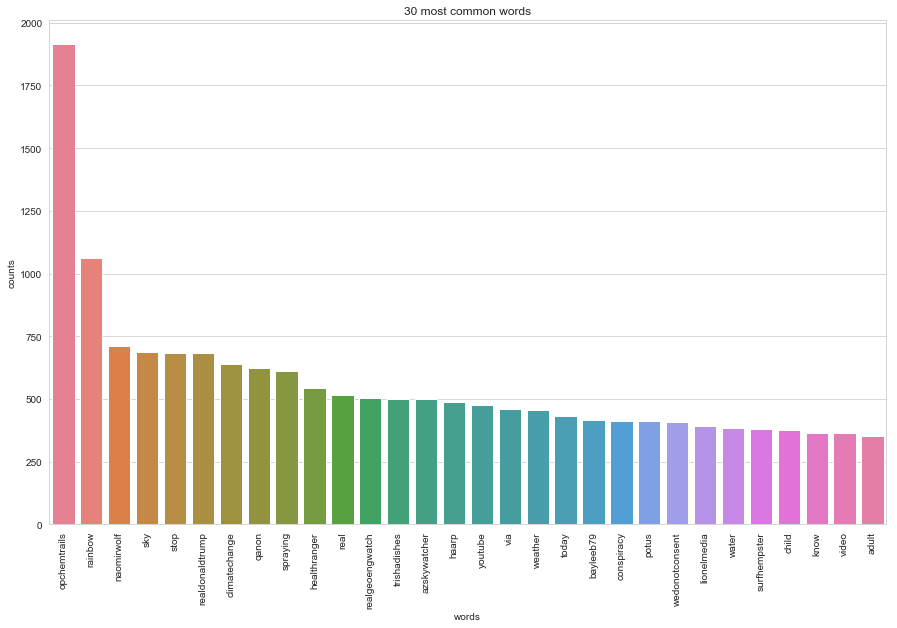

In [8]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

punc_word=set(punctuation)
stop_word=set(stopwords.words("English"))
self_defined_stop_words={"chemtrail","chemtrails ","chemtrails","Chemtrail","Chemtrails","GeoEngineering","geoengineering","IDoNotConsent","WeDoNotConsent","stopsprayingus","amp","geoengineering","idonotconsent","us","people","like"}
new_stop_word=stop_word.union(punc_word,self_defined_stop_words)
sns.set_style('whitegrid')
%matplotlib inline
# Helper function

def plot_30_most_common_ngrams(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='30 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()# Initialise the count vectorizer with the English stop words
    
    
count_vectorizer = CountVectorizer(max_df=0.99,min_df=3,ngram_range=(1,1),stop_words=new_stop_word)# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(full_text_list_processed)# Visualise the 30 most common words
plot_30_most_common_ngrams(count_data, count_vectorizer)

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['wedonotconsent'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


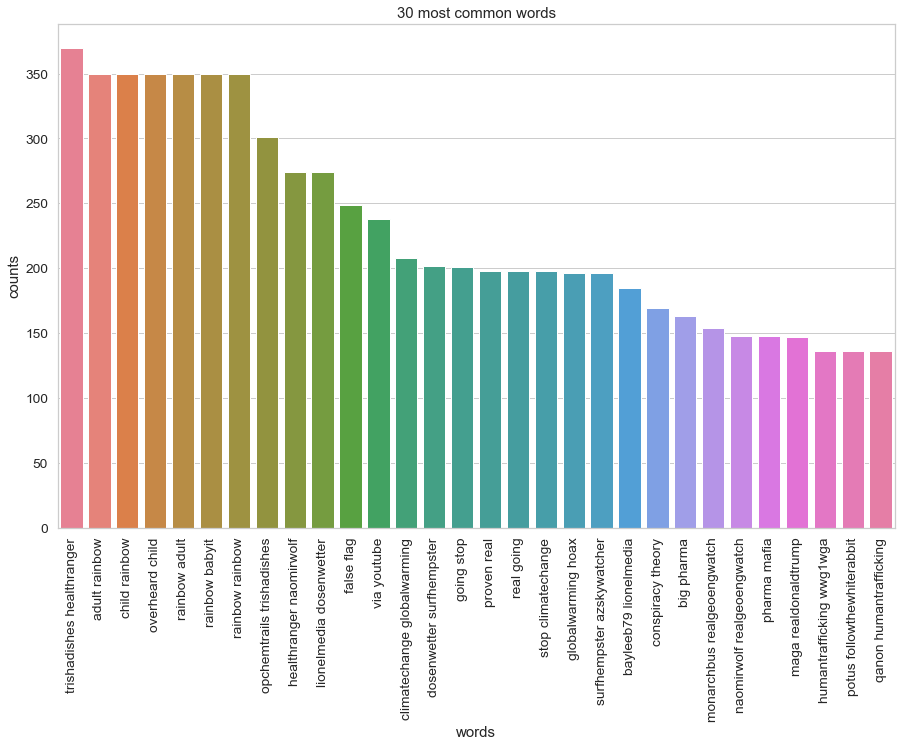

/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['wedonotconsent'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


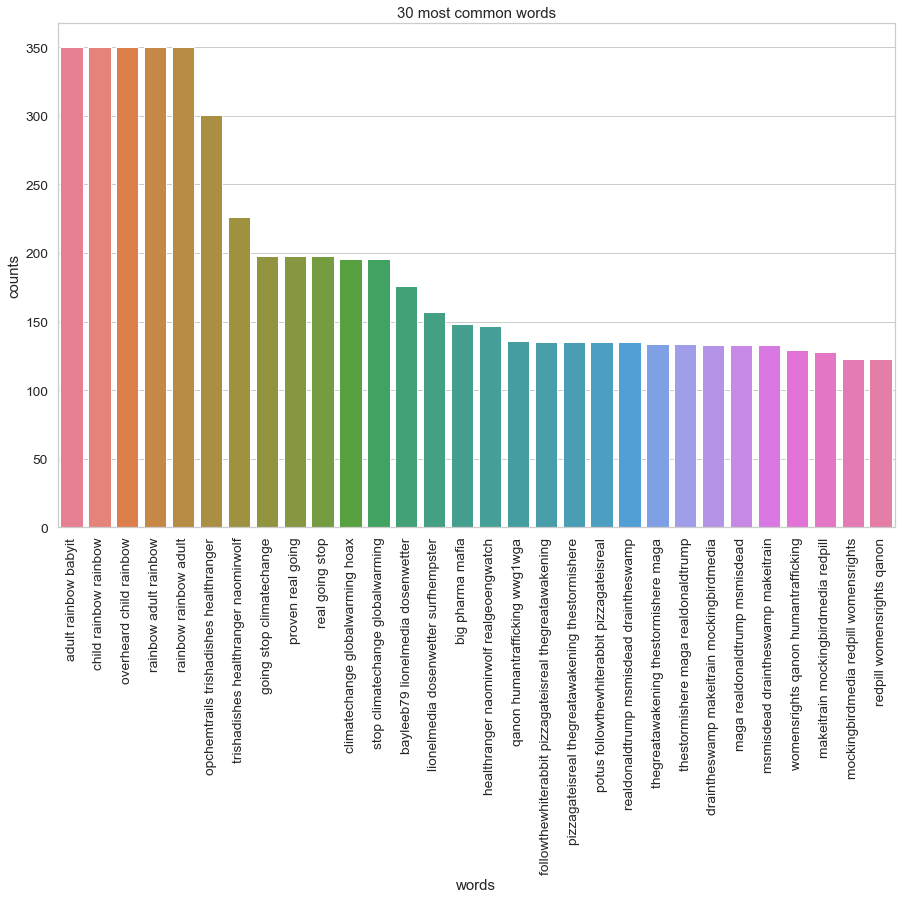

In [7]:
#print most common bigrams    
count_vectorizer = CountVectorizer(max_df=0.99,min_df=3,ngram_range=(2,2),stop_words=new_stop_word)# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(full_text_list_processed)# Visualise the 30 most common words
plot_30_most_common_ngrams(count_data, count_vectorizer)



#print most common trigrams
count_vectorizer = CountVectorizer(max_df=0.99,min_df=3,ngram_range=(3,3),stop_words=new_stop_word)# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(full_text_list_processed)# Visualise the 30 most common words
plot_30_most_common_ngrams(count_data, count_vectorizer)

In [9]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA


import lda
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 20
number_words = 10# Create and fit the LDA model
lda = lda.LDA(n_topics=number_topics)
lda.fit(count_data)# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

INFO:lda:n_documents: 10000
INFO:lda:vocab_size: 5907
INFO:lda:n_words: 124806
INFO:lda:n_topics: 20
INFO:lda:n_iter: 2000
/anaconda3/lib/python3.7/site-packages/lda/utils.py:55: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if sparse and not np.issubdtype(doc_word.dtype, int):
INFO:lda:<0> log likelihood: -1612815
INFO:lda:<10> log likelihood: -947987
INFO:lda:<20> log likelihood: -911407
INFO:lda:<30> log likelihood: -899398
INFO:lda:<40> log likelihood: -892576
INFO:lda:<50> log likelihood: -888459
INFO:lda:<60> log likelihood: -885798
INFO:lda:<70> log likelihood: -883473
INFO:lda:<80> log likelihood: -881159
INFO:lda:<90> log likelihood: -880031
INFO:lda:<100> log likelihood: -879369
INFO:lda:<110> log likelihood: -878306
INFO:lda:<120> log likelihood: -877091
INFO:lda:<130> log likelihood: -875653
INFO:lda:<140> log likelihood: -875395
INFO:lda:<15

INFO:lda:<1960> log likelihood: -867825
INFO:lda:<1970> log likelihood: -868366
INFO:lda:<1980> log likelihood: -867830
INFO:lda:<1990> log likelihood: -868231
INFO:lda:<1999> log likelihood: -868853


Topics found via LDA:

Topic #0:
trump haarp illuminati really weatherwarfare causing got lizard quite options

Topic #1:
opchemtrails day pamjonesliberty wedonotconsent today sun skies spraying lookup beautiful

Topic #2:
see truth look one know tell skies would go want

Topic #3:
qanon realdonaldtrump potus maga thegreatawakening wwg1wga followthewhiterabbit redpill humantrafficking thestormishere

Topic #4:
youtube via video spraying doctor lung liked chem worldwide daily

Topic #5:
believe world new earth health lung still please one get

Topic #6:
opchemtrails global climate normal say think hell know via stop

Topic #7:
haarp 5g agenda21 emf wifi weather lookup wedonotconsent agenda2030 silentwarfare

Topic #8:
false flag water fluoride gov food sky pollution care toxins

Topic #9:
realdonaldtrump cia epa realalexjones potus billgates idaho cloudseeding usairforce truth

Topic #10:
opchemtrails srm weathermodification wedonotconsent look sulphuricacid aerosols chemical haarp alum

In [10]:
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize 
from collections import Iterable
#print(full_text_list_processed)
"""def generate_ngrams(lst, n):
    # Convert to lowercases
    token_list=[]
    for i in range(len(lst)):
        s=lst[i]
        # Replace all none alphanumeric characters with spaces
        #s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s) 
        # Break sentence in the token, remove empty tokens
        temp_list=word_tokenize(s)
        for i in temp_list:        
            token_list.append(i)
    print(token_list)
    # Use the zip function to help us generate n-grams
    # Concatentate the tokens into ngrams and return
    output = list(ngrams(token_list, 5))
    #print(output)
    return output
generate_ngrams(full_text_list_processed,2)"""


['usaf', 'whistleblower', 'talks', 'chemtrails', 'geoengineering', '5', '1', '18', 'south', 'jersey', 'opchemtrails', 'opchemtrails', 'geoengineering', 'chemtrails', 'chemicalattack', 'as', 'the', 'unconscious', 'walk', 'around', 'ignoring', 'the', 'fate', 'of', 'humanity', 'a', 'few', 'of', 'us', 'are', 'trying', 'to', 'save', 'it', 'but', 'they', 'love', 'their', 'ignorance', 'slavery', 'so', 'much', 'it', 's', 'mind', 'numbing', '5', '3', '18', 'south', 'jersey', 'opchemtrails', 'opchemtrails', 'chemtrails', 'geoengineering', 'and', 'it', 'continues', 'on', 'amp', 'on', 'amp', 'on', 'as', 'no', 'one', 'looks', 'up', 'or', 'even', 'takes', 'a', 'flyer', 'amazing', 'brainwashedinfants', 'wakeupamerica', 'think', 'why', 'sint', 'trump', 'stopping', 'chemtrails', 'getting', 'worse', 'thicker', 'lower', 'is', 'trump', 'a', 'bush', 'man', 'hitler', 'the', 'latest', 'fake', 'cloud', 'watch', 'thanks', 'to', 'parzival1', 'skylookup1775', 'davebrooker322', 'chemtrails', 'geoengineering', 'ho

[('usaf', 'whistleblower', 'talks', 'chemtrails', 'geoengineering'),
 ('whistleblower', 'talks', 'chemtrails', 'geoengineering', '5'),
 ('talks', 'chemtrails', 'geoengineering', '5', '1'),
 ('chemtrails', 'geoengineering', '5', '1', '18'),
 ('geoengineering', '5', '1', '18', 'south'),
 ('5', '1', '18', 'south', 'jersey'),
 ('1', '18', 'south', 'jersey', 'opchemtrails'),
 ('18', 'south', 'jersey', 'opchemtrails', 'opchemtrails'),
 ('south', 'jersey', 'opchemtrails', 'opchemtrails', 'geoengineering'),
 ('jersey', 'opchemtrails', 'opchemtrails', 'geoengineering', 'chemtrails'),
 ('opchemtrails',
  'opchemtrails',
  'geoengineering',
  'chemtrails',
  'chemicalattack'),
 ('opchemtrails', 'geoengineering', 'chemtrails', 'chemicalattack', 'as'),
 ('geoengineering', 'chemtrails', 'chemicalattack', 'as', 'the'),
 ('chemtrails', 'chemicalattack', 'as', 'the', 'unconscious'),
 ('chemicalattack', 'as', 'the', 'unconscious', 'walk'),
 ('as', 'the', 'unconscious', 'walk', 'around'),
 ('the', 'uncon

In [52]:
#This block is for interactive graph generating
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
import os
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
    """with open(LDAvis_data_filepath, 'w') as f:
         pickle.dump(LDAvis_prepared, f)"""
        
# load the pre-prepared pyLDAvis data from disk
"""with open(LDAvis_data_filepath) as f:
    LDAvis_prepared = pickle.load(f)"""
    
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


CPU times: user 8.57 s, sys: 45.8 s, total: 54.4 s
Wall time: 2min 7s


In [9]:
#try getting the number of tweets by people, find the people who are tweeting the most, try getting the number of followers by people, finding the people who are tweeting the most and have a lot of followers
unique_tweeter_list=[]
follower_num_list=[]
friends_num_list=[]
status_num_list=[]
for i in range(len(ex_df_1)):
    tweeter_name=ex_df_1.user.iloc[i].get('name')
    follower_num=ex_df_1.user.iloc[i].get('followers_count')
    friends_num=ex_df_1.user.iloc[i].get('friends_count')
    status_num=ex_df_1.user.iloc[i].get('statuses_count')
    if tweeter_name not in unique_tweeter_list:
        unique_tweeter_list.append(tweeter_name)
        follower_num_list.append(follower_num)
        friends_num_list.append(friends_num)
        status_num_list.append(status_num)
#print(unique_tweeter_list)
#print(follower_num_list)
#print(friends_num_list)
tweeting_frequency_list=[]

for j in unique_tweeter_list:
    num=0
    for i in range(len(ex_df_1)):
        if ex_df_1.user.iloc[i].get('name')==j:
            num+=1
    tweeting_frequency_list.append(num)

#print(tweeting_frequency_list)

tweeting_df=pd.DataFrame(list(zip(unique_tweeter_list, tweeting_frequency_list,follower_num_list,friends_num_list,status_num_list)), 
                 columns =['Name', 'num_tweeting','num_follower','num_friends','total_status_num']) 
tweeting_df=tweeting_df.sort_values(by='num_tweeting', ascending=False)
print(tweeting_df)

#grouped=ex_df_1.groupby(unique_tweeter_list)
#size=grouped.size().sort_values(ascending=False)
#grouped['count_sum'] = ex_df.groupby('id_str').count()
#grouped.sort_index(ascending=False)
#print(size)



                         Name  num_tweeting  num_follower  num_friends  \
32          Dr. Amany Alazraq          1370         57963        59971   
1             Mohamed Solomon           323          1573         4180   
38                Dan Peacock           129           430          520   
286              OpChemtrails            76         14035         1945   
737             AZ SKYwatcher            67          3157         3073   
...                       ...           ...           ...          ...   
1901             Eagle Bite U             1           117          201   
1902        💥Cannonmouth7777💥             1           135          165   
1903  The Anonymous Podcaster             1          1660         1194   
1905            Freedom Trail             1           277          253   
4572              El*A*Kwents             1          1559          688   

      total_status_num  
32               79830  
1                 5373  
38                4195  
286        

In [10]:
#try getting the people who are RT-ed the most and their follower count
unique_tweeter_list=[]
follower_num_list=[]
friends_num_list=[]
status_num_list=[]
retweeted_num_list=[]
#print(ex_df_1.retweeted_status.iloc[1].get('user').get('screen_name'))
#print(ex_df_1.retweeted_status.iloc[1].get('user').get('followers_count'))
#print(ex_df_1.retweeted_status.iloc[1].get('user').get('friends_count'))
for i in range(len(ex_df_1)):
    if pd.isnull(ex_df_1.retweeted_status.iloc[i])==False:#this tweet is RTing someone else's tweet, find the original author and follower count, friends count and the status count of the original author, also figure out the RT-count of each tweet (add all the RT-count of each tweet for the same user to get the number of times that author is being RTed)
        tweeter_name=ex_df_1.retweeted_status.iloc[i].get('user').get('screen_name')
        follower_num=ex_df_1.retweeted_status.iloc[i].get('user').get('followers_count')
        friends_num=ex_df_1.retweeted_status.iloc[i].get('user').get('friends_count')
        status_num=ex_df_1.retweeted_status.iloc[i].get('user').get('statuses_count')
        if tweeter_name not in unique_tweeter_list:
            unique_tweeter_list.append(tweeter_name)
            follower_num_list.append(follower_num)
            friends_num_list.append(friends_num)
            status_num_list.append(status_num)
print(unique_tweeter_list)
print(follower_num_list)
print(friends_num_list)
print(status_num_list)


for i in unique_tweeter_list:
    retweeted_count=0
    for j in range(len(ex_df_1)):
        if pd.isnull(ex_df_1.retweeted_status.iloc[j])==False:#this tweet is RTing someone else's tweet, find the original author and follower count, friends count and the status count of the original author, also figure out the RT-count of each tweet (add all the RT-count of each tweet for the same user to get the number of times that author is being RTed)
            tweeter_name=ex_df_1.retweeted_status.iloc[j].get('user').get('screen_name')
        if tweeter_name==i:
            retweeted_count+=1
    retweeted_num_list.append(retweeted_count)
print(retweeted_num_list)


retweeting_df=pd.DataFrame(list(zip(unique_tweeter_list, retweeted_num_list,follower_num_list,friends_num_list,status_num_list)), 
                 columns =['Name', 'num_retweeted','num_follower','num_friends','total_status_num']) 
retweeting_df=retweeting_df.sort_values(by='num_retweeted', ascending=False)
print(retweeting_df)


['tbigggs', 'fakecloudwatch', 'SteerMark', 'Uniocracy', 'IanSeine', 'whowrotewhat', 'libertyIAB', 'chairdogmtn', 'Worldmuslimnews', 'MindFoodandMood', 'whymandesign', 'WisdomsGrave', 'TrillegalAlien', 'IEAffiliate', 'ivanpresley88', 'EnslavedUS', 'crissie111', 'DBYWG', 'GreatAwakening6', 'Simply1Earth', 'TalkNetworkNews', 'SPP_kwalker', 'peterbonda007', 'DavidHarley6', 'exoticmilkppl', 'ExVaXXr', 'jasdude', 'AllesHeilHydra', 'CosmUnity', 'Scimitar_SS', 'ALoveGlow', 'Carmilla5', 'OpChemArchives', 'Tazatator', 'discotracker', 'Rod1015', 'bigherm3953', 'CarrieGaard', 'DJ___Mission', 'James_Enslaved', 'ARC4Freedom', 'TraceyCooke1027', 'Mark9229', 'one5three', 'EvieFransisco', 'bsibley97', 'tikitakahasi', 'RealAbbyNormale', 'HealthRanger', 'ddtayside', 'GrahamP58', 'LadyWilson8', 'DanPeacock12', 'Genevagirl81', 'GillianSproule', 'culture_scrap', 'RealNaturalNews', 'DukeDaddy4', 'Cagsil', 'Gorgiee99', 'kubashacka', 'docsgenes', 'ThisLionsheart', 'NinjaAlex420', 'SimpleGroup_Inc', 'Ambellina7

[146, 7, 304, 255, 16, 3, 5, 2, 7, 3, 9, 15, 16, 11, 3, 2, 3, 3, 6, 3, 2, 4, 2, 2, 31, 2, 3, 2, 22, 4, 49, 3, 7, 2, 3, 4, 4, 2, 2, 2, 4, 2, 5, 7, 24, 2, 4, 15, 571, 128, 80, 56, 378, 8, 17, 2, 24, 9, 46, 1, 7, 2, 1, 1, 1, 2, 3, 1, 176, 163, 119, 47, 2, 189, 16, 74, 333, 33, 15, 1, 11, 3, 3, 2, 240, 66, 5, 5, 19, 6, 17, 20, 46, 9, 3, 14, 99, 56, 8, 4, 79, 19, 7, 6, 3, 5, 16, 14, 9, 2, 50, 6, 7, 4, 1, 7, 2, 2, 2, 2, 29, 3, 1, 4, 3, 4, 14, 27, 19, 3, 1, 2, 5, 16, 9, 5, 1, 9, 11, 4, 10, 27, 2, 20, 4, 12, 6, 4, 3, 5, 4, 2, 5, 3, 2, 10, 4, 4, 13, 14, 116, 6, 2, 1, 1, 3, 11, 1, 8, 11, 41, 1, 1, 6, 6, 37, 64, 52, 19, 30, 3, 3, 1, 12, 24, 6, 1, 3, 2, 4, 3, 25, 106, 2, 1, 10, 2, 5, 7, 1, 31, 20, 9, 14, 2, 2, 8, 6, 1, 5, 3, 5, 4, 1, 14, 1, 219, 31, 2, 3, 1, 1, 2, 1, 23, 5, 8, 4, 36, 2, 10, 2, 7, 9, 1, 2, 7, 1, 12, 2, 3, 19, 13, 13, 1, 4, 9, 8, 1, 3, 11, 3, 4, 1, 1, 2, 4, 32, 14, 1, 3, 2, 2, 5, 7, 7, 16, 5, 1, 2, 3, 3, 2, 2, 5, 1, 1, 6, 2, 2, 2, 5, 2, 2, 1, 2, 19, 3, 2, 8, 22, 9, 10, 1, 6, 1, 3, 1

In [11]:
#find the ones that are mentioned the most frequently-for RTs, go to retweeted_status and find the user_mentions there
user_mentions_list=[]
for i in range(len(ex_df_1)):
    if len(ex_df_1.entities.iloc[i].get('user_mentions'))>0:
        for j in range(len(ex_df_1.entities.iloc[i].get('user_mentions'))):
            user=ex_df_1.entities.iloc[i].get('user_mentions')[j].get('screen_name')
            if user not in user_mentions_list:
                user_mentions_list.append(user)
print(user_mentions_list)

num_user_mentioned_list=[]
for i in user_mentions_list:
    num=0
    for j in range(len(ex_df_1)):
        if len(ex_df_1.entities.iloc[j].get('user_mentions'))>0:
            for l in range(len(ex_df_1.entities.iloc[j].get('user_mentions'))):
                user=ex_df_1.entities.iloc[j].get('user_mentions')[l].get('screen_name')
                if user==i:
                    num+=1
    num_user_mentioned_list.append(num)
print(num_user_mentioned_list)

user_mention_df=pd.DataFrame(list(zip(user_mentions_list, num_user_mentioned_list)), 
                 columns =['User_Mentioned', 'num_mentioned']) 
user_mention_df=user_mention_df.sort_values(by='num_mentioned', ascending=False)
print(user_mention_df)



['tbigggs', 'OpChemtrails', 'fakecloudwatch', 'parzival1', 'Skylookup1775', 'davebrooker322', 'lockereschraube', 'SteerMark', 'Uniocracy', 'PhillipEnglish', 'Micklanna', 'magapleasenow', 'FoxNews', 'IanSeine', 'Alicia_May_Bee', 'whowrotewhat', 'EllaaaCruzzz', 'realDonaldTrump', 'RealAlexJones', 'AP', 'V4CRMediaTeam', 'DHSgov', 'StateDept', 'UN', 'seanhannity', 'SaraCarterDC', 'libertyIAB', 'chairdogmtn', 'Worldmuslimnews', 'MindFoodandMood', 'whymandesign', 'WisdomsGrave', 'TrillegalAlien', 'IEAffiliate', 'Agenda21Observr', 'naomirwolf', 'Quality_Qontrol', 'NelsonFarmer', 'ivanpresley88', 'EnslavedUS', 'crissie111', 'DBYWG', 'GreatAwakening6', 'B754344255', 'Simply1Earth', 'RockyMt2', 'TalkNetworkNews', 'SPP_kwalker', 'peterbonda007', 'BBCWorld', 'DavidHarley6', 'peter_berner', 'exoticmilkppl', 'ExVaXXr', 'jasdude', 'AllesHeilHydra', 'krassenstein', 'CosmUnity', 'Scimitar_SS', 'VORdotcom', 'Dev_Fadnavis', 'ALoveGlow', 'Carmilla5', 'OpChemArchives', 'Tazatator', 'Cagsil', 'USAShopper', 

[101, 821, 5, 5, 5, 7, 1, 297, 233, 2, 2, 3, 26, 14, 2, 2, 3, 342, 32, 3, 2, 3, 11, 26, 12, 7, 3, 2, 7, 3, 9, 14, 13, 39, 17, 478, 20, 23, 3, 2, 3, 3, 4, 7, 2, 12, 2, 4, 2, 3, 2, 3, 29, 2, 5, 2, 6, 15, 4, 3, 3, 69, 3, 32, 2, 30, 4, 3, 3, 4, 4, 2, 2, 17, 3, 3, 2, 101, 4, 2, 3, 7, 22, 2, 4, 10, 2, 16, 701, 57, 58, 17, 162, 149, 504, 18, 282, 16, 170, 349, 376, 11, 2, 15, 8, 1, 2, 2, 1, 1, 1, 1, 3, 3, 1, 121, 1, 131, 16, 66, 121, 3, 92, 162, 52, 6, 154, 2, 19, 31, 24, 14, 2, 2, 32, 1, 4, 1, 6, 1, 1, 127, 17, 17, 11, 40, 1, 34, 28, 1, 3, 3, 154, 48, 2, 8, 8, 12, 13, 11, 11, 19, 39, 51, 1, 324, 9, 10, 46, 65, 20, 20, 20, 1, 3, 2, 1, 1, 1, 1, 2, 1, 1, 6, 1, 6, 6, 1, 11, 2, 19, 4, 11, 30, 1, 4, 4, 1, 1, 1, 4, 4, 72, 66, 12, 8, 3, 85, 12, 30, 18, 18, 25, 4, 5, 5, 2, 2, 2, 6, 2, 49, 6, 3, 5, 16, 10, 8, 1, 8, 40, 21, 6, 7, 7, 3, 5, 1, 6, 6, 2, 5, 2, 2, 2, 2, 14, 15, 2, 2, 1, 1, 1, 3, 1, 1, 9, 4, 1, 1, 1, 1, 1, 8, 1, 1, 3, 9, 6, 1, 1, 16, 15, 16, 15, 16, 15, 1, 1, 2, 3, 2, 10, 143, 3, 3, 3, 2, 1,

In [12]:
#try getting the urls which are RT-ed the most and analyze if they are virus-free or not
#media_list=[] #Since media is say the media the user uploaded, each media uploaded(even if the content is the same) is supposed to be assigned its own url. In this case I don't think scraping media url is meaningful
#media_mention_list=[]
url_list=[]
url_mention_list=[]
url_user_list=[]
for i in range(len(ex_df_1)):
    if(len(ex_df_1.entities.iloc[i].get('urls'))>0):
        for j in range(len(ex_df_1.entities.iloc[i].get('urls'))):
            url=ex_df_1.entities.iloc[i].get('urls')[j].get('expanded_url')
            if url not in url_list:
                url_list.append(url)
print(url_list)            
for i in url_list:
    num=0
    for j in range(len(ex_df_1)):
        if(len(ex_df_1.entities.iloc[j].get('urls'))>0):
            for m in range(len(ex_df_1.entities.iloc[j].get('urls'))):
                url=ex_df_1.entities.iloc[j].get('urls')[m].get('expanded_url')
                if url==i:
                    num+=1
                    if (ex_df_1.full_text.iloc[j].startswith('RT')& isinstance(ex_df_1.retweeted_status.iloc[j],dict)):    
                        tweeter_name=ex_df_1.retweeted_status.iloc[j].get('user').get('screen_name')
                        url_user_list.append(tweeter_name)
                    else:
                        tweeter_name=ex_df_1.user.iloc[j].get('screen_name')
                        url_user_list.append(tweeter_name)
                        
                    
    url_mention_list.append(num)
print(url_mention_list)

"""for i in url_list:
    for j in range(len(ex_df_1)):
        if (len(ex_df_1.entities.iloc[i].get('urls'))>0):
            for j in range(len(ex_df_1.entities.iloc[i].get('urls'))):
                url=ex_df_1.entities.iloc[i].get('urls')[j].get('expanded_url')
                if url==i:
                    if (ex_df_1.full_text.iloc[j].startswith('RT')& isinstance(ex_df_1.retweeted_status.iloc[j],dict)):
                        tweeter_name=ex_df_1.retweeted_status.iloc[j].get('user').get('screen_name')
                    else:
                        tweeter_name=ex_df_1.user.iloc[j].get('screen_name')
                    url_user_list.append(tweeter_name)
 """       
url_mention_df=pd.DataFrame(list(zip(url_list, url_mention_list, url_user_list)), 
                 columns =['URL_Mentioned', 'num_URL_mentioned', 'starter']) 
url_mention_df=url_mention_df.sort_values(by='num_URL_mentioned', ascending=False)
print(url_mention_df)

['https://www.youtube.com/watch?v=OnML02C7AXc', 'https://paper.li/fakecloudwatch/1422229260?edition_id=83015210-4f2b-11e8-a287-002590a5ba2d', 'http://Express.co.uk', 'https://www.express.co.uk/news/weird/954966/Chemtrails-HAARP-conspiracy-weather-control-geoengineering', 'https://paper.li/Worldmuslimnews/1305910633?edition_id=e3a0a060-4f46-11e8-8cdf-0cc47a0d1609', 'https://paper.li/MindFoodandMood/1325286220?edition_id=37ca5a80-4f26-11e8-8124-0cc47a0d1605', 'https://paper.li/Worldmuslimnews/1305914763?edition_id=25b700b0-4f48-11e8-8cc9-0cc47a0d164b', 'https://youtu.be/l8om21_Jr7c', 'https://paper.li/EnslavedUS/1333636675?edition_id=6a175300-4f33-11e8-9031-0cc47a0d15fd', 'http://ow.ly/JEnK3078LZO', 'https://twitter.com/esotericexposal/status/992064649024626689', 'http://www.loveinactionnow.com/confirmation-evergreen-air/', 'https://twitter.com/FTM_nl/status/992324605149884416', 'https://paper.li/Rod1015/1344613928?edition_id=37fe0bb0-4f89-11e8-8cdf-0cc47a0d1609', 'https://paper.li/carri

[5, 5, 8, 4, 3, 5, 3, 4, 3, 3, 4, 4, 2, 9, 3, 3, 3, 1, 1, 1, 33, 2, 2, 199, 1, 1, 1, 1, 6, 1, 1, 1, 2, 1, 1, 17, 10, 13, 3, 23, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 12, 1, 1, 1, 3, 1, 1, 2, 1, 4, 2, 4, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 2, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 5, 23, 1, 2, 1, 1, 1, 1, 4, 3, 2, 1, 2, 1, 22, 1, 12, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 11, 3, 1, 1, 5, 4, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 6, 6, 1, 2, 4, 3, 1, 2, 2, 2, 6, 5, 1, 3, 4, 4, 5, 1, 2, 4, 11, 2, 1, 1, 1, 1, 3, 3, 7, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 17, 1, 1, 1, 1, 6, 7, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 3, 1, 6, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 4, 1, 3, 1, 3, 1, 2, 2, 4, 1, 3, 4, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 4, 2, 2

In [10]:
headers = {
    'Accept-Encoding': 'gzip, deflate, sdch',
    'Accept-Language': 'en-US,en;q=0.8',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Cache-Control': 'max-age=0',
    'Connection': 'keep-alive',
}
def expand_url(url):
#for i in range(len(url_mentioned)):
    if url not in already_expanded_url:
        session = requests.Session()
        try:
            r = session.head(url, allow_redirects=True, timeout=10, headers=headers)
            print(r.url)
            if r.url!=None and r.url not in expanded_url_list:
                expanded_url_list.append(r.url)
                already_expanded_url.append(url)
                #url_starter_unique_list.append(url_starter_list[i])
                return r.url
        except requests.Timeout:
            session = requests.Session()
        except requests.exceptions.ConnectionError:
            print("Connection refused")
            already_expanded_url.append(url)
        except:
            print("some kind of exceptions happened")
            already_expanded_url.append(url)
#print(expanded_url_list)
url_list=[]
expanded_url_list=[]
already_expanded_url=[]
#url_starter_unique_list=[]
url_mention_list=[]
url_user_list=[]
for i in range(len(ex_df_1)):
    if(len(ex_df_1.entities.iloc[i].get('urls'))>0):
        for j in range(len(ex_df_1.entities.iloc[i].get('urls'))):
            url=ex_df_1.entities.iloc[i].get('urls')[j].get('expanded_url')
            if expand_url(url)!=None:
                url_list.append(url)
print(url_list)            
for i in url_list:
    num=0
    for j in range(len(ex_df_1)):
        if(len(ex_df_1.entities.iloc[j].get('urls'))>0):
            for m in range(len(ex_df_1.entities.iloc[j].get('urls'))):
                url=ex_df_1.entities.iloc[j].get('urls')[m].get('expanded_url')
                if url==i:
                    num+=1
                    if (ex_df_1.full_text.iloc[j].startswith('RT')& isinstance(ex_df_1.retweeted_status.iloc[j],dict)):    
                        tweeter_name=ex_df_1.retweeted_status.iloc[j].get('user').get('screen_name')
                        url_user_list.append(tweeter_name)
                    else:
                        tweeter_name=ex_df_1.user.iloc[j].get('screen_name')
                        url_user_list.append(tweeter_name)
                        
                    
    url_mention_list.append(num)
print(url_mention_list)

"""for i in url_list:
    for j in range(len(ex_df_1)):
        if (len(ex_df_1.entities.iloc[i].get('urls'))>0):
            for j in range(len(ex_df_1.entities.iloc[i].get('urls'))):
                url=ex_df_1.entities.iloc[i].get('urls')[j].get('expanded_url')
                if url==i:
                    if (ex_df_1.full_text.iloc[j].startswith('RT')& isinstance(ex_df_1.retweeted_status.iloc[j],dict)):
                        tweeter_name=ex_df_1.retweeted_status.iloc[j].get('user').get('screen_name')
                    else:
                        tweeter_name=ex_df_1.user.iloc[j].get('screen_name')
                    url_user_list.append(tweeter_name)
 """       
url_mention_df=pd.DataFrame(list(zip(expanded_url_list, url_mention_list, url_user_list)), 
                 columns =['URL_Mentioned', 'num_URL_mentioned', 'starter']) 
url_mention_df=url_mention_df.sort_values(by='num_URL_mentioned', ascending=False)
print(url_mention_df)

https://www.youtube.com/watch?v=OnML02C7AXc
https://paper.li/fakecloudwatch/1422229260?edition_id=83015210-4f2b-11e8-a287-002590a5ba2d
https://www.express.co.uk/
https://www.express.co.uk/news/weird/954966/Chemtrails-HAARP-conspiracy-weather-control-geoengineering
https://paper.li/Worldmuslimnews/1305910633?edition_id=e3a0a060-4f46-11e8-8cdf-0cc47a0d1609
https://paper.li/MindFoodandMood/1325286220?edition_id=37ca5a80-4f26-11e8-8124-0cc47a0d1605
https://paper.li/Worldmuslimnews/1305914763?edition_id=25b700b0-4f48-11e8-8cc9-0cc47a0d164b
https://www.youtube.com/watch?v=l8om21_Jr7c&feature=youtu.be
https://paper.li/EnslavedUS/1333636675?edition_id=6a175300-4f33-11e8-9031-0cc47a0d15fd
http://talknetwork.com/2016-12-14-chemtrails-fully-exposed-video.html
https://twitter.com/esotericexposal/status/992064649024626689
http://www.loveinactionnow.com/confirmation-evergreen-air/
https://twitter.com/FTM_nl/status/992324605149884416
https://paper.li/Rod1015/1344613928?edition_id=37fe0bb0-4f89-11e8-8

https://twitter.com/dhanyarajendran/status/992279272994750465
https://twitter.com/Simply1Earth/status/992280716988768256
https://www.youtube.com/watch?v=O7lbzIxqXEk&feature=youtu.be&a
https://www.changpuak.ch/electronics/downloads/US20050056705.pdf
https://www.youtube.com/watch?v=DgKdzUZtP2g&feature=youtu.be
https://www.youtube.com/watch?v=yWUo_k3oQFA&feature=youtu.be
https://www.youtube.com/watch?v=mEfJO0-cTis
https://www.youtube.com/watch?v=X3lW-TGGlk0
https://www.youtube.com/watch?v=DTxvWLrUeE8&feature=youtu.be
https://www.youtube.com/watch?v=ybWku-lJe6I
https://twitter.com/thehumanxp/status/992267537080446977
https://twitter.com/Reuters/status/992265815541014528
https://twitter.com/sara8smiles/status/992068535579967490
https://www.youtube.com/watch?v=kKQyDYOzrzA&feature=youtu.be&a
https://vimeo.com/222928194
https://www.facebook.com/story.php?story_fbid=1533333866775034&id=100002953071673
http://www.thelibertybeacon.com/why-are-the-chemtrails-worse-than-ever-open-letter-to-presiden

https://www.youtube.com/watch?v=1SNucZqKHsM&feature=youtu.be&a
http://www.earth-heal.com/videos/viewvideo/9564/doctor-confirms-worldwide-chem-lung-disease-daily-chemtrail-spraying-is-relentless-now.html?utm_source=feedburner&utm_medium=twitter&utm_campaign=Feed%3A+EarthHealVideos+%28Earth+Heal+Videos%29
https://twitter.com/cchqpress/status/992165093927505920
https://www.google.com/search?q=Poison+jet+chemtrails&client=firefox-b-1&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjjgYLXzeraAhUlpFkKHdHyBFEQ_AUICygC&biw=917&bih=343
https://www.youtube.com/watch?v=PwRzIgsB1-8
https://www.youtube.com/watch?v=fHmlQWVFaoo&feature=youtu.be
https://www.youtube.com/watch?v=oK6egwrHyBY&feature=youtu.be
https://www.youtube.com/watch?v=eRD-bmB7EF8&feature=youtu.be
https://www.youtube.com/watch?v=SlG_G67mVOE&feature=youtu.be
https://www.youtube.com/watch?v=ZozDHUMhulE&feature=youtu.be
https://twitter.com/TheBossEisen/status/992128446229897216
https://www.youtube.com/watch?v=_pDElSzQVa0&feature=youtu.be
https://w

https://www.dailystar.co.uk/news/world-news/china-control-weather-artificial-rain-17127255
https://www.chicagotribune.com/news/breaking/ct-met-chicago-shootings-violence-20180426-story.html
https://www.theweathernetwork.com/us/news/articles/cold-great-lakes-upper-midwest-detroit-michigan-chicago-buffalo-new-york-wisconsin-april-record-temperature-/100189
https://www.cbsnews.com/amp/news/could-cloud-seeding-help-with-californias-drought/?__twitter_impression=true
https://www.theguardian.com/us-news/2018/apr/30/fda-weedkiller-glyphosate-in-food-internal-emails?CMP=share_btn_tw
https://www.theguardian.com/world/2018/apr/30/egypt-crackdown-fake-weather-reports-meteorological-association
https://www.youtube.com/watch?v=4WL3CDacD-Y&feature=youtu.be&a
https://www.youtube.com/watch?v=xVZouTcTljI&feature=youtu.be&a
https://www.sciencedaily.com/releases/2015/01/150128141417.htm
https://www.youtube.com/watch?v=-gepGcF5C6E&feature=youtu.be&a
https://www.youtube.com/watch?v=aTih9KWe90Y&feature=yout

https://paper.li/EvieFransisco/1406204941?edition_id=546d91f0-4884-11e8-9684-0cc47a0d164b
https://paper.li/EvieFransisco/1406204941?edition_id=63682840-494d-11e8-9684-0cc47a0d164b
https://paper.li/EvieFransisco/1406204941?edition_id=8bcbdf10-4a16-11e8-9684-0cc47a0d164b
https://paper.li/EvieFransisco/1406204941?edition_id=b81e5c40-4adf-11e8-9684-0cc47a0d164b
https://paper.li/EvieFransisco/1406204941?edition_id=e2ad7e90-4ba8-11e8-9684-0cc47a0d164b
https://paper.li/EvieFransisco/1406204941?edition_id=0bb082a0-4c72-11e8-9684-0cc47a0d164b
https://paper.li/EvieFransisco/1406204941?edition_id=375e8270-4d3b-11e8-8cc9-0cc47a0d164b
https://www.independent.co.uk/news/uk/politics/windrush-scandal-tories-vote-block-release-secret-documents-a8333501.html?utm_campaign=Echobox&utm_medium=Social&utm_source=Facebook#link_time=1525285678
http://southdakotaprogressive.blogspot.com/2018/04/another-round-of-geoengineering.html
https://twitter.com/i/moments/991918586355531776
https://www.youtube.com/watch?v=

https://twitter.com/sixbennetts/status/991824868109963264
https://twitter.com/Kal1_Furies/status/991827005199929345
https://twitter.com/HealthRanger/status/991331733965627392
https://lighthascome.com/2018/05/02/very-disturbing-that-people-dismiss-this-doctor-confirms-worldwide-chem-lung-disease-daily-chemtrail-spraying-is-relentless-now-aplanetruth/
https://dreddymd.com/2017/11/11/are-chemtrails-making-us-sick/
Connection refused
https://www.youtube.com/watch?v=uIjDOPoZMD4&feature=youtu.be&a
https://twitter.com/jackposobiec/status/991846180899512320
https://twitter.com/fuckyoumiyn/status/991845650307301379
https://www.youtube.com/watch?v=zOH8SoZyrBU&feature=youtu.be
https://www.geoengineeringwatch.org/
https://www.youtube.com/watch?v=oj8pAgUZLJI
https://www.youtube.com/playlist?list=PLHkINh-2NuX-aue8AbxaWcspg_NL6mAsg
https://www.youtube.com/watch?list=PLwfFtDFZDpwulG0PJ9IID0iypsRXDSa1E&v=iK9nVR9H34g
https://www.youtube.com/watch?v=mRjmzy9XcaY&index=2&list=PLwfFtDFZDpwulG0PJ9IID0iypsRXD

https://www.pscp.tv/w/bVtCNDFYSmpra05CT3JEakx8MUJSSmpyRG1wenZKdzu3s8hjdMHT5awsyWQQC9RhmAEzdSVrF7zok7K5YbD-
https://www.pscp.tv/w/bazfrDFYSmpra05CT3JEakx8MU1ueG5lWkVkZE9KT-dKe-LR68xmweDd2OAZmhzw4rbcuOTKLnhnbaTJiU5v
https://www.youtube.com/watch?v=mOhyHC4XQak&feature=youtu.be
https://twitter.com/rezn8d/status/991815296309743617
https://www.youtube.com/watch?v=IqATQtwOY34&feature=youtu.be
https://www.youtube.com/watch?v=J-vd_nOCnsA&t=35s&index=18&list=PLcuzO9ZZp1jZEmn9AjV-vPW9a-sI32Rpf
https://www.youtube.com/watch?v=zxJm9z8UwFc&index=62&t=0s&list=WL
https://www.youtube.com/watch?v=KMlE6aiDFfY
https://www.youtube.com/watch?v=DaVwdJUniOk&feature=youtu.be
https://www.aircrap.org/2017/06/21/just-released-frankenskies-full-length-documentary-matt-landman/
https://www.youtube.com/watch?v=zNeOTOytEeA&feature=youtu.be
https://www.aircrap.org
https://www.aircrap.org/2017/01/17/former-newspaper-editor-exposed-cia-found-dead/
https://www.aircrap.org/2018/04/03/whorporate-media-tv-mass-scripting-of-

https://www.latimes.com/local/lanow/la-me-ln-l-a-officials-seeded-clouds-during-el-nino-storm-in-hopes-of-more-rain-20160308-story.html
https://www.wnd.com/2016/04/sky-criminals/#hdD3liOQTTbdCw9d.99
https://www.nytimes.com/2016/08/16/science/scientists-just-say-no-to-chemtrails-conspiracy-theory.html
http://www.dailymail.co.uk/news/article-2095728/Could-infection-mysterious-Tourettes-like-syndrome-affecting-teenagers.html
https://www.theguardian.com/uk/2001/aug/30/sillyseason.physicalsciences
https://finance.yahoo.com/news/nasa-put-colorful-cloud-show-184700916.html
https://www.washingtonpost.com/blogs/ezra-klein/post/so-you-want-to-manipulate-the-earths-climate---/2011/10/04/gIQABXrVLL_blog.html
https://www.cbsnews.com/news/morgellons-disease-exists-only-in-patients-minds-study-shows/
https://www.theguardian.com/environment/2012/feb/09/at-war-over-geoengineering?CMP=twt_gu
https://www.theguardian.com/environment/blog/2011/oct/06/us-push-geoengineering?CMP=twt_gu
http://www.dailymail.c

https://paper.li/EvieFransisco/1406204941?edition_id=61c9a200-4e04-11e8-8cc9-0cc47a0d164b
https://www.youtube.com/watch?v=nAubDV0Nroc&feature=youtu.be&a
https://www.youtube.com/watch?list=WL&v=Agvex4sng98
https://www.youtube.com/watch?v=j91uvSkDDAg
https://twitter.com/Ah_Science/status/991704062302261248
https://www.youtube.com/watch?v=ZwMOvbA6jAQ&feature=youtu.be&a
https://a.msn.com/01/en-us/AAwAx9R?ocid=st
https://gab.com/Kongpancake/posts/24920077
https://www.youtube.com/watch?v=z8VZ2rg65gQ
https://www.newjerseystage.com/events/viewevent.php?titlelink=chemtrail-at-the-saint-in-asbury-park-nj-on-2018-05-04-at-700pm
https://twitter.com/MagtathMaggie/status/991695238233145345
https://thedailyconspiracy.com/2017/11/21/the-shocking-truth-about-toxic-chemtrails/
https://www.youtube.com/watch?v=lo7Pf37tMpw&feature=youtu.be
https://www.youtube.com/watch?v=MuuCIbVd6t4&feature=youtu.be
https://www.youtube.com/watch?v=F2YYygHKJH8&feature=youtu.be
https://www.youtube.com/watch?v=F2YYygHKJH8&fea

https://www.geoengineeringwatch.org/global-weather-modification-assault-causing-climate-chaos-and-environmental-catastrophe-2/
https://www.youtube.com/watch?v=-V2IG-Wp6_4
https://www.geoengineeringwatch.org/climate-engineering-insanity-manufacturing-winter-weather-with-tropical-moisture/
https://www.youtube.com/watch?v=j7TOPdn_d6o&feature=youtu.be
https://www.youtube.com/watch?v=nlDhoWbXe9k&feature=youtu.be
https://defendressofsanity81.wordpress.com/2018/04/22/watch-chemtrails-killing-my-trees-wolverhampton-uk-wv10-on-youtube/
https://www.youtube.com/watch?v=DXnyUssNAHQ
https://gab.com/jerrynailedit/posts/24299999
https://www.youtube.com/watch?v=ux-vj7bhUnU&feature=youtu.be
https://defendressofsanity81.wordpress.com/2018/04/22/watch-jaxn-times-chemtrails-have-devastated-the-forests-on-youtube/
https://www.youtube.com/watch?v=iIJay28Qebo&feature=youtu.be
https://defendressofsanity81.wordpress.com/2018/04/22/watch-from-trees-to-cactus-chemtrails-must-stop-on-youtube/
https://www.youtube.

https://operationdisclosure.blogspot.com/2018/04/chemtrails-are-changing-our-dna.html?utm_source=feedburner&utm_medium=email&utm_campaign=Feed:+OperationDisclosure+(Operation+Disclosure
https://www.youtube.com/watch?v=jI77DkUsOQE&feature=youtu.be
https://twitter.com/TakeThatClouds/status/987940393110134786
https://twitter.com/TakeThatClouds/status/987939315908005889
https://www.youtube.com/watch?v=Tcfc8L-Jmew
https://www.youtube.com/watch?v=j7TOPdn_d6o&feature=youtu.be
https://www.youtube.com/watch?v=j7TOPdn_d6o&feature=youtu.be
https://twitter.com/TIME/status/987900068589162497
https://www.youtube.com/watch?v=j7TOPdn_d6o&feature=youtu.be
https://www.youtube.com/watch?v=j7TOPdn_d6o&feature=youtu.be
Connection refused
https://www.youtube.com/watch?v=hfBxmmD2WV8&feature=youtu.be&a
https://www.teepublic.com/t-shirt/2616166-truther-word-cloud?utm_source=designer&utm_medium=social&utm_campaign=Stoney09
https://www.youtube.com/watch?v=j7TOPdn_d6o&feature=youtu.be
https://www.teezily.com/de-c

http://www.conspiracyplanet.com/channel.cfm?ChannelID=42
https://twitter.com/naomirwolf/status/987470135190605826
https://www.youtube.com/watch?v=lZaD-H_j3pU&feature=player_embedded
https://twitter.com/MickStanhope1/status/987796649098465280
https://www.youtube.com/watch?v=QSXAebhv2_I&feature=youtu.be
https://twitter.com/ilarieyes/status/987737040547733509
https://www.youtube.com/watch?v=2FVMwv2eANs
https://www.youtube.com/watch?v=2FVMwv2eANs&feature=youtu.be&a
https://www.youtube.com/watch?v=pNrMhGPA-Zw&feature=share
https://twitter.com/realdonaldtrump/status/987786331995672576
https://theoutline.com/post/1568/chemtrail-truthers-are-still-waiting-for-trump-to-do-something
https://www-express-co-uk.cdn.ampproject.org/v/s/www.express.co.uk/news/weird/816069/Donald-Trump-chemtrails-plane-ban-chemtrails/amp?usqp=mq331AQGCAEYASgB&amp_js_v=0.1
https://www.youtube.com/watch?v=VY4gNojm9J8&feature=share
https://www.youtube.com/watch?v=pqKx1DQI4Mk&feature=youtu.be
https://www.facebook.com/Spiri

https://www.veritasradio.com/guests/2018/04apr/VS-180419-mlandman.php
https://www.facebook.com/ByzantineFlowers/posts/2115744921771380
https://www.youtube.com/watch?v=Ql9mFtanAIA&feature=youtu.be
https://sierrahotel.net/collections/chemtrail-dept/products/chemtrail-t-shirt
https://twitter.com/ConversationUS/status/987656520631574528
https://www.youtube.com/watch?v=b0rQsOXv5WQ&feature=youtu.be&a
https://www.youtube.com/watch?v=m-78uXEUECs&feature=youtu.be
Connection refused
https://www.youtube.com/watch?v=0O3RmyaX7ec
https://wtvr.com/
https://www.youtube.com/watch?v=_dLCtgHzwWI
https://www.youtube.com/channel/UC8Jo5fT6vgmRbDh6IpL7K2A/videos
https://www.youtube.com/watch?v=Tcfc8L-Jmew&feature=youtu.be
https://www.youtube.com/watch?time_continue=26&v=WBG81dXgM0Q
https://accounts.google.com/ServiceLogin?passive=1209600&osid=1&continue=https://plus.google.com/104525759892285018760/posts/GCsAmtFNPYt?_utm_source%3D1-2-4&followup=https://plus.google.com/104525759892285018760/posts/GCsAmtFNPYt?

https://www.youtube.com/watch?v=EVTKpr5er1k&feature=youtu.be&a
https://www.rsc.org/periodic-table/element/1/hydrogen
https://www.youtube.com/watch?v=dmCAuTAKC78&feature=youtu.be&a
https://www.youtube.com/watch?v=v5Z--_-Gnns&feature=youtu.be
https://twitter.com/SagiOrli/status/987387927163490306
https://www.instagram.com/p/BhzlxBshz10/
https://www.youtube.com/watch?v=8dkiPT2w3nQ&feature=youtu.be
https://sci.esa.int/web/cluster/-/44012-cluster-detects-invisible-escaping-ions
https://twitter.com/R5_Fire_News/status/987429807938916352
https://www.youtube.com/watch?v=aYHtMcxXWv8&feature=youtu.be
https://twitter.com/TheAmazingLucid/status/987153665206210562
https://beforeitsnews.com/science-and-technology/2018/04/a-technology-so-controversial-it-could-lead-to-global-war-its-called-2924800.html
https://twitter.com/SteerMark/status/987098994739433472
https://www.opdeepstate.com/2017/05/03/what-chemtrails-are-doing-to-your-brain/
https://www.commondreams.org/news/2016/09/01/visiting-cemetery-mi

[5, 5, 8, 4, 3, 5, 3, 4, 3, 3, 4, 4, 2, 9, 3, 3, 3, 1, 1, 1, 33, 2, 2, 199, 1, 1, 1, 1, 6, 1, 1, 1, 2, 1, 1, 17, 10, 13, 3, 23, 1, 3, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 12, 1, 1, 3, 1, 1, 2, 1, 4, 2, 4, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 2, 5, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 23, 2, 1, 1, 1, 1, 4, 3, 2, 1, 2, 1, 22, 1, 12, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 11, 3, 1, 5, 4, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 6, 6, 1, 2, 4, 3, 1, 2, 2, 6, 5, 1, 3, 4, 4, 5, 1, 2, 4, 11, 2, 1, 1, 1, 1, 3, 3, 7, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 17, 1, 1, 1, 6, 7, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 3, 1, 6, 1, 1, 1, 1, 1, 5, 1, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 3, 1, 3, 1, 2, 2, 4, 1, 3, 4, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 1, 1, 1

In [15]:
from time import sleep
api_key='8d7185168f9d1b8241fdee1c5729a248562503d49783ea10cfce995acf58186a'
"""scanned_list=[]
num_mentioned=[]
starter_list=[]
malicious_url=[]
not_avail_list=[]"""
for i in range(len(url_mention_df)):
    url=url_mention_df.iloc[i,0]
    if url not in scanned_list and url not in not_avail_list:
        print(url)
        input_url = 'https://www.virustotal.com/vtapi/v2/url/scan'
        params = {'apikey': api_key, 'url':url}
        try:
            response = requests.post(input_url, data=params)
            print(response)
        except:
            print("scanning error")
            not_avail_list.append(url)
        #print(response.json())
        if response.status_code==200 and len(response.json())>0 and response.json()['response_code']==1:
            scanned_list.append(url)
            scan_id = response.json()['scan_id']
            sleep(15)
                    #results_file = open('VirusTotal Labels/1pct_results_expanded.txt','a+')
            input_url = 'https://www.virustotal.com/vtapi/v2/url/report'
            try:
                params = {'apikey': api_key, 'resource':scan_id}
                response = requests.get(input_url, params=params)
                print(response)
                print(response.json())
                #results_file.write(str(response.json())+'\n')
                
                if response.json()['positives']>0:
                    malicious_url.append(url)
                    num_mentioned.append(url_mention_df.iloc[i,1])
                    starter_list.append(url_mention_df.iloc[i,2])
            except:
                print("error")
                not_avail_list.append(url)
                        #results_file.write('Error in URL: ' + url_scan + 'with scan ID: ' + str(scan_id)+'\n')
            #results_file.close()
        sleep(15)


https://twitter.com/Surfhempster/status/989674478111154177
<Response [200]>
<Response [200]>
{'scan_id': '91506a020689590315ee76b37c2c7f806c5e1f9644d3af62de67d3f85a2311f3-1579958510', 'resource': '91506a020689590315ee76b37c2c7f806c5e1f9644d3af62de67d3f85a2311f3-1579958510', 'url': 'https://twitter.com/Surfhempster/status/989674478111154177', 'response_code': 1, 'scan_date': '2020-01-25 13:21:50', 'permalink': 'https://www.virustotal.com/url/91506a020689590315ee76b37c2c7f806c5e1f9644d3af62de67d3f85a2311f3/analysis/1579958510/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'AutoShun': {'detected': False, 'result': 'unrated site'}, 'Netcraft': {'detected': False, 'result': 'unrated

https://www.insider.com/conspiracy-theories-celebrities-believe-2017-11#kylie-jenner-is-freaked-out-by-chemtrails-5
<Response [200]>
<Response [200]>
{'scan_id': '6262c1e9415bfe9a2605ac35b4d64791674a8a2d5a7a71e272cabfbd0db4b31c-1579958571', 'resource': '6262c1e9415bfe9a2605ac35b4d64791674a8a2d5a7a71e272cabfbd0db4b31c-1579958571', 'url': 'https://www.insider.com/conspiracy-theories-celebrities-believe-2017-11', 'response_code': 1, 'scan_date': '2020-01-25 13:22:51', 'permalink': 'https://www.virustotal.com/url/6262c1e9415bfe9a2605ac35b4d64791674a8a2d5a7a71e272cabfbd0db4b31c/analysis/1579958571/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'AutoShun': {'detected': False, 'result

https://twitter.com/BayleeB79/status/990022851393671168
<Response [200]>
<Response [200]>
{'scan_id': '0da376795ed6a5fbc143ce9421073d502b881bf59c10ad64661a28619b99eb99-1579958633', 'resource': '0da376795ed6a5fbc143ce9421073d502b881bf59c10ad64661a28619b99eb99-1579958633', 'url': 'https://twitter.com/BayleeB79/status/990022851393671168', 'response_code': 1, 'scan_date': '2020-01-25 13:23:53', 'permalink': 'https://www.virustotal.com/url/0da376795ed6a5fbc143ce9421073d502b881bf59c10ad64661a28619b99eb99/analysis/1579958633/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'AutoShun': {'detected': False, 'result': 'unrated site'}, 'Netcraft': {'detected': False, 'result': 'unrated site'

https://www.theguardian.com/world/2018/apr/30/egypt-crackdown-fake-weather-reports-meteorological-association?CMP=share_btn_tw
<Response [200]>
<Response [200]>
{'scan_id': 'fd3567f2897d6737b7fa42517d2a9039031e4c18f5cd39a9d95cd54a5103d6cd-1579958694', 'resource': 'fd3567f2897d6737b7fa42517d2a9039031e4c18f5cd39a9d95cd54a5103d6cd-1579958694', 'url': 'https://www.theguardian.com/world/2018/apr/30/egypt-crackdown-fake-weather-reports-meteorological-association?CMP=share_btn_tw', 'response_code': 1, 'scan_date': '2020-01-25 13:24:54', 'permalink': 'https://www.virustotal.com/url/fd3567f2897d6737b7fa42517d2a9039031e4c18f5cd39a9d95cd54a5103d6cd/analysis/1579958694/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False

https://twitter.com/naomirwolf/status/992141883659894784
<Response [200]>
<Response [200]>
{'scan_id': '8fbff17f9e12a3d2b4489d42009d140fa6acb01efad3d11d292a26407f060ae0-1579958755', 'resource': '8fbff17f9e12a3d2b4489d42009d140fa6acb01efad3d11d292a26407f060ae0-1579958755', 'url': 'https://twitter.com/naomirwolf/status/992141883659894784', 'response_code': 1, 'scan_date': '2020-01-25 13:25:55', 'permalink': 'https://www.virustotal.com/url/8fbff17f9e12a3d2b4489d42009d140fa6acb01efad3d11d292a26407f060ae0/analysis/1579958755/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'AutoShun': {'detected': False, 'result': 'unrated site'}, 'Netcraft': {'detected': False, 'result': 'unrated sit

https://twitter.com/Makualuv/status/992099459164061696
<Response [200]>
<Response [200]>
{'scan_id': '7bbeb129edc2a8980ac9c898046dd14dc94e0e251225602f25fa06e9a731851c-1579958817', 'resource': '7bbeb129edc2a8980ac9c898046dd14dc94e0e251225602f25fa06e9a731851c-1579958817', 'url': 'https://twitter.com/Makualuv/status/992099459164061696', 'response_code': 1, 'scan_date': '2020-01-25 13:26:57', 'permalink': 'https://www.virustotal.com/url/7bbeb129edc2a8980ac9c898046dd14dc94e0e251225602f25fa06e9a731851c/analysis/1579958817/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'AutoShun': {'detected': False, 'result': 'unrated site'}, 'Netcraft': {'detected': False, 'result': 'unrated site'},

https://uk.news.yahoo.com/scientist-terrified-own-tech-000144703.html#iJA1e55
<Response [200]>
<Response [200]>
{'scan_id': '8b1cb66d89ed9b6bb655b96fe7ffb330eca356871561b349fba1c46ec5d454fc-1579958883', 'resource': '8b1cb66d89ed9b6bb655b96fe7ffb330eca356871561b349fba1c46ec5d454fc-1579958883', 'url': 'https://uk.news.yahoo.com/scientist-terrified-own-tech-000144703.html', 'response_code': 1, 'scan_date': '2020-01-25 13:28:03', 'permalink': 'https://www.virustotal.com/url/8b1cb66d89ed9b6bb655b96fe7ffb330eca356871561b349fba1c46ec5d454fc/analysis/1579958883/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'AutoShun': {'detected': False, 'result': 'unrated site'}, 'Netcraft': {'detect

https://www.telegraph.co.uk/news/worldnews/northamerica/usa/12111695/Historic-blizzard-expected-to-strike-US-east-coast-on-Friday.html
<Response [200]>
<Response [200]>
{'scan_id': 'd5bed8ecc0b0927f2fe19aa7a3864ff381b1d25e442778676b0f2d25e2ee7bc6-1579958944', 'resource': 'd5bed8ecc0b0927f2fe19aa7a3864ff381b1d25e442778676b0f2d25e2ee7bc6-1579958944', 'url': 'https://www.telegraph.co.uk/news/worldnews/northamerica/usa/12111695/Historic-blizzard-expected-to-strike-US-east-coast-on-Friday.html', 'response_code': 1, 'scan_date': '2020-01-25 13:29:04', 'permalink': 'https://www.virustotal.com/url/d5bed8ecc0b0927f2fe19aa7a3864ff381b1d25e442778676b0f2d25e2ee7bc6/analysis/1579958944/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'

https://www.wnd.com/2016/04/sky-criminals/#hdD3liOQTTbdCw9d.99
<Response [200]>
<Response [200]>
{'scan_id': 'c46b3d3a4e8f6e59b2a35b915c9e6fd5e178e4f50f3a963c9fd1db61ea8f0576-1579959006', 'resource': 'c46b3d3a4e8f6e59b2a35b915c9e6fd5e178e4f50f3a963c9fd1db61ea8f0576-1579959006', 'url': 'https://www.wnd.com/2016/04/sky-criminals/', 'response_code': 1, 'scan_date': '2020-01-25 13:30:06', 'permalink': 'https://www.virustotal.com/url/c46b3d3a4e8f6e59b2a35b915c9e6fd5e178e4f50f3a963c9fd1db61ea8f0576/analysis/1579959006/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'AutoShun': {'detected': False, 'result': 'unrated site'}, 'Netcraft': {'detected': False, 'result': 'unrated site'}, 'Co

https://www.theguardian.com/uk/2001/aug/30/sillyseason.physicalsciences
<Response [200]>
<Response [200]>
{'scan_id': 'c197361149886bc4c5d58cc0b22cf9832347cb7d98dbb61dcf7025657c85bc7e-1579959068', 'resource': 'c197361149886bc4c5d58cc0b22cf9832347cb7d98dbb61dcf7025657c85bc7e-1579959068', 'url': 'https://www.theguardian.com/uk/2001/aug/30/sillyseason.physicalsciences', 'response_code': 1, 'scan_date': '2020-01-25 13:31:08', 'permalink': 'https://www.virustotal.com/url/c197361149886bc4c5d58cc0b22cf9832347cb7d98dbb61dcf7025657c85bc7e/analysis/1579959068/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'AutoShun': {'detected': False, 'result': 'unrated site'}, 'Netcraft': {'detected':

https://www.instagram.com/p/BiVgaD0HWvm/?utm_source=twitter
<Response [200]>
<Response [200]>
{'scan_id': '8d0f8b6d7a4423e0b17f017f913a4239eb29632d544d330add4bdde56bf65a3a-1579959130', 'resource': '8d0f8b6d7a4423e0b17f017f913a4239eb29632d544d330add4bdde56bf65a3a-1579959130', 'url': 'https://www.instagram.com/p/BiVgaD0HWvm/?utm_source=twitter', 'response_code': 1, 'scan_date': '2020-01-25 13:32:10', 'permalink': 'https://www.virustotal.com/url/8d0f8b6d7a4423e0b17f017f913a4239eb29632d544d330add4bdde56bf65a3a/analysis/1579959130/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'AutoShun': {'detected': False, 'result': 'unrated site'}, 'Netcraft': {'detected': False, 'result': 'unrat

https://www.theguardian.com/environment/2012/feb/09/at-war-over-geoengineering?CMP=twt_gu
<Response [200]>
<Response [200]>
{'scan_id': '76d66ddd4f8b7a96c7ced9e2b3243f1ae29e9c3d5405369f46634279c6f9d553-1579959191', 'resource': '76d66ddd4f8b7a96c7ced9e2b3243f1ae29e9c3d5405369f46634279c6f9d553-1579959191', 'url': 'https://www.theguardian.com/environment/2012/feb/09/at-war-over-geoengineering?CMP=twt_gu', 'response_code': 1, 'scan_date': '2020-01-25 13:33:11', 'permalink': 'https://www.virustotal.com/url/76d66ddd4f8b7a96c7ced9e2b3243f1ae29e9c3d5405369f46634279c6f9d553/analysis/1579959191/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'AutoShun': {'detected': False, 'result': 'unra

http://www.dailymail.co.uk/sciencetech/article-1343470/Have-scientists-discovered-create-downpours-desert.html#ixzz2AvfaQ4IY
<Response [200]>
<Response [200]>
{'scan_id': 'b7bdb85c2072a87f58a2b471a14fa461ade43be0cae3d25d1a4a38967b72f486-1579959256', 'resource': 'b7bdb85c2072a87f58a2b471a14fa461ade43be0cae3d25d1a4a38967b72f486-1579959256', 'url': 'http://www.dailymail.co.uk/sciencetech/article-1343470/Have-scientists-discovered-create-downpours-desert.html', 'response_code': 1, 'scan_date': '2020-01-25 13:34:16', 'permalink': 'https://www.virustotal.com/url/b7bdb85c2072a87f58a2b471a14fa461ade43be0cae3d25d1a4a38967b72f486/analysis/1579959256/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean

https://www.youtube.com/watch?v=ZsWXOuYVCT0&feature=share
<Response [200]>
<Response [200]>
{'scan_id': '459b13e6ca1f55b14ea7dc09b511186389b3fefb480d1bfc24689f26fda67ec4-1579959318', 'resource': '459b13e6ca1f55b14ea7dc09b511186389b3fefb480d1bfc24689f26fda67ec4-1579959318', 'url': 'https://www.youtube.com/watch?v=ZsWXOuYVCT0&feature=share', 'response_code': 1, 'scan_date': '2020-01-25 13:35:18', 'permalink': 'https://www.virustotal.com/url/459b13e6ca1f55b14ea7dc09b511186389b3fefb480d1bfc24689f26fda67ec4/analysis/1579959318/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 1, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'AutoShun': {'detected': False, 'result': 'unrated site'}, 'Netcraft': {'detected': False, 'result': 'unrated s

In [19]:
pd.set_option('display.max_colwidth', -1)
malicious_url_df=pd.DataFrame(list(zip(malicious_url, num_mentioned, starter_list)), 
                 columns =['URL_Mentioned', 'num_URL_mentioned', 'starter']) 
malicious_url_df=malicious_url_df.sort_values(by='num_URL_mentioned', ascending=False)
print(malicious_url_df)

                                                      URL_Mentioned  \
0    https://www.youtube.com/watch?v=1SNucZqKHsM&feature=youtu.be     
1    https://www.youtube.com/watch?v=1SNucZqKHsM&feature=youtu.be&a   
2    https://www.youtube.com/watch?v=DPnWaBsMYnY&feature=share        
3    https://www.youtube.com/watch?v=xFQ2_0QNiks&feature=youtu.be     
4    https://www.youtube.com/watch?v=kzHrD-QW82I&feature=youtu.be     
..                                                            ...     
242  https://www.youtube.com/watch?v=Tq8R3Yl5oMw                      
241  https://www.youtube.com/watch?v=SXZA1R01GCk                      
240  https://www.youtube.com/watch?v=2c94haOjwIE&feature=youtu.be&a   
239  https://www.youtube.com/watch?v=XYINzkAMOvU&feature=youtu.be&a   
450  https://www.youtube.com/watch?v=ZsWXOuYVCT0&feature=share        

     num_URL_mentioned          starter  
0    33                 rentonMagaUK     
1    17                 HealthRanger     
2    11              

In [23]:
#count who's spreading the most malicious urls
malicious_spreader=set(starter_list)
print(len(malicious_spreader))
malicious_spreading_count=[]
for i in malicious_spreader:
    count=0
    for j in range(len(malicious_url_df)):
        if malicious_url_df.starter.iloc[j]==i:
            count+=1
    malicious_spreading_count.append(count)
malicious_url_spreader_df=pd.DataFrame(list(zip(malicious_spreader, malicious_spreading_count)), 
                 columns =['spreader', 'num_of_malicious_urls_started']) 
malicious_url_spreader_df=malicious_url_spreader_df.sort_values(by='num_of_malicious_urls_started', ascending=False)
print(malicious_url_spreader_df)

215
            spreader  num_of_malicious_urls_started
12   HealthRanger     89                           
122  OpChemtrails     12                           
185  OccuWorld        8                            
186  tbigggs          8                            
84   GlobalCHEMTRAIL  8                            
..               ... ..                            
81   PostersProgress  1                            
83   catherinebh      1                            
86   kv22000rdn1      1                            
87   FingerLicknGod   1                            
214  NewJerseyStage   1                            

[215 rows x 2 columns]


In [52]:
#get a writeup of my findings so far - Done

#get rid of the keywords used by social feed manager and rerun the code - Done 

#use virustotal to scan the urls and see how many of the most commonly retweeted ones are malicious, also record the
#original author of the tweets containing the urls. what's the content associated with malware that's different from other contents


#list of known state sponsored bots and see what they are sharing that are different from other people on twitter- dataset: recode;fivethirtyeight;twitter;nbcnews datasets


#get a list of hashtags, look into which accounts use which hashtags and cluster the accounts by hashtags


#we can use the same method to look at different conspiracy theory.
#use bigram and trigram in LDA- done?


#for each file
print(url_mention_df.starter.isnull().unique())

[False]


In [ ]:
# Question, when we are looking at url, do we only look at urls or do we look at media urls as well?- For the moment, just focus on URLs, and not media URLs. We can do a separate analysis of media later.
# According to Twitter Developer Documentation, media object is:
#The entities section will contain a media array containing a single media object if any media object has been ‘attached’ to the Tweet. If no native media has been attached, there will be no media array in the entities. For the following reasons the extended_entities section should be used to process Tweet native media:
#+ Media type will always indicate ‘photo’ even in cases of a video and GIF being attached to Tweet.
#+ Even though up to four photos can be attached, only the first one will be listed in the entities section.


In [70]:
#list of known state sponsored bots and see what they are sharing that are different from other people on twitter- dataset: recode;fivethirtyeight;twitter;nbcnews datasets

bot_df=pd.read_csv("users.csv")
print(bot_df)
bot_list=bot_df.screen_name.tolist()
print(bot_list)

               id                       location                 name  \
0    1.003451e+08  still ⬆️Block⤵️Corner⬇️street     #Ezekiel2517✨...   
1    2.471657e+08                    Chicago, IL     B E C K S T E R✨   
2    2.495389e+08                            NaN        Chris Osborne   
3    4.496897e+08                            NaN       Рамзан Кадыров   
4    4.718689e+08        Санкт-Петербург, Россия      Маргарита Саваж   
5    1.039581e+09                        Amerika           Dark Nally   
6    1.510489e+09                            USA          Laila Heats   
7    1.513801e+09                            USA              CC Jack   
8    1.517679e+09               Philadelphia, PA             Mr Moran   
9    1.518857e+09                            USA     Jonathon Norwood   
10   1.532864e+09                            ATL           Harper H21   
11   1.533814e+09                            USA          Lara Pretty   
12   1.584280e+09                    Chicago, IL   

In [84]:
bots_retweeted_most=[]
for i in unique_tweeter_list:
    if i in bot_list:
        bots_retweeted_most.append(i)
print(bots_retweeted_most)

#does not mean that there's no state sponsored bots in the most retweeted people's list, could be that 1. the state sponsored
#bots are deleted by twitter (confirm with David), 2. They just do not exist in the sample-maybe try another sample or try
#screening through all samples.

"""
The tweets of the state sponsored bots:
https://github.com/fivethirtyeight/russian-troll-tweets/
"""

[]


In [25]:
#get a list of hashtags, look into which accounts use which hashtags and cluster the accounts by hashtags
keywords=["chemtrail","chemtrails ","chemtrails","CHEMTRAILS","Chemtrail","Chemtrails","GeoEngineering","Geoengineering","geoengineering","IDoNotConsent","WeDoNotConsent","WEDONOTCONSENT","stopsprayingus","geoengineering","idonotconsent"]
hashtags=[]
for i in range(len(ex_df_1)):
    if(len(ex_df_1.entities.iloc[i].get('hashtags'))>0):
        for j in ex_df_1.entities.iloc[i].get('hashtags'):
            #print(j.get('text'))
            if (j.get('text') not in hashtags) & (j.get('text') not in keywords):
                hashtags.append(j.get('text'))
print(hashtags)

frequency_list=[]
hashtag_by_user_list=[]

for i in hashtags:
    frequency=0
    user_list=[]
    for j in range(len(ex_df_1)):
        for k in ex_df_1.entities.iloc[j].get('hashtags'):
            if k.get('text')==i:
                frequency+=1
                #print(ex_df_1.retweeted_status.iloc[j])
                if(ex_df_1.full_text.iloc[j].startswith('RT')& isinstance(ex_df_1.retweeted_status.iloc[j],dict)):
                        #print(ex_df_1.retweeted_status.iloc[j])
                        tweeter_name=ex_df_1.retweeted_status.iloc[j].get('user').get('screen_name')
                        if tweeter_name not in user_list:
                        #--getting rid of the duplicates can help have a better look
                        #at who are using the same hashtag, but not getting rid of the duplicates can help have a better
                        #look at whom is using the specific hashtag the most
                            user_list.append(tweeter_name)
                else:
                    tweeter_name=ex_df_1.user.iloc[j].get('screen_name')
                    if tweeter_name not in user_list:
                        user_list.append(tweeter_name)
    frequency_list.append(frequency)
    hashtag_by_user_list.append(user_list)
print(frequency_list) #btw do we want to figure out the frequency of a specific user using a specific hashtags?
print(hashtag_by_user_list)

hashtags_df=pd.DataFrame(list(zip(hashtags,frequency_list, hashtag_by_user_list)), 
                 columns =['hashtags', 'num_hashtag_mentioned','Hashtags used by users']) 
hashtags_df=hashtags_df.sort_values(by='num_hashtag_mentioned', ascending=False)
print(hashtags_df)

"""My question:
1. Do we want to figure out the frequency of a specific user using a specific hashtags? Like there might be some preferred
hashtags for certain users. Or do we want to look into what hashtags they use in general to expand their tweets' exposure?
Like one of the most popular hashtag is PizzaGateIsReal and when I look into this specific hashtag the contents seem really
meaningless/miscellaneous

2. For the most common words part I did get rid of the keywords used by SFM, Should I not get rid of those keywords here?
"""

['OpChemtrails', 'ChemicalAttack', 'WAKEUPAMERICA', 'THINK', 'TRUMP', 'HITLER', 'POTUS', 'AerosolAssault', 'Agenda21', 'USA', 'worldpressfreedomday', 'weather', 'lookup', 'conspiracy', 'staywoke', 'survive', 'NWO', 'Disclosure', 'Warfare', 'Weather', 'Manipulation', 'HAARP', 'Fukushima', 'Hurricane', 'tsunami', 'health', 'WakeUpAmerica', 'Environment', 'WeatherModification', 'Rothschilds', 'MSM', 'MARS', 'ChemicalWeapons', 'CivilWar', 'BeBrave', 'Russia', 'Trump', 'GeoPolitics', 'ChemTrails', 'ColdWar', 'Green', 'MoreMoneyThanSense', 'qanon', 'map', 'nanoparticulate', 'aluminum', 'energyefficiency', 'UNITED', 'STATES', 'AIR', 'FORCE', 'NANOTRAILS', 'STICKY', 'QAnon', 'GreatAwakeningWorldWide', 'MAGA', 'geoEngineering', 'WTF', 'CHEMTRAiLS', 'Shhh', 'stop', 'AllConnectedToFinalEquation', 'MayThe4thBeWithYou', 'StarWarsDay', 'GoogleSucks', 'SES', 'SAI', 'LookUp', 'Post', 'SolarShield', 'ClimateChangeIsBS', 'WindrushCoverUp', 'CSAinquiryCoverUp', 'SkripalCoverUp', 'altright', 'clubofrome',

[485, 24, 2, 1, 10, 1, 105, 24, 68, 11, 6, 35, 58, 37, 4, 4, 29, 7, 5, 23, 5, 146, 13, 9, 5, 42, 8, 36, 77, 8, 4, 2, 5, 3, 3, 4, 13, 3, 67, 16, 3, 3, 38, 6, 5, 10, 3, 3, 3, 3, 3, 3, 3, 99, 5, 148, 3, 7, 4, 4, 11, 9, 10, 10, 3, 3, 27, 74, 1, 26, 1, 6, 6, 6, 3, 3, 18, 13, 13, 13, 88, 35, 2, 2, 6, 9, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 118, 24, 2, 16, 146, 18, 2, 30, 11, 8, 33, 13, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 5, 1, 31, 2, 2, 4, 1, 3, 13, 33, 5, 5, 111, 27, 34, 6, 103, 92, 22, 25, 3, 3, 3, 3, 16, 2, 9, 3, 33, 12, 40, 38, 6, 26, 55, 6, 16, 126, 27, 84, 33, 11, 9, 18, 7, 8, 22, 4, 3, 3, 3, 3, 3, 3, 4, 6, 14, 2, 11, 2, 2, 4, 50, 2, 13, 2, 3, 3, 2, 7, 63, 58, 19, 6, 4, 4, 6, 2, 2, 2, 3, 23, 2, 5, 13, 3, 2, 1, 1, 1, 1, 1, 8, 13, 2, 2, 1, 2, 34, 6, 19, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 53, 73, 1, 1, 1, 1, 1, 1, 34, 4, 4, 24, 1, 4, 3, 1, 2, 1, 1, 1, 1, 13, 5, 28, 149, 10, 10, 1, 1, 1, 1, 1, 1, 24, 3, 3, 10, 2, 9, 4, 1, 2, 1, 1, 10, 1, 1, 1, 1, 21, 3, 7, 3, 1, 1, 21, 14, 5, 5, 4, 1, 3, 40, 2, 4, 

                  hashtags  num_hashtag_mentioned  \
0     OpChemtrails          485                     
256   FollowTheWhiteRabbit  149                     
55    MAGA                  148                     
100   ClimateChange         146                     
21    HAARP                 146                     
...     ...                 ...                     
603   gross                 1                       
1304  DesertFarming         1                       
1305  DesertFracking        1                       
1306  Drought               1                       
2048  IFASMB                1                       

                                                                                                                                                                                                                                                                                                                                                                           

"My question:\n1. Do we want to figure out the frequency of a specific user using a specific hashtags? Like there might be some preferred\nhashtags for certain users. Or do we want to look into what hashtags they use in general to expand their tweets' exposure?\nLike one of the most popular hashtag is PizzaGateIsReal and when I look into this specific hashtag the contents seem really\nmeaningless/miscellaneous\n\n2. For the most common words part I did get rid of the keywords used by SFM, Should I not get rid of those keywords here?\n"

In [34]:
import networkx as nx
G = nx.Graph()
for i in range(len(hashtags_df)):
    user_list_by_hashtag=hashtags_df['Hashtags used by users'].iloc[i]
    for j in range(len(user_list_by_hashtag)):
        for k in range(j+1,len(user_list_by_hashtag)):
            if G.has_edge(user_list_by_hashtag[j],user_list_by_hashtag[k]):
                G[user_list_by_hashtag[j]][user_list_by_hashtag[k]]['weight']+=1
            else:
                G.add_edge(user_list_by_hashtag[j],user_list_by_hashtag[k], weight=1)
                
print(G)

78
0.321012321012321
0.7072180813385951


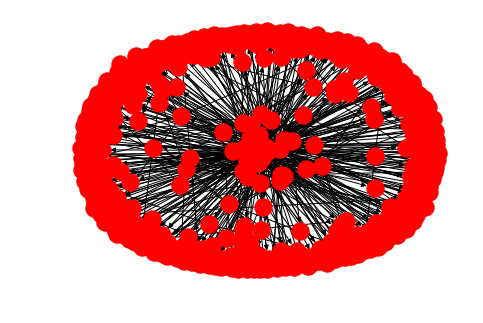

In [39]:
print(nx.degree(G, 'HealthRanger'))
print(nx.clustering(G, 'HealthRanger'))
print(nx.average_clustering(G))
T = nx.bfs_tree(G, 'HealthRanger')
nx.draw(T)

176
0.2087012987012987
0.7072180813385951


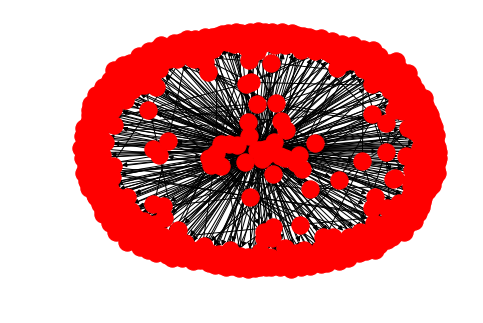

In [63]:
print(nx.degree(G, 'wanderinganimal'))
print(nx.clustering(G, 'wanderinganimal'))
print(nx.average_clustering(G))
T = nx.bfs_tree(G, 'wanderinganimal')
nx.draw(T)


In [58]:
#Degree Centrality
dic=nx.degree_centrality(G)
sorted_dict=sorted(dic.items(), key=lambda x: x[1], reverse=True)
print(sorted_dict)

[('wanderinganimal', 0.3137254901960784), ('Surfhempster', 0.26916221033868093), ('DanPeacock12', 0.26916221033868093), ('Matticus_Rox', 0.2638146167557932), ('_geoengineering', 0.2477718360071301), ('hidenhand1', 0.2424242424242424), ('Uniocracy', 0.2281639928698752), ('SteerMark', 0.2245989304812834), ('tbigggs', 0.22281639928698752), ('TruthBeTheLight', 0.22281639928698752), ('BayleeB79', 0.2067736185383244), ('sara8smiles', 0.1764705882352941), ('ARC4Freedom', 0.1746880570409982), ('suuuhdood', 0.1746880570409982), ('kooter4469', 0.1746880570409982), ('SERAPHIM003', 0.1711229946524064), ('jigglett', 0.1711229946524064), ('OpChemtrails', 0.1639928698752228), ('LionelMedia', 0.1622103386809269), ('nickmyer', 0.1586452762923351), ('rsqk9s', 0.1586452762923351), ('ZRanchLady', 0.1568627450980392), ('JamieBrownFE95', 0.1550802139037433), ('ErikGlasser', 0.1550802139037433), ('five4life', 0.1532976827094474), ('mypetZombie', 0.1497326203208556), ('HWW29_6Minutes', 0.1497326203208556), ('

In [61]:
#Eigenvector Centrality
eigenvector_dict=nx.eigenvector_centrality(G)
sorted_eigenvector_dict=sorted(eigenvector_dict.items(), key=lambda x: x[1], reverse=True)
print(sorted_eigenvector_dict)

[('wanderinganimal', 0.16483960360149202), ('Surfhempster', 0.1582387633856934), ('DanPeacock12', 0.15766689623431934), ('hidenhand1', 0.1467961261435383), ('Matticus_Rox', 0.1456667443908513), ('Uniocracy', 0.14102955681056714), ('TruthBeTheLight', 0.14031289768243804), ('SteerMark', 0.13696574781207052), ('_geoengineering', 0.13066184342420092), ('tbigggs', 0.12493668842834203), ('BayleeB79', 0.12040396276696026), ('sara8smiles', 0.11739627505739798), ('tman89123', 0.1172996055428175), ('jigglett', 0.11219745248962743), ('birdychirps', 0.10809088911675294), ('LionelMedia', 0.10806970195755128), ('OpChemtrails', 0.10701827549917405), ('SERAPHIM003', 0.1049557752407637), ('suuuhdood', 0.10416637194152008), ('mypetZombie', 0.1030168903221129), ('rsqk9s', 0.10155606332377663), ('Ryan_inNC', 0.10101149541193846), ('nickmyer', 0.09806116111722528), ('ZRanchLady', 0.09327315705682616), ('ARC4Freedom', 0.09323975911510607), ('OpChemArchives', 0.09307065696152278), ('ErikGlasser', 0.091956080

In [62]:
#Betweenness Centrality
betweenness_dict=nx.betweenness_centrality(G)
sorted_betweenness_dict=sorted(betweenness_dict.items(), key=lambda x: x[1], reverse=True)
print(sorted_betweenness_dict)

[('wanderinganimal', 0.07746922717701983), ('BayleeB79', 0.05140959690087308), ('DanPeacock12', 0.05114335287292951), ('Matticus_Rox', 0.050546449568423475), ('Enkidu_G', 0.04559243527083484), ('hidenhand1', 0.038802667170207784), ('Surfhempster', 0.03773543238492168), ('hazelglasgow', 0.03711484593837535), ('SteerMark', 0.034622429237336744), ('_geoengineering', 0.033523367464601835), ('tbigggs', 0.03311496779559325), ('suuuhdood', 0.03097070471146693), ('ImMikeRobertson', 0.03059719795740715), ('DSL1912', 0.029984254342246292), ('Uniocracy', 0.02887963537052714), ('JamieBrownFE95', 0.025709697338352617), ('PamJonesLiberty', 0.025195990905618148), ('kooter4469', 0.02308277868705824), ('TruthBeTheLight', 0.021293689492832852), ('ErikGlasser', 0.02046010222190486), ('five4life', 0.02037177806753488), ('OurLadyCovfefe', 0.018284686768187636), ('YahushuaIsGod', 0.014917432245856154), ('rawmic_', 0.014801128974681183), ('sara8smiles', 0.014759947641412346), ('HealthRanger', 0.0146160333813

In [26]:
#Do the clustering here
#first get all the hashtags by user
keywords=["chemtrail","chemtrails ","chemtrails","CHEMTRAILS","Chemtrail","Chemtrails","GeoEngineering","Geoengineering","geoengineering","IDoNotConsent","WeDoNotConsent","WEDONOTCONSENT","stopsprayingus","geoengineering","idonotconsent"]
user_list=[]
for i in range(len(ex_df_1)):
    if(ex_df_1.full_text.iloc[i].startswith('RT')& isinstance(ex_df_1.retweeted_status.iloc[i],dict)):
        tweeter_name=ex_df_1.retweeted_status.iloc[i].get('user').get('screen_name')
        if tweeter_name not in user_list:
                        #--getting rid of the duplicates can help have a better look
                        #at who are using the same hashtag, but not getting rid of the duplicates can help have a better
                        #look at whom is using the specific hashtag the most
            user_list.append(tweeter_name)
        else:
            tweeter_name=ex_df_1.user.iloc[i].get('screen_name')
            if tweeter_name not in user_list:
                user_list.append(tweeter_name)
    """if(len(ex_df_1.entities.iloc[i].get('hashtags'))>0):
        for j in ex_df_1.entities.iloc[i].get('hashtags'):
            #print(j.get('text'))
            if (j.get('text') not in hashtags) & (j.get('text') not in keywords):
                hashtags.append(j.get('text'))
print(hashtags)"""

hashtag_by_user_list=[]
for i in user_list:
    hashtag_list=[]
    for j in range(len(ex_df_1)):
        if(ex_df_1.full_text.iloc[j].startswith('RT')& isinstance(ex_df_1.retweeted_status.iloc[j],dict)):
            tweeter_name=ex_df_1.retweeted_status.iloc[j].get('user').get('screen_name')
            if tweeter_name==i:
                if(len(ex_df_1.entities.iloc[j].get('hashtags'))>0):
                     for m in ex_df_1.entities.iloc[j].get('hashtags'):
                            if (m.get('text') not in hashtag_list) & (m.get('text') not in keywords):
                                hashtag_list.append(m.get('text'))
                            #--getting rid of the duplicates can help have a better look
                        #at who are using the same hashtag, but not getting rid of the duplicates can help have a better
                        #look at whom is using the specific hashtag the most
        else:
            tweeter_name=ex_df_1.user.iloc[j].get('screen_name')
            if tweeter_name==i:
                if(len(ex_df_1.entities.iloc[j].get('hashtags'))>0):
                     for m in ex_df_1.entities.iloc[j].get('hashtags'):
                        if (m.get('text') not in hashtag_list) & (m.get('text') not in keywords):
                            hashtag_list.append(m.get('text'))
    hashtag_by_user_list.append(hashtag_list)

hashtags_by_users_df=pd.DataFrame(list(zip(user_list,hashtag_by_user_list)), 
                 columns =['user', 'hashtags_used_by user']) 
print(hashtags_by_users_df)

                 user  \
0     tbigggs           
1     mohamed_solomon   
2     fakecloudwatch    
3     SteerMark         
4     Uniocracy         
...         ...         
3406  mrknotty23        
3407  Hotelaxemurder    
3408  GoTrumpFL         
3409  Delmarva123       
3410  elakwentshiphop   

                                                                                                                                                                                                                                                                                                                                                                                                                  hashtags_used_by user  
0     [OpChemtrails, ChemicalAttack, TheTruthCommunity, BrainwashedInfants, whiteSkies, orderFollowing, research, Opchemtrails, WakeUp, opchemtrails, Geostorm, OpChemPBA, ChemtrailLung, EarthDay, NaturalLaw, MLB, PS4, 1A, GeoEngi, VeteransDay, ChristmasEve, GeoEngineered, 

In [29]:
#get the part of dataframe/or users who use hashtags
users_who_use_hashtags_df=hashtags_by_users_df[hashtags_by_users_df['hashtags_used_by user'].astype(bool)]
print(users_who_use_hashtags_df)

                 user  \
0     tbigggs           
3     SteerMark         
4     Uniocracy         
8     libertyIAB        
9     chairdogmtn       
...           ...       
3378  bzbx              
3401  DiannasEye        
3402  sweetbabydollnc   
3404  jesikabrown123    
3410  elakwentshiphop   

                                                                                                                                                                                                                                                                                                                                                                                                                  hashtags_used_by user  
0     [OpChemtrails, ChemicalAttack, TheTruthCommunity, BrainwashedInfants, whiteSkies, orderFollowing, research, Opchemtrails, WakeUp, opchemtrails, Geostorm, OpChemPBA, ChemtrailLung, EarthDay, NaturalLaw, MLB, PS4, 1A, GeoEngi, VeteransDay, ChristmasEve, GeoEngineered, 

Newman Girvan algorithm
CONCOR
network motifs

#virustotal API
#list the URLs users <-> URLs
#topic model
#enumerate the top level domains (use the TLDExtract python library)

# To illuminate and motivate: A Fuzzy-Trace Model of the Spread of Information Online

In [113]:
# use url expander api to expand the url first 


"""from urlunshort import resolve
from urlunshort import is_shortened



for url in url_mentioned:
    if is_shortened(url):#
        url=resolve(url)
        if url not in expanded_url_list:
            expanded_url_list.append(url)
    else:
        if url not in expanded_url_list:
            expanded_url_list.append(url)
            
print(expanded_url_list)
    """

"""import requests
url_mentioned=url_mention_df.URL_Mentioned.tolist()
expanded_url_list=[]
already_expanded_url=[]
for url in url_mentioned:
    session = requests.Session()
    try:
        r = session.head(url, allow_redirects=True,  timeout=10)
        print(r.url)
        if r.url not in expanded_url_list:
            expanded_url_list.append(r.url)
            already_expanded_url.append(url)
    except requests.Timeout:
        session = requests.Session()
    except requests.exceptions.ConnectionError:
        print("Connection refused")
        already_expanded_url.append(url)
    
print(expanded_url_list)
"""

https://www.naturalnews.com/2018-05-03-geoengineering-destroy-us-climate-change-scientists-dim-the-sun.html
https://www.youtube.com/watch?v=1SNucZqKHsM&feature=youtu.be
http://talknetwork.com/2016-08-09-pilots-doctors-and-scientists-speak-out-about-chemtrails.html
http://ww7.unseen-pedia.com
https://www.naturalnews.com/2018-02-16-former-military-meteorologist-admits-military-aircraft-spray-aluminum-into-the-atmosphere.html
https://www.youtube.com/watch?v=1SNucZqKHsM&feature=youtu.be&a
https://www.naturalnews.com/2018-04-25-doctor-warns-world-about-chemtrail-lung-a-new-health-epidemic.html
https://www.youtube.com/watch?v=j7TOPdn_d6o&feature=youtu.be
http://www.seattleorganicrestaurants.com/vegan-whole-food/chemtrails-global-warming-Monsanto-toxin-resistant-crops.php
https://www.instagram.com/p/BhugIQLHOzv/
https://www.youtube.com/watch?v=nAz25-zJ6xk&feature=youtu.be
https://www.yahoo.com/news/nine-10-people-breathing-polluted-air-220248624.html?soc_src=hl-viewer&soc_trk=tw
https://www.y

https://twitter.com/account/suspended
https://www.youtube.com/watch?v=1OlDfIqJQ-8&feature=youtu.be
https://twitter.com/Later_Newspaper/status/991991908078641152
http://www.chemtrailcentral.com/
http://www.topbuzz.com/article/i6548608662582067722?user_id=6508866174742216714&language=en&region=us&app_id=1106&impr_id=6551677964440848649&gid=6548608667556512009&c=tw
https://www.youtube.com/watch?v=1SNucZqKHsM
https://www.youtube.com/watch?v=IqATQtwOY34&feature=youtu.be&a
https://thedailyconspiracy.com/2017/11/21/the-shocking-truth-about-toxic-chemtrails/
https://accounts.google.com/ServiceLogin?passive=1209600&osid=1&continue=https://plus.google.com/104525759892285018760/posts/BnVv3sUsB7F?_utm_source%3D1-2-4&followup=https://plus.google.com/104525759892285018760/posts/BnVv3sUsB7F?_utm_source%3D1-2-4
https://www.youtube.com/watch?v=X3lW-TGGlk0&feature=youtu.be
https://www.naturalnews.com/2018-02-07-geoengineering-was-labeled-a-conspiracy-theory-now-its-routinely-cited-in-science-papers-clim

https://paper.li/EvieFransisco/1406204941?edition_id=8bcbdf10-4a16-11e8-9684-0cc47a0d164b
https://paper.li/EvieFransisco/1406204941?edition_id=c6fe2260-4628-11e8-9684-0cc47a0d164b
https://www.aircrap.org/2018/04/20/88-doctor-dies-unexpectedly-holistic-prominent-and-outspoken/
https://www.youtube.com/watch?v=wjlREwa5oq8&feature=youtu.be&a
https://www.youtube.com/watch?v=1SNucZqKHsM&feature=share
https://newspunch.com/nasa-admit-to-spraying-americans-with-poisonous-chemtrails/
https://www.youtube.com/watch?v=pNrMhGPA-Zw&feature=youtu.be
https://www.youtube.com/watch?v=pNrMhGPA-Zw&feature=youtu.be&a
https://twitter.com/Uniocracy/status/991932872465534976
https://www.youtube.com/watch?v=XlLOBGz-2TU&feature=youtu.be
https://paper.li/Worldmuslimnews/1305914763?edition_id=af6d2ab0-4ee3-11e8-8cc9-0cc47a0d164b
https://www.theguardian.com/environment/2018/feb/07/epa-head-scott-pruitt-says-global-warming-may-help-humans-flourish?CMP=share_btn_tw
https://twitter.com/ScotNational/status/98775207251

https://www.prowrestlingtees.com/binhamin
https://www.youtube.com/watch?v=e20vaAtncsM&feature=youtu.be
https://twitter.com/DSurach/status/987494262781685760
https://newstarget.com/2016-11-04-chemtrails-study-found-aluminum-barium-and-titanium-metals-in-human-brains.html
https://www.youtube.com/watch?v=S7bXtXTiebw&feature=youtu.be&a
Connection refused
https://www.aircrap.org/2018/04/20/tribute-to-rosalind-peterson/
https://twitter.com/allisonmack/status/969595347734589441
https://www.vice.com/en_us/article/a3kq5z/extinction-of-starlight
https://135602.usana.com/pwp/#/site/1013899
https://twitter.com/nubiankemett/status/984196318762500096
http://www.occuworld.org/news/4132348
https://www.youtube.com/watch?v=3Z2iRormxkw&feature=youtu.be
https://www.nbcsandiego.com/news/national-international/lettuce-e-coli-romaine-sick/2064263/
https://consciousconspiracy.siterubix.com/this-video-will-change-how-you-think-forever-new-ufos
https://www.youtube.com/watch?v=L5is16A8pfw&feature=youtu.be
https:

https://twitter.com/dpmlawfirm/status/992128455562158081
https://www.youtube.com/watch?v=dpmn6iPxqUI&feature=youtu.be&a
https://www.express.co.uk/news/weird/954966/Chemtrails-HAARP-conspiracy-weather-control-geoengineering
https://twitter.com/JanetMackinnon7/status/992231356959674368
https://fxmb.info/QRjbbb
https://twitter.com/eliorajke/status/987856878624391168
https://www.thesiriusreport.com/technology/list-us-patents-related-weather-modification/
http://www.occuworld.org/news/4135715
https://www.instagram.com/p/Bh2szFGHCjG/
https://illusion.news
https://twitter.com/BillPeriman/status/987504492320120832
https://www.youtube.com/watch?v=PZveTd_xnOA&feature=youtu.be
https://twitter.com/minedflayer/status/867436204186365953
https://weathermodificationhistory.com/
https://www.flickr.com/photos/pandoracrimestp/40969352795/
https://twitter.com/account/suspended
https://www.youtube.com/watch?v=QSXAebhv2_I&feature=youtu.be
https://theoutline.com/post/1568/chemtrail-truthers-are-still-waiting

https://defendressofsanity81.wordpress.com/2018/04/22/watch-chemtrails-killing-trees-bees-queen-elizabeth-park-vancouver-bc-sprayoclocknews-classic-on-youtube/
https://www.youtube.com/watch?v=HJjW7TGP2m0&feature=youtu.be
https://www.youtube.com/watch?v=jGFMbRefEys&feature=youtu.be
https://www.law.cornell.edu/uscode/text/50/1520a
https://twitter.com/kristenmeghan/status/975861680814088193
Connection refused
https://www.youtube.com/watch?v=YD9UT_fN2iA&feature=youtu.be&a
https://twitter.com/DebMatheny/status/980506164692733955?s=20
https://www.youtube.com/watch?v=dpmn6iPxqUI&feature=youtu.be
https://twitter.com/NASAEarth/status/988054831213568002
https://www.youtube.com/watch?v=OPn6OipVx0g&feature=youtu.be
https://defendressofsanity81.wordpress.com/2018/04/22/watch-consciousness-beyond-chemtrails-sofia-smallstorm-chemtrails-to-pseudo-life-part-2-on-youtube/
https://www.youtube.com/watch?v=6lbj6rv9qNE&feature=youtu.be
https://defendressofsanity81.wordpress.com/2018/04/22/watch-veritas-radi

https://twitter.com/AverageJoe230/status/987493067841138690
https://www.newscientist.com/article/2101611-chemtrails-conspiracy-theory-gets-put-to-the-ultimate-test/#.Wtqk7Q5KNCg.twitter
https://www.newscientist.com/article/2101611-chemtrails-conspiracy-theory-gets-put-to-the-ultimate-test/#.Wtqk7fDvCnc.twitter
https://twitter.com/bchapman151/status/987519882613919745
https://www.newswars.com/bill-gates-backs-a-1-billion-plan-to-cover-earth-in-big-brother-satellites-capable-of-streaming-live-and-unfiltered-hd-footage-of-the-planet
Connection refused
Connection refused
https://www.youtube.com/watch?v=0rDHZ4TCar8
https://gab.com/jerrynailedit/posts/24214538
https://www.youtube.com/watch?v=Dk9uitzdGXQ
https://gab.com/jerrynailedit/posts/24214389
https://www.wunderground.com/maps/satellite/regional-infrared
https://www.congress.gov/bill/107th-congress/house-bill/2977/text
https://twitter.com/DonaldJTrumpJr/status/987478331489685504
https://www.facebook.com/saveworldarmy/videos/1749972831749

https://twitter.com/CAchemtrails/status/987709082034356224
https://twitter.com/CAchemtrails/status/987708969811460096
https://www.google.com/url?sa=t&source=web&rct=j&url=http://www.dtic.mil/dtic/tr/fulltext/u2/676561.pdf&ved=2ahUKEwjh8Mya1cvaAhWRAXwKHUuXBKsQFjADegQIAhAB&usg=AOvVaw0vwkPp9K-HKECyIGWh47td
https://twitter.com/kanyewest/status/987696355341553665
https://twitter.com/SebGorka/status/987525372152631296
https://twitter.com/tomedisonprez/status/977714849974136832
http://www.thesleuthjournal.com/15-arguments-will-destroy-chemtrails-deniers/
https://www.youtube.com/watch?v=R0qWT10mSUk&feature=youtu.be
https://www.facebook.com/GlobalMarchAgainstChemtrailsAndGeoengineering/posts/932152893659829
https://www.facebook.com/GlobalMarchAgainstChemtrailsAndGeoengineering/posts/932153613659757
https://www.geoengineeringwatch.org/chemtrails_planned_in_1958_-_nasa_document/
https://humansarefree.com/2014/06/chemtrail-cough-is-sweeping-the-nation-death-by-respiratory-disease-has-skyrocketed.h

https://www.veteranstoday.com/2016/06/20/the-strange-times-we-live-in-geoengineering-and-morgellons-disease/
https://www.bbc.com/news/science-environment-32334528
https://sacramento.cbslocal.com/2015/09/24/california-lake-mysterious-runs-dry-overnight-killing-thousands-of-fish/
https://slate.com/technology/2016/01/the-planet-remade-and-the-two-questions-to-ask-yourself-about-climate-change.html
https://www.washingtonpost.com/news/the-intersect/wp/2015/10/30/a-guide-to-why-some-activists-believe-their-tweets-are-being-censored-in-the-u-s/
https://mashable.com/2016/09/11/solar-geoengineering-is-necessary/
https://dotearth.blogs.nytimes.com/2016/10/18/can-humans-go-from-unintended-global-warming-to-climate-by-design/?smid=tw-share
https://www.bloomberg.com/tosv2.html?vid=&uuid=b36098f0-2efc-11ea-8e1c-5dea93132b24&url=L25ld3MvYXJ0aWNsZXMvMjAxNi0xMC0zMS9nZW9lbmdpbmVlcmluZy10by1hbHRlci1jbGltYXRlLWNoYW5nZS1tb3Zlcy1jbG9zZXItdG8tcmVhbGl0eQ==
https://www.theguardian.com/environment/2017/mar/24/u

https://www.youtube.com/watch?v=Ri8bBNG8ai0&feature=youtu.be
https://www.youtube.com/watch?v=J-vd_nOCnsA&feature=youtu.be
https://twitter.com/TravelWireAsia/status/991829696655581185
http://www.makeavoice.com/tunein/?id=7000
https://www.google.com/url?rct=j&sa=t&url=https://www.express.co.uk/news/weird/954966/Chemtrails-HAARP-conspiracy-weather-control-geoengineering&ct=ga&cd=CAIyGjlmYmMyMTJlMzEzNDQyYmQ6Y29tOmVuOlVT&usg=AFQjCNEytUSMgFN6419FGj13HRzR79hTOA
https://www.express.co.uk/news/weird/954966/Chemtrails-HAARP-conspiracy-weather-control-geoengineering?utm_source=dlvr.it&utm_medium=twitter
https://twitter.com/americanindian8/status/992124131821871105
https://www.pscp.tv/w/bURUrDFYSmpra05CT3JEakx8MWVhS2JwYmJXUlJKWLJZ5m0n6h0537EUXkonGzVhnyQ97XDtqkzNlAOoAupU
https://www.pscp.tv/w/bUta0TFYSmpra05CT3JEakx8MXpxS1ZybVJRYVlLQiATflLC4XvpiWjZi8w1WbHcNMGB6UqlHTKDphL3UZy1
https://twitter.com/azskywatcher/status/992149931065421824
https://www.youtube.com/watch?v=1F689Lii1ko&feature=youtu.be
http

https://twitter.com/account/suspended
https://www.youtube.com/watch?v=f33lKPzQbxI&feature=youtu.be
http://www.topbuzz.com/article/i6550099775872565769?user_id=6488811766586278921&language=en&region=us&app_id=1106&impr_id=6551437590317238538&gid=6550099794507858186&c=tw
https://www.youtube.com/watch?v=O83JDyeqAJ8&feature=youtu.be
https://www.facebook.com/scottishparliament/videos/1622799067818513/
https://twitter.com/Just4TheCause/status/991966683765133312
http://www.seattleorganicrestaurants.com/vegan-whole-food/chemtrails-global-warming-Monsanto-toxin-resistant-crops.php
https://twitter.com/LBF777/status/991922913807880192
https://www.nature.com/articles/s41599-017-0014-3
https://www.theguardian.com/environment/2012/feb/06/bill-gates-climate-scientists-geoengineering
https://www.youtube.com/watch?v=JASLYWM1Nk0&feature=youtu.be
http://www.scottishchemtrails.com/2018/05/17-april-2018-glasgow.html?spref=tw
http://www.scottishchemtrails.com/2018/05/18-april-2018-edinburgh.html?spref=tw
ht

TooManyRedirects: Exceeded 30 redirects.

In [13]:
url_mentioned=url_mention_df.URL_Mentioned.tolist()
url_starter_list=url_mention_df.starter.tolist()
expanded_url_list=[]
already_expanded_url=[]
url_starter_unique_list=[]
headers = {
    'Accept-Encoding': 'gzip, deflate, sdch',
    'Accept-Language': 'en-US,en;q=0.8',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
    'Cache-Control': 'max-age=0',
    'Connection': 'keep-alive',
}

for i in range(len(url_mentioned)):
    if url_mentioned[i] not in already_expanded_url:
        session = requests.Session()
        url=url_mentioned[i]
        try:
            r = session.head(url, allow_redirects=True, timeout=10, headers=headers)
            print(r.url)
            if r.url not in expanded_url_list:
                expanded_url_list.append(r.url)
                already_expanded_url.append(url)
                url_starter_unique_list.append(url_starter_list[i])
        except requests.Timeout:
            session = requests.Session()
        except requests.exceptions.ConnectionError:
            print("Connection refused")
            already_expanded_url.append(url)
        except:
            print("some kind of exceptions happened")
            already_expanded_url.append(url)
print(expanded_url_list)


https://www.naturalnews.com/2018-05-03-geoengineering-destroy-us-climate-change-scientists-dim-the-sun.html
https://www.youtube.com/watch?v=1SNucZqKHsM&feature=youtu.be
http://talknetwork.com/2016-08-09-pilots-doctors-and-scientists-speak-out-about-chemtrails.html
http://ww12.unseen-pedia.com
https://www.naturalnews.com/2018-02-16-former-military-meteorologist-admits-military-aircraft-spray-aluminum-into-the-atmosphere.html
https://www.youtube.com/watch?v=1SNucZqKHsM&feature=youtu.be&a
https://www.naturalnews.com/2018-04-25-doctor-warns-world-about-chemtrail-lung-a-new-health-epidemic.html
https://www.youtube.com/watch?v=j7TOPdn_d6o&feature=youtu.be
https://www.seattleorganicrestaurants.com/vegan-whole-food/chemtrails-global-warming-Monsanto-toxin-resistant-crops.php
https://www.instagram.com/p/BhugIQLHOzv/
https://www.youtube.com/watch?v=nAz25-zJ6xk&feature=youtu.be
https://www.yahoo.com/news/nine-10-people-breathing-polluted-air-220248624.html?soc_src=hl-viewer&soc_trk=tw
https://www

https://twitter.com/account/suspended
https://www.youtube.com/watch?v=1OlDfIqJQ-8&feature=youtu.be
https://twitter.com/Later_Newspaper/status/991991908078641152
http://www.chemtrailcentral.com/
http://www.topbuzz.com/a/6548608662582067722?user_id=6508866174742216714&language=en&region=us&app_id=1106&impr_id=6551677964440848649&gid=6548608667556512009&c=tw
https://www.youtube.com/watch?v=1SNucZqKHsM
https://www.youtube.com/watch?v=IqATQtwOY34&feature=youtu.be&a
https://thedailyconspiracy.com/2017/11/21/the-shocking-truth-about-toxic-chemtrails/
https://accounts.google.com/ServiceLogin?passive=1209600&osid=1&continue=https://plus.google.com/104525759892285018760/posts/BnVv3sUsB7F?_utm_source%3D1-2-4&followup=https://plus.google.com/104525759892285018760/posts/BnVv3sUsB7F?_utm_source%3D1-2-4
https://www.youtube.com/watch?v=X3lW-TGGlk0&feature=youtu.be
https://www.naturalnews.com/2018-02-07-geoengineering-was-labeled-a-conspiracy-theory-now-its-routinely-cited-in-science-papers-climate-cha

https://www.youtube.com/watch?v=rhK_vf-ULu0&feature=youtu.be
https://www.geoengineeringwatch.org/
https://www.youtube.com/watch?v=zOH8SoZyrBU&feature=youtu.be
Connection refused
https://twitter.com/derekahunter/status/987758323784134656
https://twitter.com/WeatheredHype/status/987465830488256512
https://www.youtube.com/watch?v=J-vd_nOCnsA&app=desktop
https://twitter.com/LarrySchweikart/status/987684750474100736
https://www.youtube.com/watch?v=IeqdFJphGT0&feature=youtu.be
https://www.youtube.com/watch?v=j7TOPdn_d6o&feature=share
http://www.occuworld.org/news/4133007
http://southdakotaprogressive.blogspot.com/2018/04/another-round-of-geoengineering.html
https://www.independent.co.uk/news/uk/politics/windrush-scandal-tories-vote-block-release-secret-documents-a8333501.html?utm_campaign=Echobox&utm_medium=Social&utm_source=Facebook#link_time=1525285678
https://paper.li/EvieFransisco/1406204941?edition_id=8bcbdf10-4a16-11e8-9684-0cc47a0d164b
https://paper.li/EvieFransisco/1406204941?edition

http://www.occuworld.org/news/4132325
https://paper.li/Chemtrail_Watch/1324362937?edition_id=9546d420-44b0-11e8-8d16-0cc47a0d1605
https://www.naturalblaze.com/2018/05/herpes-solution-vitamin-d.html
https://accounts.google.com/ServiceLogin?passive=1209600&osid=1&continue=https://plus.google.com/104525759892285018760/posts/GCsAmtFNPYt?_utm_source%3D1-2-4&followup=https://plus.google.com/104525759892285018760/posts/GCsAmtFNPYt?_utm_source%3D1-2-4
https://paper.li/Chemtrail_Watch/1324362937?edition_id=d2ba3390-f2ff-11e7-abf4-0cc47a0d1605
https://www.youtube.com/watch?v=YNfG5AYJxE0&feature=youtu.be
https://www.youtube.com/watch?v=zNeOTOytEeA&feature=youtu.be
https://twitter.com/MattsIdeaShop/status/991802000542068736
https://www.youtube.com/watch?v=WWDO3bgoY1Q&feature=youtu.be&a
https://twitter.com/OpChemtrails/status/991694653379502080
https://www.youtube.com/watch?v=4WBY9uhVv6w&feature=youtu.be
https://www.youtube.com/watch?v=e20vaAtncsM&feature=youtu.be
https://twitter.com/DSurach/status

https://tinyurl.com/y9nx9z
https://gab.com/jerrynailedit/posts/24274654
https://www.youtube.com/watch?v=hvh1n4XvETM
https://www.pscp.tv/w/bavqYjYzNzQ0MDF8MWpNSmdxRXJYUXFLTCOma2vxR4lisY5S7Np60DEKtTgbUPDD37fpSXd1XPl8?t=2m24s
https://twitter.com/Simply1Earth/status/992280716988768256
https://www.youtube.com/watch?v=pIVhaP7iVSU&feature=youtu.be&a
https://twitter.com/TheOneVoice/status/987858730082488320
https://www.youtube.com/watch?v=O7lbzIxqXEk&feature=youtu.be&a
https://twitter.com/SowellDaily/status/987872496128069634
https://contrailscience.com/
https://www.instagram.com/p/Bh21CJBjLDJ/
https://twitter.com/naomirwolf/status/987801016652443648
https://twitter.com/trutherbothazel/status/987745098065727488
https://www.youtube.com/watch?v=QVZVoDCf9KY&feature=youtu.be&a
https://twitter.com/GreenpeaceNZ/status/992323770885988352
http://lungs.it/
https://finance.yahoo.com/video/amazon-alexas-strange-response-chemtrails-205040602.html?soc_src=social-sh&soc_trk=fb
https://twitter.com/dpmlawfirm

https://defendressofsanity81.wordpress.com/2018/04/22/watch-chemtrails-are-killing-the-plants-and-trees-on-youtube/
https://www.youtube.com/watch?v=k6wUT3TDYP4&feature=youtu.be
https://www.youtube.com/watch?v=09Wb_4ZShW0&feature=youtu.be&a
https://defendressofsanity81.wordpress.com/2018/04/22/watch-chemtrails-tree-die-off-geo-engineering-2017-on-youtube/
https://www.youtube.com/watch?v=irMQFfeTBwI&feature=youtu.be
https://www.youtube.com/watch?v=6-D_ZMkI7NM&feature=youtu.be
https://defendressofsanity81.wordpress.com/2018/04/22/watch-from-chemtrails-to-pseudo-life-the-dark-agenda-of-synthetic-biology-full-length-video-wmv-on-youtube-2/
https://twitter.com/NOVAMonHun/status/987941783865888768
https://defendressofsanity81.wordpress.com/2018/04/22/watch-dead-and-dying-trees-and-plants-from-chemtrails-on-youtube-2/
https://www.youtube.com/watch?v=UQcnvThmI9M&feature=youtu.be
https://www.youtube.com/watch?v=87X1Hg9mlII&feature=youtu.be
https://defendressofsanity81.wordpress.com/2018/04/22/wa

https://twitter.com/LilWingedPiXi/status/987455647833784320
https://www.youtube.com/watch?v=9BDWmPNB69g&feature=youtu.be
https://www.youtube.com/watch?v=ABtIpdlgU8c&feature=youtu.be
Connection refused
https://twitter.com/cathmckenna/status/987348976973201408
https://www.youtube.com/watch?v=rdTXEb29p8E&feature=share
https://twitter.com/account/suspended
https://www.youtube.com/watch?v=BKtDRZl5b5U&feature=youtu.be
https://twitter.com/JohnTitusRenzi2/status/987488955246366721
https://twitter.com/thelastrefuge2/status/987458976949329920?s=21
https://twitter.com/whiskers1960/status/987380598762242049
https://www.youtube.com/watch?v=SXZA1R01GCk
https://twitter.com/BeMoreBeNow/status/987502959125843968
https://gab.com/jerrynailedit/posts/24214804
https://www.youtube.com/watch?v=Tq8R3Yl5oMw
https://www.youtube.com/watch?v=TITmj71_VMc&feature=youtu.be
https://www.newstarget.com/2016-07-20-top-10-natural-supplements-and-herbs-that-can-fight-the-toxicities-emitted-by-chemtrails.html
https://gab.c

https://www.youtube.com/watch?v=v6T41VYz93U&feature=youtu.be&a
https://www.youtube.com/watch?v=oEqIMtUOMbU&feature=youtu.be&a
https://www.youtube.com/watch?v=N9MyKSikN24&feature=youtu.be
https://www.youtube.com/watch?v=VC5mCRH5ZLo&feature=youtu.be&a
https://www.youtube.com/watch?v=0_dfXzQT_0E&feature=youtu.be&a
https://www.businessinsider.com/military-government-secret-experiments-biological-chemical-weapons-2016-9
https://www.youtube.com/watch?v=gR6KVYJ73AU&feature=youtu.be
https://www.youtube.com/watch?v=FLaJ5uIXTQU&feature=youtu.be&a
https://www.facebook.com/groups/globalskywatch/permalink/10156466628015302/
https://twitter.com/naomirwolf/status/970386456140279808
http://www.occuworld.org/news/4108988
http://theconversation.com/what-earth-day-means-when-humans-possess-planet-shaping-powers-92808?utm_campaign=Echobox&utm_medium=Social&utm_source=Twitter#link_time=1524254934
https://www.metabunk.org/threads/photoshopped-chemtrail-images-on-geoengineeringwatch-org.6658/
https://paper.l

https://dotearth.blogs.nytimes.com/2015/02/10/in-geoengineering-study-science-academy-sees-merit-in-co2-removal-risk-in-reflecting-sunlight/?smid=tw-share
https://www.bbc.com/news/science-environment-30543252
Connection refused
https://twitter.com/simonhedlin/status/991784151199178754
https://www.bbc.co.uk/news/science-environment-30197085
https://www.theguardian.com/environment/2014/nov/06/geoengineering-could-prevent-climate-effects-caused-by-giant-volcanic-eruptions?CMP=share_btn_tw
http://www.dutchsinse.com/want-to-know-about-weather-modification-haarp-vlf-hf-and-chemtrails-want-to-prove-it-to-a-non-believer-here-you-go/
https://www.rt.com/opc4l9/
https://www.dailymail.co.uk/news/article-2594730/Health-warning-smog-soars-dangerous-high-country-People-heart-lung-problems-told-avoid-exercise.html
https://www.theguardian.com/environment/2014/jan/08/geoengineering-drought-tropics-climate-change-volcano?CMP=twt_gu
https://twitter.com/marzhanel/status/992137748059336705
https://www.reddi

https://twitter.com/austradelatam/status/992134487487197184
https://www.youtube.com/watch?v=ghJ-CztD86o&feature=youtu.be&a
https://twitter.com/naomirwolf/status/992138062523072512
https://twitter.com/genevagirl81/status/990882032921337856
https://twitter.com/account/suspended
https://www.myallies.com/news/chemtrail-bombshell-shock-claim-declassified-files-reveal-haarp-weather-control-scheme-chemtrail-bombshell-shock-claim-declassified-files-reveal-haarp-weather-control-scheme-a-trio-of-chemtrail-conspiracy-theorists-have-threatened-to-blow-the-lid-on-what-they-b-858
https://vimeo.com/138779240
https://fxmb.info/QRghLW
https://www.huffpost.com/entry/geoengineering-climate-change_n_5ae07919e4b061c0bfa3e794?ncid=engmodushpmg00000004
https://www.theguardian.com/world/2018/apr/23/sprinkling-sand-save-arctic-shrinking-sea-ice
https://www.yahoo.com/news/macron-predicts-u-s-will-return-paris-agreement-climate-change-163422711.html?.tsrc=fauxdal
https://www.express.co.uk/news/uk/950748/climate-

https://twitter.com/Marcelo77931223/status/991699324252966912
https://www.youtube.com/watch?v=cgeFRC9yGU8&feature=share
https://twitter.com/JamieBrownFE95/status/991651169117360128
https://www.snp.org/campaigns/powergrab/
https://twitter.com/euronews/status/991949378763010048
http://www.dataasylum.com/mindcontrol-chemtrails-summary.html#vid
https://twitter.com/account/suspended
https://www.facebook.com/bradtaylorScouser/videos/1252154481582753/
https://www.youtube.com/watch?v=W6f64F5xAeI&feature=youtu.be
https://www.youtube.com/watch?v=HbJL1ItkNdA
https://www.youtube.com/watch?v=DDOHUC9F6zE
https://www.youtube.com/watch?v=qVKg9DPy42Y&feature=youtu.be
https://twitter.com/BrutuslWallie/status/991872095830224896
https://www.youtube.com/watch?v=tdxrVOyo5EA&feature=youtu.be&a
https://www.youtube.com/watch?v=PwRzIgsB1-8&feature=share
https://www.youtube.com/watch?v=zrhLlWEyrws&feature=youtu.be
http://www.naturalhealthresearch.org/chemtrails-geoengineering-global-warming/
https://www.thepetit

https://www.youtube.com/watch?v=MuuCIbVd6t4&feature=youtu.be
https://www.youtube.com/watch?v=F2YYygHKJH8&feature=youtu.be
https://www.express.co.uk/news/weird/954966/Chemtrails-HAARP-conspiracy-weather-control-geoengineering
https://www.youtube.com/watch?v=6V-LIp2f_90&feature=youtu.be
https://www.youtube.com/watch?v=_gWS0hJK_FI&feature=youtu.be
http://www.occuworld.org/news/4131543
https://twitter.com/StopEndWarsNOW/status/991697496173821952
https://www.geoengineeringwatch.org/chemtrails-nanoaluminum-neurodegenerative-neurodevelopmental-effects-by-russell-blaylock-md-2/
https://twitter.com/fm_3883/status/991695462636949504
https://humansarefree.com/2018/05/doctor-warns-about-a-new-health-epidemic-the-chemtrail-lung.html
http://losangelesskywatch.org/doctor-confirms-worldwide-chem-lung-disease-daily-chemtrail-spraying-is-relentless-now
https://www.youtube.com/watch?time_continue=106&v=9W-n6_Xedx4
https://creationtemple.com/retreat/
https://www.instagram.com/p/BiVthD9AAEh/?utm_source=twi

https://www.globalresearch.ca/?p=20369
https://www.youtube.com/watch?v=BeJSGd78LuY&feature=youtu.be&a
https://www.youtube.com/watch?v=g_b754SzLcU&feature=youtu.be
https://www.globalresearch.ca/?p=19047
https://www.youtube.com/watch?v=f2dc6BnRDqc&feature=youtu.be
http://www.earth-heal.com/videos/viewvideo/9564/doctor-confirms-worldwide-chem-lung-disease-daily-chemtrail-spraying-is-relentless-now.html?utm_source=feedburner&utm_medium=twitter&utm_campaign=Feed%3A+EarthHealVideos+%28Earth+Heal+Videos%29
https://www.youtube.com/watch?v=TlBzExNsD38&feature=youtu.be
https://wikileaks.org/plusd/cables/1978STATE190700_d.html
https://www.youtube.com/watch?v=KJKYkasgi5U&feature=share
http://presscore.ca/2014/1975-u-s-navy-patent-proves-the-existence-of-the-chemtrail-program.html
https://twitter.com/HuffPost/status/991795523312148481
https://twitter.com/account/suspended
https://twitter.com/cchqpress/status/992165093927505920
https://www.google.com/search?q=Poison+jet+chemtrails&client=firefox-b-1

https://www.newsweek.com/mercedes-unveils-self-driving-pollution-free-car-ces-2015-297160
https://www.washingtonpost.com/news/energy-environment/wp/2015/01/22/how-a-group-of-conspiracy-theorists-could-derail-the-debate-over-climate-policy/?postshare=9981422116109780
http://www.cnbc.com/2015/08/16/bird-flu-to-human-transmission-a-concern-not-yet-high-risk-cdc.html
https://www.sfgate.com/bayarea/article/Low-flying-helicopter-researching-Bay-Area-6481532.php
https://www.businessinsider.com/china-sets-aside-millions-to-control-the-rain-2016-7?r=UK
https://www.nytimes.com/interactive/2018/04/26/climate/oman-rocks.html
https://www.ascemediasales.org/media-properties/geostrata-magazine
https://www.youtube.com/watch?v=2JXrDwtiqQs
https://www.pscp.tv/w/aJYuYzgxMDMwMXw1NjcxMTg2OUJrETXQC49fKr5CcRpra3od5IMiduUuE6ReGm0KwYDt
https://www.pscp.tv/w/agTOfTk5MDY3NTh8MW5BS0VubXdwcFhHTJ0LZh51ZjHgh0QXWE9AbBCWimzhBYruE-8pvhLzR4cF
https://www.pscp.tv/w/agvNYzEzMTk2MjV8MW1yR21sRGJ5UHpLeVeODTQRHJbHkL-Fcay8bPrh

In [55]:
print(len(expanded_url_list))
print(len(url_starter_unique_list))

1376
1376


In [83]:
#use the virustotal api to scan the urls to check if there are viruses related
#api key: 8d7185168f9d1b8241fdee1c5729a248562503d49783ea10cfce995acf58186a
#url = 'https://www.virustotal.com/vtapi/v2/domain/report'
#response = requests.get(url, params=params)
#print(expanded_url_list)
from time import sleep
already_scanned_urls = []
existing_urls=[]
url=expanded_url_list[0]
print(url)
api_key='8d7185168f9d1b8241fdee1c5729a248562503d49783ea10cfce995acf58186a'
"""for url_scan in expanded_url_list:
    counter += 1
    print(counter)
    if ( (url_scan not in existing_urls) and (url_scan not in already_scanned_urls) ):
        print(url_scan)
        request_file = open('VirusTotal Labels/1pct_requests_expanded.txt','a+')
        input_url = 'https://www.virustotal.com/vtapi/v2/url/scan'
        params = {'apikey': api_key, 'url':url_scan}
        response = requests.post(input_url, data=params)
        print(response.json())
        request_file.write(str(response.json())+'\n')
        print('Request written to file')
        request_file.close()
        if response.json()['response_code']==1:
            scan_id = response.json()['scan_id']

            sleep(15)
            results_file = open('VirusTotal Labels/1pct_results_expanded.txt','a+')
            input_url = 'https://www.virustotal.com/vtapi/v2/url/report'
            try:
                params = {'apikey': api_key, 'resource':scan_id}
                response = requests.get(input_url, params=params)
                print(response)
                print(response.json())
                results_file.write(str(response.json())+'\n')
                print('Results written to file')
            except:
                results_file.write('Error in URL: ' + url_scan + 'with scan ID: ' + str(scan_id)+'\n')
            results_file.close()
        sleep(15)"""
input_url = 'https://www.virustotal.com/vtapi/v2/url/scan'
params = {'apikey': '8d7185168f9d1b8241fdee1c5729a248562503d49783ea10cfce995acf58186a', 'url':url}
response = requests.post(input_url, data=params)
print(response.json())
if response.json()['response_code']==1:
            scan_id = response.json()['scan_id']

            sleep(15)
            #results_file = open('VirusTotal Labels/1pct_results_expanded.txt','a+')
            input_url = 'https://www.virustotal.com/vtapi/v2/url/report'
            try:
                params = {'apikey': api_key, 'resource':scan_id}
                response = requests.get(input_url, params=params)
                print(response)
                print(response.json())
                #results_file.write(str(response.json())+'\n')
                print('Results written to file')
            except:
                print("fail")
                #results_file.write('Error in URL: ' + url_scan + 'with scan ID: ' + str(scan_id)+'\n')
            #results_file.close()
#response = requests.get(url, params=params)

"""for url in expanded_url_list:
    url=url+'/url/scan'
    response = requests.get(url, params=params)
    print(response.json())"""

https://www.naturalnews.com/2018-05-03-geoengineering-destroy-us-climate-change-scientists-dim-the-sun.html
{'permalink': 'https://www.virustotal.com/url/ba02a4a50a33d4d131a47ff281a109962d205aa38e61b34d90b0077fdd49c10e/analysis/1578023363/', 'resource': 'https://www.naturalnews.com/2018-05-03-geoengineering-destroy-us-climate-change-scientists-dim-the-sun.html', 'url': 'https://www.naturalnews.com/2018-05-03-geoengineering-destroy-us-climate-change-scientists-dim-the-sun.html', 'response_code': 1, 'scan_date': '2020-01-03 03:49:23', 'scan_id': 'ba02a4a50a33d4d131a47ff281a109962d205aa38e61b34d90b0077fdd49c10e-1578023363', 'verbose_msg': 'Scan request successfully queued, come back later for the report'}
<Response [200]>
{'scan_id': 'ba02a4a50a33d4d131a47ff281a109962d205aa38e61b34d90b0077fdd49c10e-1578023363', 'resource': 'ba02a4a50a33d4d131a47ff281a109962d205aa38e61b34d90b0077fdd49c10e-1578023363', 'url': 'https://www.naturalnews.com/2018-05-03-geoengineering-destroy-us-climate-change-s

"for url in expanded_url_list:\n    url=url+'/url/scan'\n    response = requests.get(url, params=params)\n    print(response.json())"

In [19]:
from time import sleep
scanned_list=[]
malicious_url=[]
not_avail_list=[]
api_key='8d7185168f9d1b8241fdee1c5729a248562503d49783ea10cfce995acf58186a'
for url in expanded_url_list:
    if url not in scanned_list:
        print(url)
        input_url = 'https://www.virustotal.com/vtapi/v2/url/scan'
        params = {'apikey': '8d7185168f9d1b8241fdee1c5729a248562503d49783ea10cfce995acf58186a', 'url':url}
        response = requests.post(input_url, data=params)
       
        print(response)
        #print(response.json())
        if response.status_code==200 and len(response.json())>0 and response.json()['response_code']==1:
            print("response code 200")
            scanned_list.append(url)
            scan_id = response.json()['scan_id']
            sleep(15)
                    #results_file = open('VirusTotal Labels/1pct_results_expanded.txt','a+')
            input_url = 'https://www.virustotal.com/vtapi/v2/url/report'
            try:
                params = {'apikey': api_key, 'resource':scan_id}
                response = requests.get(input_url, params=params)
                print(response)
                print(response.json())
                #results_file.write(str(response.json())+'\n')
                
                if response.json()['positives']>0:
                    malicious_url.append(url)
            except:
                print("error")
                not_avail_list.append(url)
                        #results_file.write('Error in URL: ' + url_scan + 'with scan ID: ' + str(scan_id)+'\n')
            #results_file.close()
        sleep(15)
print(malicious_url)

https://www.naturalnews.com/2018-05-03-geoengineering-destroy-us-climate-change-scientists-dim-the-sun.html
<Response [200]>
response code 200
<Response [200]>
{'scan_id': 'ba02a4a50a33d4d131a47ff281a109962d205aa38e61b34d90b0077fdd49c10e-1578498923', 'resource': 'ba02a4a50a33d4d131a47ff281a109962d205aa38e61b34d90b0077fdd49c10e-1578498923', 'url': 'https://www.naturalnews.com/2018-05-03-geoengineering-destroy-us-climate-change-scientists-dim-the-sun.html', 'response_code': 1, 'scan_date': '2020-01-08 15:55:23', 'permalink': 'https://www.virustotal.com/url/ba02a4a50a33d4d131a47ff281a109962d205aa38e61b34d90b0077fdd49c10e/analysis/1578498923/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean s

http://talknetwork.com/2016-08-09-pilots-doctors-and-scientists-speak-out-about-chemtrails.html
<Response [200]>
response code 200
<Response [200]>
{'scan_id': '9f1e285ee0f33fad6de7905735c35e2a44614b79a8d7b6e0844e651acfa0fd99-1578499000', 'resource': '9f1e285ee0f33fad6de7905735c35e2a44614b79a8d7b6e0844e651acfa0fd99-1578499000', 'url': 'http://talknetwork.com/2016-08-09-pilots-doctors-and-scientists-speak-out-about-chemtrails.html', 'response_code': 1, 'scan_date': '2020-01-08 15:56:40', 'permalink': 'https://www.virustotal.com/url/9f1e285ee0f33fad6de7905735c35e2a44614b79a8d7b6e0844e651acfa0fd99/analysis/1578499000/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 71, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'dete

https://www.naturalnews.com/2018-02-16-former-military-meteorologist-admits-military-aircraft-spray-aluminum-into-the-atmosphere.html
<Response [200]>
response code 200
<Response [200]>
{'scan_id': '70bd43127f0aaabcfd83d25b7b23e86945dca412f9cfcabaca0eaad08613fb2f-1578499298', 'resource': '70bd43127f0aaabcfd83d25b7b23e86945dca412f9cfcabaca0eaad08613fb2f-1578499298', 'url': 'https://www.naturalnews.com/2018-02-16-former-military-meteorologist-admits-military-aircraft-spray-aluminum-into-the-atmosphere.html', 'response_code': 1, 'scan_date': '2020-01-08 16:01:38', 'permalink': 'https://www.virustotal.com/url/70bd43127f0aaabcfd83d25b7b23e86945dca412f9cfcabaca0eaad08613fb2f/analysis/1578499298/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}

https://www.naturalnews.com/2018-04-25-doctor-warns-world-about-chemtrail-lung-a-new-health-epidemic.html
<Response [200]>
response code 200
<Response [200]>
{'scan_id': 'fec76dbe8419de469e30b5c7e55ea4a820ab8b0734d94d4fe82e93c188b40117-1578499360', 'resource': 'fec76dbe8419de469e30b5c7e55ea4a820ab8b0734d94d4fe82e93c188b40117-1578499360', 'url': 'https://www.naturalnews.com/2018-04-25-doctor-warns-world-about-chemtrail-lung-a-new-health-epidemic.html', 'response_code': 1, 'scan_date': '2020-01-08 16:02:40', 'permalink': 'https://www.virustotal.com/url/fec76dbe8419de469e30b5c7e55ea4a820ab8b0734d94d4fe82e93c188b40117/analysis/1578499360/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'

https://www.seattleorganicrestaurants.com/vegan-whole-food/chemtrails-global-warming-Monsanto-toxin-resistant-crops.php
<Response [200]>
response code 200
<Response [200]>
{'scan_id': '0a1f830668eda05f3530fbf59a72ca6a452ad5c868c077b70a8fd03917e01db8-1578499421', 'resource': '0a1f830668eda05f3530fbf59a72ca6a452ad5c868c077b70a8fd03917e01db8-1578499421', 'url': 'https://www.seattleorganicrestaurants.com/vegan-whole-food/chemtrails-global-warming-Monsanto-toxin-resistant-crops.php', 'response_code': 1, 'scan_date': '2020-01-08 16:03:41', 'permalink': 'https://www.virustotal.com/url/0a1f830668eda05f3530fbf59a72ca6a452ad5c868c077b70a8fd03917e01db8/analysis/1578499421/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 71, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': F

https://www.youtube.com/watch?v=nAz25-zJ6xk&feature=youtu.be
<Response [200]>
response code 200
<Response [200]>
{'scan_id': 'f74c297e6fd38274426efc30111bc276642778b2d41796ac75fba44d5c4f3beb-1578499482', 'resource': 'f74c297e6fd38274426efc30111bc276642778b2d41796ac75fba44d5c4f3beb-1578499482', 'url': 'https://www.youtube.com/watch?v=nAz25-zJ6xk&feature=youtu.be', 'response_code': 1, 'scan_date': '2020-01-08 16:04:42', 'permalink': 'https://www.virustotal.com/url/f74c297e6fd38274426efc30111bc276642778b2d41796ac75fba44d5c4f3beb/analysis/1578499482/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': F

https://www.youtube.com/watch?v=hyZ4z0t_vfQ&feature=youtu.be
<Response [200]>
response code 200
<Response [200]>
{'scan_id': '9e0f9a505427e68af686bf3044014ada63c1e3ce8d3e3e04e499fe8e0eb76da1-1578499544', 'resource': '9e0f9a505427e68af686bf3044014ada63c1e3ce8d3e3e04e499fe8e0eb76da1-1578499544', 'url': 'https://www.youtube.com/watch?v=hyZ4z0t_vfQ&feature=youtu.be', 'response_code': 1, 'scan_date': '2020-01-08 16:05:44', 'permalink': 'https://www.virustotal.com/url/9e0f9a505427e68af686bf3044014ada63c1e3ce8d3e3e04e499fe8e0eb76da1/analysis/1578499544/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': F

KeyboardInterrupt: 

In [58]:
print(len(expanded_url_list))
print(len(url_starter_unique_list))
#print(len(scanned_list))
#print(malicious_url)
print(url_starter_unique_list)

1376
1376
['Worldmuslimnews', 'rentonMagaUK', 'EnslavedUS', 'HealthRanger', 'HealthRanger', 'HealthRanger', 'ivanpresley88', 'Anon6_NvrForget', 'OpChemtrails', 'Flava99', 'EnslavedUS', 'Rod1015', 'HealthRanger', 'thewoness1', 'HealthRanger', 'HealthRanger', 'ivanpresley88', 'Flava99', 'catherinebh', 'NIBIRUPLANETX16', 'BoycottNWO', 'And_TheRest', 'iChrobot', 'wadejohns33', 'chemtrail_j1', 'HealthRanger', 'EvieFransisco', 'usatodayweather', 'HealthRanger', 'SpartanPeaceior', 'HealthRanger', 'HealthRanger', 'speakeezie', 'HealthRanger', 'tbigggs', 'pleiadian1111', 'Midas_Fitness', 'HealthRanger', 'HealthRanger', 'OpChemtrails', 'HealthRanger', 'Sheilas11', 'MindFoodandMood', 'Stupidosaur', 'HealthRanger', 'HealthRanger', 'ClemensGros', 'mooko2018', 'GlobalCHEMTRAIL', 'HealthRanger', 'ddtayside', 'speakeezie', 'OpChemtrails', 'HealthRanger', 'VitalAnon', 'chemtrail_j1', 'HealthRanger', 'GreenHornet_one', 'HealthRanger', 'MichaelPghPA', 'jasminesea2', 'TerriMPace', 'feybelladonna', 'chemtr

In [32]:
api_key='a8c31f6b781aca5615f299b85de9147b4415537984a06eaf5b7bbfb1376ca2bf'
for url in expanded_url_list:
    if url not in scanned_list and url not in not_avail_list:
        print(url)
        input_url = 'https://www.virustotal.com/vtapi/v2/url/scan'
        params = {'apikey': api_key, 'url':url}
        try:
            response = requests.post(input_url, data=params)
            print(response)
        except:
            print("scanning error")
            not_avail_list.append(url)
        #print(response.json())
        if response.status_code==200 and len(response.json())>0 and response.json()['response_code']==1:
            scanned_list.append(url)
            scan_id = response.json()['scan_id']
            sleep(15)
                    #results_file = open('VirusTotal Labels/1pct_results_expanded.txt','a+')
            input_url = 'https://www.virustotal.com/vtapi/v2/url/report'
            try:
                params = {'apikey': api_key, 'resource':scan_id}
                response = requests.get(input_url, params=params)
                print(response)
                print(response.json())
                #results_file.write(str(response.json())+'\n')
                
                if response.json()['positives']>0:
                    malicious_url.append(url)
            except:
                print("error")
                not_avail_list.append(url)
                        #results_file.write('Error in URL: ' + url_scan + 'with scan ID: ' + str(scan_id)+'\n')
            #results_file.close()
        sleep(15)


https://www.youtube.com/watch?v=j_GvI6QLAYE&feature=youtu.be&a
<Response [200]>
<Response [200]>
{'scan_id': '55b52b96d1a65bbd38a43e93300436d28261586a4e6b52616afac80024180729-1578608955', 'resource': '55b52b96d1a65bbd38a43e93300436d28261586a4e6b52616afac80024180729-1578608955', 'url': 'https://www.youtube.com/watch?v=j_GvI6QLAYE&feature=youtu.be&a', 'response_code': 1, 'scan_date': '2020-01-09 22:29:15', 'permalink': 'https://www.virustotal.com/url/55b52b96d1a65bbd38a43e93300436d28261586a4e6b52616afac80024180729/analysis/1578608955/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result'

https://gab.com/jerrynailedit/posts/24299999
<Response [200]>
<Response [200]>
{'scan_id': '16692be2d29d6112497fc4d315527a78aefcacc36b1171717ab842736878d44d-1578609017', 'resource': '16692be2d29d6112497fc4d315527a78aefcacc36b1171717ab842736878d44d-1578609017', 'url': 'https://gab.com/jerrynailedit/posts/24299999', 'response_code': 1, 'scan_date': '2020-01-09 22:30:17', 'permalink': 'https://www.virustotal.com/url/16692be2d29d6112497fc4d315527a78aefcacc36b1171717ab842736878d44d/analysis/1578609017/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean site'}, 'ZCloudsec': {'dete

https://defendressofsanity81.wordpress.com/2018/04/22/watch-jaxn-times-chemtrails-have-devastated-the-forests-on-youtube/
<Response [200]>
<Response [200]>
{'scan_id': '27b2676fb1f79b02885264102fbd4dc0abb74116ce1fa560e59409aa1ef68464-1578609083', 'resource': '27b2676fb1f79b02885264102fbd4dc0abb74116ce1fa560e59409aa1ef68464-1578609083', 'url': 'https://defendressofsanity81.wordpress.com/2018/04/22/watch-jaxn-times-chemtrails-have-devastated-the-forests-on-youtube/', 'response_code': 1, 'scan_date': '2020-01-09 22:31:23', 'permalink': 'https://www.virustotal.com/url/27b2676fb1f79b02885264102fbd4dc0abb74116ce1fa560e59409aa1ef68464/analysis/1578609083/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result'

https://defendressofsanity81.wordpress.com/2018/04/22/watch-from-trees-to-cactus-chemtrails-must-stop-on-youtube/
<Response [200]>
<Response [200]>
{'scan_id': '5c7ecaadd12102eefc1d9da232d28ae7602466dc180219a148f927c27a9a19f1-1578609144', 'resource': '5c7ecaadd12102eefc1d9da232d28ae7602466dc180219a148f927c27a9a19f1-1578609144', 'url': 'https://defendressofsanity81.wordpress.com/2018/04/22/watch-from-trees-to-cactus-chemtrails-must-stop-on-youtube/', 'response_code': 1, 'scan_date': '2020-01-09 22:32:24', 'permalink': 'https://www.virustotal.com/url/5c7ecaadd12102eefc1d9da232d28ae7602466dc180219a148f927c27a9a19f1/analysis/1578609144/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'},

https://defendressofsanity81.wordpress.com/2018/04/22/watch-vermont-tree-death-chemtrail-alert-video-7-on-youtube/
<Response [200]>
<Response [200]>
{'scan_id': 'a5a57ab2250b4ac566d128d5405b5344053f1db3b91ac250bf3b823ecd33d6b5-1578609205', 'resource': 'a5a57ab2250b4ac566d128d5405b5344053f1db3b91ac250bf3b823ecd33d6b5-1578609205', 'url': 'https://defendressofsanity81.wordpress.com/2018/04/22/watch-vermont-tree-death-chemtrail-alert-video-7-on-youtube/', 'response_code': 1, 'scan_date': '2020-01-09 22:33:25', 'permalink': 'https://www.virustotal.com/url/a5a57ab2250b4ac566d128d5405b5344053f1db3b91ac250bf3b823ecd33d6b5/analysis/1578609205/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'

https://defendressofsanity81.wordpress.com/2018/04/22/watch-damage-to-trees-caused-by-chemtrails-bp-wmv-on-youtube/
<Response [200]>
<Response [200]>
{'scan_id': '19ec3a4560635a2480cb9c74c721ca9a8a235d9ad89d8aa83291736c206106ca-1578609267', 'resource': '19ec3a4560635a2480cb9c74c721ca9a8a235d9ad89d8aa83291736c206106ca-1578609267', 'url': 'https://defendressofsanity81.wordpress.com/2018/04/22/watch-damage-to-trees-caused-by-chemtrails-bp-wmv-on-youtube/', 'response_code': 1, 'scan_date': '2020-01-09 22:34:27', 'permalink': 'https://www.virustotal.com/url/19ec3a4560635a2480cb9c74c721ca9a8a235d9ad89d8aa83291736c206106ca/analysis/1578609267/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean sit

https://www.seeker.com/earths-shrinking-atmosphere-baffles-scientists-discovery-news-1766491731.html
<Response [200]>
<Response [200]>
{'scan_id': '2108a824c9b84ab8aa07d442c8f85481e73bb4e87a29ff59409353363b6745d1-1578609329', 'resource': '2108a824c9b84ab8aa07d442c8f85481e73bb4e87a29ff59409353363b6745d1-1578609329', 'url': 'https://www.seeker.com/earths-shrinking-atmosphere-baffles-scientists-discovery-news-1766491731.html', 'response_code': 1, 'scan_date': '2020-01-09 22:35:29', 'permalink': 'https://www.virustotal.com/url/2108a824c9b84ab8aa07d442c8f85481e73bb4e87a29ff59409353363b6745d1/analysis/1578609329/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': F

http://www.scottishchemtrails.com/2018/05/14-april-2018-london.html?spref=tw
<Response [200]>
<Response [200]>
{'scan_id': 'faeb0e303dd79fdcfa74c803c528e80124c84d7d2fbc640edbe64e19bc11b9f3-1578609392', 'resource': 'faeb0e303dd79fdcfa74c803c528e80124c84d7d2fbc640edbe64e19bc11b9f3-1578609392', 'url': 'http://www.scottishchemtrails.com/2018/05/14-april-2018-london.html?spref=tw', 'response_code': 1, 'scan_date': '2020-01-09 22:36:32', 'permalink': 'https://www.virustotal.com/url/faeb0e303dd79fdcfa74c803c528e80124c84d7d2fbc640edbe64e19bc11b9f3/analysis/1578609392/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': 

https://www.nature.com/articles/d41586-018-03036-4
<Response [200]>
<Response [200]>
{'scan_id': '808ac9f9b883e9c72409d00f69f45875d2cbd9f0132a6bbc9fdb1e78b7a39836-1578609454', 'resource': '808ac9f9b883e9c72409d00f69f45875d2cbd9f0132a6bbc9fdb1e78b7a39836-1578609454', 'url': 'https://www.nature.com/articles/d41586-018-03036-4', 'response_code': 1, 'scan_date': '2020-01-09 22:37:34', 'permalink': 'https://www.virustotal.com/url/808ac9f9b883e9c72409d00f69f45875d2cbd9f0132a6bbc9fdb1e78b7a39836/analysis/1578609454/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean site'}, 'ZCloud

https://cen.acs.org/environment/climate-change/world-ever-ready-solar-geoengineering/96/i13
<Response [200]>
<Response [200]>
{'scan_id': 'f129a7c992ac3150f2ac57b701025740d73cd0fe3996309c8b6f535c1761930d-1578609518', 'resource': 'f129a7c992ac3150f2ac57b701025740d73cd0fe3996309c8b6f535c1761930d-1578609518', 'url': 'https://cen.acs.org/environment/climate-change/world-ever-ready-solar-geoengineering/96/i13', 'response_code': 1, 'scan_date': '2020-01-09 22:38:38', 'permalink': 'https://www.virustotal.com/url/f129a7c992ac3150f2ac57b701025740d73cd0fe3996309c8b6f535c1761930d/analysis/1578609518/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'c

https://twitter.com/NWSOmaha/status/991437606700371968
<Response [200]>
<Response [200]>
{'scan_id': 'f8d192a35a2e08747a38e9684bebb422d4a4673cefcb1aa81e90eebb00ed38ae-1578609579', 'resource': 'f8d192a35a2e08747a38e9684bebb422d4a4673cefcb1aa81e90eebb00ed38ae-1578609579', 'url': 'https://twitter.com/NWSOmaha/status/991437606700371968', 'response_code': 1, 'scan_date': '2020-01-09 22:39:39', 'permalink': 'https://www.virustotal.com/url/f8d192a35a2e08747a38e9684bebb422d4a4673cefcb1aa81e90eebb00ed38ae/analysis/1578609579/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean site'},

https://www.youtube.com/watch?v=LgR5NtgoTmg&feature=youtu.be
<Response [200]>
<Response [200]>
{'scan_id': '74ccd38bf15255f5d2f6217ea8e8c4cd1546e3daeda596634027c58ecfb7d156-1578609641', 'resource': '74ccd38bf15255f5d2f6217ea8e8c4cd1546e3daeda596634027c58ecfb7d156-1578609641', 'url': 'https://www.youtube.com/watch?v=LgR5NtgoTmg&feature=youtu.be', 'response_code': 1, 'scan_date': '2020-01-09 22:40:41', 'permalink': 'https://www.virustotal.com/url/74ccd38bf15255f5d2f6217ea8e8c4cd1546e3daeda596634027c58ecfb7d156/analysis/1578609641/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'c

https://www.usatoday.com/story/tech/science/2018/04/30/bill-gates-white-house-trump-offered-him-job-white-house-science-advisor-he-says/566386002/
<Response [200]>
<Response [200]>
{'scan_id': '35b88130e61476f100804ea97cc334e88695d6e3133a63c9a0264e6a52c4b72f-1578609703', 'resource': '35b88130e61476f100804ea97cc334e88695d6e3133a63c9a0264e6a52c4b72f-1578609703', 'url': 'https://www.usatoday.com/story/tech/science/2018/04/30/bill-gates-white-house-trump-offered-him-job-white-house-science-advisor-he-says/566386002/', 'response_code': 1, 'scan_date': '2020-01-09 22:41:43', 'permalink': 'https://www.virustotal.com/url/35b88130e61476f100804ea97cc334e88695d6e3133a63c9a0264e6a52c4b72f/analysis/1578609703/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clea

https://www.bloomberg.com/tosv2.html?vid=&uuid=9a195fa0-322e-11ea-b388-2f92c0d459ec&url=L2FtcC9uZXdzL2FydGljbGVzLzIwMTgtMDUtMDEvYWlyLXBvbGx1dGlvbi1raWxscy03LW1pbGxpb24tcGVvcGxlLWEteWVhci13aG8tcmVwb3J0cw==
<Response [200]>
<Response [200]>
{'scan_id': 'ce1f590b5237cce5b644d98f81229bab85686f9546dbc2ec8c3d9c30869aa45d-1578609766', 'resource': 'ce1f590b5237cce5b644d98f81229bab85686f9546dbc2ec8c3d9c30869aa45d-1578609766', 'url': 'https://www.bloomberg.com/tosv2.html?vid=&uuid=9a195fa0-322e-11ea-b388-2f92c0d459ec&url=L2FtcC9uZXdzL2FydGljbGVzLzIwMTgtMDUtMDEvYWlyLXBvbGx1dGlvbi1raWxscy03LW1pbGxpb24tcGVvcGxlLWEteWVhci13aG8tcmVwb3J0cw==', 'response_code': 1, 'scan_date': '2020-01-09 22:42:46', 'permalink': 'https://www.virustotal.com/url/ce1f590b5237cce5b644d98f81229bab85686f9546dbc2ec8c3d9c30869aa45d/analysis/1578609766/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result':

https://twitter.com/ex2Tory/status/991654395933790208
<Response [200]>
<Response [200]>
{'scan_id': 'a8406deb03e9cfa11482319c2caae5617fef29eed5b0d1305563efe47fb0b7c0-1578609830', 'resource': 'a8406deb03e9cfa11482319c2caae5617fef29eed5b0d1305563efe47fb0b7c0-1578609830', 'url': 'https://twitter.com/ex2Tory/status/991654395933790208', 'response_code': 1, 'scan_date': '2020-01-09 22:43:50', 'permalink': 'https://www.virustotal.com/url/a8406deb03e9cfa11482319c2caae5617fef29eed5b0d1305563efe47fb0b7c0/analysis/1578609830/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean site'}, '

https://www.geoengineeringwatch.org/is-it-legal-for-the-government-to-conduct-aerial-spraying-operations-without-the-informed-consent-of-the-public/#more-1685
<Response [200]>
<Response [200]>
{'scan_id': '72bfa58996fee0afbb08c0af276bcd38dde36f9d2318d2569a41904666466448-1578609893', 'resource': '72bfa58996fee0afbb08c0af276bcd38dde36f9d2318d2569a41904666466448-1578609893', 'url': 'https://www.geoengineeringwatch.org/is-it-legal-for-the-government-to-conduct-aerial-spraying-operations-without-the-informed-consent-of-the-public/', 'response_code': 1, 'scan_date': '2020-01-09 22:44:53', 'permalink': 'https://www.virustotal.com/url/72bfa58996fee0afbb08c0af276bcd38dde36f9d2318d2569a41904666466448/analysis/1578609893/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, '

http://www.scottishchemtrails.com/2018/05/12-april-2018-london.html?spref=tw
<Response [200]>
<Response [200]>
{'scan_id': '510ecb7b3e82678255f29a195841375da0cabf97044626f52fc612288c57950e-1578609956', 'resource': '510ecb7b3e82678255f29a195841375da0cabf97044626f52fc612288c57950e-1578609956', 'url': 'http://www.scottishchemtrails.com/2018/05/12-april-2018-london.html?spref=tw', 'response_code': 1, 'scan_date': '2020-01-09 22:45:56', 'permalink': 'https://www.virustotal.com/url/510ecb7b3e82678255f29a195841375da0cabf97044626f52fc612288c57950e/analysis/1578609956/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': 

https://twitter.com/docrocktex26/status/991652756128747521
<Response [200]>
<Response [200]>
{'scan_id': '3c8bc74cc530725d715f47f44ce47a301e21030d77b9d1c9fc0805aaaf907fca-1578610020', 'resource': '3c8bc74cc530725d715f47f44ce47a301e21030d77b9d1c9fc0805aaaf907fca-1578610020', 'url': 'https://twitter.com/docrocktex26/status/991652756128747521', 'response_code': 1, 'scan_date': '2020-01-09 22:47:00', 'permalink': 'https://www.virustotal.com/url/3c8bc74cc530725d715f47f44ce47a301e21030d77b9d1c9fc0805aaaf907fca/analysis/1578610020/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean

https://paper.li/w8tlossjourney?edition_id=a3fef540-4db3-11e8-8124-0cc47a0d1605
<Response [200]>
<Response [200]>
{'scan_id': 'aad37060448a8536db9fb1570b8ee8b71274ca17566552190e13a42de77c07be-1578610081', 'resource': 'aad37060448a8536db9fb1570b8ee8b71274ca17566552190e13a42de77c07be-1578610081', 'url': 'https://paper.li/w8tlossjourney?edition_id=a3fef540-4db3-11e8-8124-0cc47a0d1605', 'response_code': 1, 'scan_date': '2020-01-09 22:48:01', 'permalink': 'https://www.virustotal.com/url/aad37060448a8536db9fb1570b8ee8b71274ca17566552190e13a42de77c07be/analysis/1578610081/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePat

https://paper.li/Worldmuslimnews/1305914763?edition_id=d4cdda40-4db5-11e8-8cc9-0cc47a0d164b
<Response [200]>
<Response [200]>
{'scan_id': '280c511f8b7d47b06d271a3129a7c382eb21ec2c28260de588e50960a81923b7-1578610144', 'resource': '280c511f8b7d47b06d271a3129a7c382eb21ec2c28260de588e50960a81923b7-1578610144', 'url': 'https://paper.li/Worldmuslimnews/1305914763?edition_id=d4cdda40-4db5-11e8-8cc9-0cc47a0d164b', 'response_code': 1, 'scan_date': '2020-01-09 22:49:04', 'permalink': 'https://www.virustotal.com/url/280c511f8b7d47b06d271a3129a7c382eb21ec2c28260de588e50960a81923b7/analysis/1578610144/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'c

https://twitter.com/LionelMedia/status/991642182330339328
<Response [200]>
<Response [200]>
{'scan_id': '5ad3509dcebd20daa868843e962f5440e40d0ea46b0090523387d91903d79407-1578610205', 'resource': '5ad3509dcebd20daa868843e962f5440e40d0ea46b0090523387d91903d79407-1578610205', 'url': 'https://twitter.com/LionelMedia/status/991642182330339328', 'response_code': 1, 'scan_date': '2020-01-09 22:50:05', 'permalink': 'https://www.virustotal.com/url/5ad3509dcebd20daa868843e962f5440e40d0ea46b0090523387d91903d79407/analysis/1578610205/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean s

https://www.youtube.com/watch?v=PBEO0PgA1mY&feature=youtu.be
<Response [200]>
<Response [200]>
{'scan_id': 'd2189318f57756e721192cacbd89f4d5c59d2610f33747adc7d07d3a87b32d63-1578610267', 'resource': 'd2189318f57756e721192cacbd89f4d5c59d2610f33747adc7d07d3a87b32d63-1578610267', 'url': 'https://www.youtube.com/watch?v=PBEO0PgA1mY&feature=youtu.be', 'response_code': 1, 'scan_date': '2020-01-09 22:51:07', 'permalink': 'https://www.virustotal.com/url/d2189318f57756e721192cacbd89f4d5c59d2610f33747adc7d07d3a87b32d63/analysis/1578610267/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'c

https://www.youtube.com/watch?v=1OlDfIqJQ-8&t=878s
<Response [200]>
<Response [200]>
{'scan_id': 'a410ff177135e48c86edab2a0b01994b6e9c5d340e1d26135203b3162126fe2e-1578610329', 'resource': 'a410ff177135e48c86edab2a0b01994b6e9c5d340e1d26135203b3162126fe2e-1578610329', 'url': 'https://www.youtube.com/watch?v=1OlDfIqJQ-8&t=878s', 'response_code': 1, 'scan_date': '2020-01-09 22:52:09', 'permalink': 'https://www.virustotal.com/url/a410ff177135e48c86edab2a0b01994b6e9c5d340e1d26135203b3162126fe2e/analysis/1578610329/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean site'}, 'ZCloud

https://www.youtube.com/watch?v=jDvQT5sfcJM&feature=share
<Response [200]>
<Response [200]>
{'scan_id': 'fe7d15d9f4a3440805651f96d6db087fe2334d80b8c86962ba14d544ed1c690d-1578610393', 'resource': 'fe7d15d9f4a3440805651f96d6db087fe2334d80b8c86962ba14d544ed1c690d-1578610393', 'url': 'https://www.youtube.com/watch?v=jDvQT5sfcJM&feature=share', 'response_code': 1, 'scan_date': '2020-01-09 22:53:13', 'permalink': 'https://www.virustotal.com/url/fe7d15d9f4a3440805651f96d6db087fe2334d80b8c86962ba14d544ed1c690d/analysis/1578610393/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean s

https://baltimore.cbslocal.com/2018/05/02/southwest-plane-cracked-window-diverted-to-cleveland/
<Response [200]>
<Response [200]>
{'scan_id': '173b8e1e409f5d4e4be80fe8fb4d989f96a985a6799081c7bfb7eee13a3b760f-1578610455', 'resource': '173b8e1e409f5d4e4be80fe8fb4d989f96a985a6799081c7bfb7eee13a3b760f-1578610455', 'url': 'https://baltimore.cbslocal.com/2018/05/02/southwest-plane-cracked-window-diverted-to-cleveland/', 'response_code': 1, 'scan_date': '2020-01-09 22:54:15', 'permalink': 'https://www.virustotal.com/url/173b8e1e409f5d4e4be80fe8fb4d989f96a985a6799081c7bfb7eee13a3b760f/analysis/1578610455/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'res

https://www.youtube.com/watch?v=zOH8SoZyrBU
<Response [200]>
<Response [200]>
{'scan_id': '065f0fec42fc533d12cdd4aa1ee40fafa305ad095b1db01e3103cc8520cc9054-1578610517', 'resource': '065f0fec42fc533d12cdd4aa1ee40fafa305ad095b1db01e3103cc8520cc9054-1578610517', 'url': 'https://www.youtube.com/watch?v=zOH8SoZyrBU', 'response_code': 1, 'scan_date': '2020-01-09 22:55:17', 'permalink': 'https://www.virustotal.com/url/065f0fec42fc533d12cdd4aa1ee40fafa305ad095b1db01e3103cc8520cc9054/analysis/1578610517/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean site'}, 'ZCloudsec': {'detect

http://www.occuworld.org/news/4132078
<Response [200]>
<Response [200]>
{'scan_id': '39d7ce68553c37b6d8c4f17dab0705d8514b24916d2d32a9e6db13b8561c3996-1578610579', 'resource': '39d7ce68553c37b6d8c4f17dab0705d8514b24916d2d32a9e6db13b8561c3996-1578610579', 'url': 'http://www.occuworld.org/news/4132078', 'response_code': 1, 'scan_date': '2020-01-09 22:56:19', 'permalink': 'https://www.virustotal.com/url/39d7ce68553c37b6d8c4f17dab0705d8514b24916d2d32a9e6db13b8561c3996/analysis/1578610579/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 71, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean site'}, 'ZCloudsec': {'detected': False, 

https://www.geoengineeringwatch.org/documents/Weather%20Modification%20-%20Programs,%20Problems,%20Policy,%20And%20Potential%20(May%201978,%20784%20pages).pdf
<Response [200]>
<Response [200]>
{'scan_id': 'a42aeba00bd38d0624af16b5dc7cc1646c5998bfbf208080b320bab261a48d36-1578610641', 'resource': 'a42aeba00bd38d0624af16b5dc7cc1646c5998bfbf208080b320bab261a48d36-1578610641', 'url': 'https://www.geoengineeringwatch.org/documents/Weather%20Modification%20-%20Programs,%20Problems,%20Policy,%20And%20Potential%20(May%201978,%20784%20pages).pdf', 'response_code': 1, 'scan_date': '2020-01-09 22:57:21', 'permalink': 'https://www.virustotal.com/url/a42aeba00bd38d0624af16b5dc7cc1646c5998bfbf208080b320bab261a48d36/analysis/1578610641/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected'

https://twitter.com/ddtayside/status/991343980557361152
<Response [200]>
<Response [200]>
{'scan_id': 'c3fc8d56eca300c4b7d3edd0777d948f587654d126bd29574c03516c7d32ae92-1578610703', 'resource': 'c3fc8d56eca300c4b7d3edd0777d948f587654d126bd29574c03516c7d32ae92-1578610703', 'url': 'https://twitter.com/ddtayside/status/991343980557361152', 'response_code': 1, 'scan_date': '2020-01-09 22:58:23', 'permalink': 'https://www.virustotal.com/url/c3fc8d56eca300c4b7d3edd0777d948f587654d126bd29574c03516c7d32ae92/analysis/1578610703/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean site'

https://www.youtube.com/watch?v=YUT-p2so_k4&feature=youtu.be
<Response [200]>
<Response [200]>
{'scan_id': '1d32f5f79205bdf471c4876fa6e3b5faeea41940d4bfed7ff1e65d68ef6bace2-1578610764', 'resource': '1d32f5f79205bdf471c4876fa6e3b5faeea41940d4bfed7ff1e65d68ef6bace2-1578610764', 'url': 'https://www.youtube.com/watch?v=YUT-p2so_k4&feature=youtu.be', 'response_code': 1, 'scan_date': '2020-01-09 22:59:24', 'permalink': 'https://www.virustotal.com/url/1d32f5f79205bdf471c4876fa6e3b5faeea41940d4bfed7ff1e65d68ef6bace2/analysis/1578610764/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'c

https://www.youtube.com/watch?v=Ze_kabR3GYg&feature=youtu.be
<Response [200]>
<Response [200]>
{'scan_id': '3ff97f1a9317c35115f847d4da4cd41fb019bd887e270efd6043905e445fc14b-1578610826', 'resource': '3ff97f1a9317c35115f847d4da4cd41fb019bd887e270efd6043905e445fc14b-1578610826', 'url': 'https://www.youtube.com/watch?v=Ze_kabR3GYg&feature=youtu.be', 'response_code': 1, 'scan_date': '2020-01-09 23:00:26', 'permalink': 'https://www.virustotal.com/url/3ff97f1a9317c35115f847d4da4cd41fb019bd887e270efd6043905e445fc14b/analysis/1578610826/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'c

https://twitter.com/HuffPost/status/991738129311772672
<Response [200]>
<Response [200]>
{'scan_id': '82ab46050fc2956608a9f9c48b1dd4e27c002ddb57d19d8d06eaa3bec6e3d59d-1578610887', 'resource': '82ab46050fc2956608a9f9c48b1dd4e27c002ddb57d19d8d06eaa3bec6e3d59d-1578610887', 'url': 'https://twitter.com/HuffPost/status/991738129311772672', 'response_code': 1, 'scan_date': '2020-01-09 23:01:27', 'permalink': 'https://www.virustotal.com/url/82ab46050fc2956608a9f9c48b1dd4e27c002ddb57d19d8d06eaa3bec6e3d59d/analysis/1578610887/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean site'},

https://www.youtube.com/watch?v=s3i4fX07ll4&feature=share
<Response [200]>
<Response [200]>
{'scan_id': 'a17feab8805fda24b4375fceb31604643e5f11505b27947b40c0c65cda03f2e3-1578610951', 'resource': 'a17feab8805fda24b4375fceb31604643e5f11505b27947b40c0c65cda03f2e3-1578610951', 'url': 'https://www.youtube.com/watch?v=s3i4fX07ll4&feature=share', 'response_code': 1, 'scan_date': '2020-01-09 23:02:31', 'permalink': 'https://www.virustotal.com/url/a17feab8805fda24b4375fceb31604643e5f11505b27947b40c0c65cda03f2e3/analysis/1578610951/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean s

https://twitter.com/freenaynow/status/991703348058382336
<Response [200]>
<Response [200]>
{'scan_id': '75a4195b20bdeb73582a125e8ff674e7a1d0205fa634ea53474fa26ffcb6eb0b-1578611013', 'resource': '75a4195b20bdeb73582a125e8ff674e7a1d0205fa634ea53474fa26ffcb6eb0b-1578611013', 'url': 'https://twitter.com/freenaynow/status/991703348058382336', 'response_code': 1, 'scan_date': '2020-01-09 23:03:33', 'permalink': 'https://www.virustotal.com/url/75a4195b20bdeb73582a125e8ff674e7a1d0205fa634ea53474fa26ffcb6eb0b/analysis/1578611013/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean sit

https://paper.li/idasmoke/1421712012?edition_id=a01b1720-4f2e-11e8-8cc9-0cc47a0d164b
<Response [200]>
<Response [200]>
{'scan_id': 'd4f341f1dd8e77c0c6335baeb5c9363adae7aa80a30688ea7032fc3fa25c3f65-1578611079', 'resource': 'd4f341f1dd8e77c0c6335baeb5c9363adae7aa80a30688ea7032fc3fa25c3f65-1578611079', 'url': 'https://paper.li/idasmoke/1421712012?edition_id=a01b1720-4f2e-11e8-8cc9-0cc47a0d164b', 'response_code': 1, 'scan_date': '2020-01-09 23:04:39', 'permalink': 'https://www.virustotal.com/url/d4f341f1dd8e77c0c6335baeb5c9363adae7aa80a30688ea7032fc3fa25c3f65/analysis/1578611079/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, '

https://www.theguardian.com/world/2018/apr/30/egypt-crackdown-fake-weather-reports-meteorological-association?CMP=share_btn_tw
<Response [200]>
<Response [200]>
{'scan_id': 'fd3567f2897d6737b7fa42517d2a9039031e4c18f5cd39a9d95cd54a5103d6cd-1578611144', 'resource': 'fd3567f2897d6737b7fa42517d2a9039031e4c18f5cd39a9d95cd54a5103d6cd-1578611144', 'url': 'https://www.theguardian.com/world/2018/apr/30/egypt-crackdown-fake-weather-reports-meteorological-association?CMP=share_btn_tw', 'response_code': 1, 'scan_date': '2020-01-09 23:05:44', 'permalink': 'https://www.virustotal.com/url/fd3567f2897d6737b7fa42517d2a9039031e4c18f5cd39a9d95cd54a5103d6cd/analysis/1578611144/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False

https://www.globalresearch.ca/?p=20369
<Response [200]>
<Response [200]>
{'scan_id': 'f730825d0c1f13a8cd66be93e5ec731b1485968c43321234c4100c6964f1211b-1578611207', 'resource': 'f730825d0c1f13a8cd66be93e5ec731b1485968c43321234c4100c6964f1211b-1578611207', 'url': 'https://www.globalresearch.ca/?p=20369', 'response_code': 1, 'scan_date': '2020-01-09 23:06:47', 'permalink': 'https://www.virustotal.com/url/f730825d0c1f13a8cd66be93e5ec731b1485968c43321234c4100c6964f1211b/analysis/1578611207/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean site'}, 'ZCloudsec': {'detected': False

https://www.youtube.com/watch?v=g_b754SzLcU&feature=youtu.be
<Response [200]>
<Response [200]>
{'scan_id': 'f1825ef7bc56285172e13ce84adae92d857878abdbef416b9b7591b08bec4d22-1578611270', 'resource': 'f1825ef7bc56285172e13ce84adae92d857878abdbef416b9b7591b08bec4d22-1578611270', 'url': 'https://www.youtube.com/watch?v=g_b754SzLcU&feature=youtu.be', 'response_code': 1, 'scan_date': '2020-01-09 23:07:50', 'permalink': 'https://www.virustotal.com/url/f1825ef7bc56285172e13ce84adae92d857878abdbef416b9b7591b08bec4d22/analysis/1578611270/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'c

http://www.earth-heal.com/videos/viewvideo/9564/doctor-confirms-worldwide-chem-lung-disease-daily-chemtrail-spraying-is-relentless-now.html?utm_source=feedburner&utm_medium=twitter&utm_campaign=Feed%3A+EarthHealVideos+%28Earth+Heal+Videos%29
<Response [200]>
<Response [200]>
{'response_code': 0, 'resource': '880fdb47e6153f6cf5154268f0c1b2bbdee03cc2db790e76429b6f403c23b00e-1578611331', 'verbose_msg': 'Resource does not exist in the dataset'}
error
https://www.youtube.com/watch?v=TlBzExNsD38&feature=youtu.be
<Response [200]>
<Response [200]>
{'scan_id': 'fe8fbfd2176c18571079f8d4efb90df9ec4a4e7b96a0bcd0edd55555f97b070e-1578611362', 'resource': 'fe8fbfd2176c18571079f8d4efb90df9ec4a4e7b96a0bcd0edd55555f97b070e-1578611362', 'url': 'https://www.youtube.com/watch?v=TlBzExNsD38&feature=youtu.be', 'response_code': 1, 'scan_date': '2020-01-09 23:09:22', 'permalink': 'https://www.virustotal.com/url/fe8fbfd2176c18571079f8d4efb90df9ec4a4e7b96a0bcd0edd55555f97b070e/analysis/1578611362/', 'verbose_msg

https://www.youtube.com/watch?v=KJKYkasgi5U&feature=share
<Response [200]>
<Response [200]>
{'scan_id': 'f36b72691a639a700e3f217f9cf9eb8031a1e2d6a36f0d7928d2908732a42491-1578611424', 'resource': 'f36b72691a639a700e3f217f9cf9eb8031a1e2d6a36f0d7928d2908732a42491-1578611424', 'url': 'https://www.youtube.com/watch?v=KJKYkasgi5U&feature=share', 'response_code': 1, 'scan_date': '2020-01-09 23:10:24', 'permalink': 'https://www.virustotal.com/url/f36b72691a639a700e3f217f9cf9eb8031a1e2d6a36f0d7928d2908732a42491/analysis/1578611424/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean s

https://twitter.com/HuffPost/status/991795523312148481
<Response [200]>
<Response [200]>
{'scan_id': 'b13b7b17aa02e1e2017bf70bb571f550f7408fe0b3a57cc6795c807f674958e8-1578611485', 'resource': 'b13b7b17aa02e1e2017bf70bb571f550f7408fe0b3a57cc6795c807f674958e8-1578611485', 'url': 'https://twitter.com/HuffPost/status/991795523312148481', 'response_code': 1, 'scan_date': '2020-01-09 23:11:25', 'permalink': 'https://www.virustotal.com/url/b13b7b17aa02e1e2017bf70bb571f550f7408fe0b3a57cc6795c807f674958e8/analysis/1578611485/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean site'},

https://www.google.com/search?q=Poison+jet+chemtrails&client=firefox-b-1&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjjgYLXzeraAhUlpFkKHdHyBFEQ_AUICygC&biw=917&bih=343
<Response [200]>
<Response [200]>
{'scan_id': '816cdcabfd4191afad6d0173d797840889a3b8b2b2ec588082af0c6563046fa4-1578611548', 'resource': '816cdcabfd4191afad6d0173d797840889a3b8b2b2ec588082af0c6563046fa4-1578611548', 'url': 'https://www.google.com/search?q=Poison+jet+chemtrails&client=firefox-b-1&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjjgYLXzeraAhUlpFkKHdHyBFEQ_AUICygC&biw=917&bih=343', 'response_code': 1, 'scan_date': '2020-01-09 23:12:28', 'permalink': 'https://www.virustotal.com/url/816cdcabfd4191afad6d0173d797840889a3b8b2b2ec588082af0c6563046fa4/analysis/1578611548/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detec

https://www.facebook.com/permalink.php?story_fbid=1838996166132381&id=163613303670684
<Response [200]>
<Response [200]>
{'scan_id': '3f16b8f84e6e6c6c886105f458c2a48170f0ec84230925c8dfd3f409e2ef2f0d-1578611611', 'resource': '3f16b8f84e6e6c6c886105f458c2a48170f0ec84230925c8dfd3f409e2ef2f0d-1578611611', 'url': 'https://www.facebook.com/permalink.php?story_fbid=1838996166132381&id=163613303670684', 'response_code': 1, 'scan_date': '2020-01-09 23:13:31', 'permalink': 'https://www.virustotal.com/url/3f16b8f84e6e6c6c886105f458c2a48170f0ec84230925c8dfd3f409e2ef2f0d/analysis/1578611611/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'},

https://www.aircrap.org/2018/04/24/wisconsin-to-use-national-guard-in-long-term-power-outage-drill-door-to-door-wellness-checks/
<Response [200]>
<Response [200]>
{'scan_id': 'f8640205d8fc5e8c32107659c28fcfc6216f375d0ef94cc5744b0bfafb13b886-1578611673', 'resource': 'f8640205d8fc5e8c32107659c28fcfc6216f375d0ef94cc5744b0bfafb13b886-1578611673', 'url': 'https://www.aircrap.org/2018/04/24/wisconsin-to-use-national-guard-in-long-term-power-outage-drill-door-to-door-wellness-checks/', 'response_code': 1, 'scan_date': '2020-01-09 23:14:33', 'permalink': 'https://www.virustotal.com/url/f8640205d8fc5e8c32107659c28fcfc6216f375d0ef94cc5744b0bfafb13b886/analysis/1578611673/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': F

https://www.youtube.com/watch?v=KDR4lBXRCI0&feature=youtu.be&a
<Response [200]>
<Response [200]>
{'scan_id': '5aa7a400d0e003ba4af45a77be014a987ac5cd6722fe766da6cae63e8fdbb657-1578611735', 'resource': '5aa7a400d0e003ba4af45a77be014a987ac5cd6722fe766da6cae63e8fdbb657-1578611735', 'url': 'https://www.youtube.com/watch?v=KDR4lBXRCI0&feature=youtu.be&a', 'response_code': 1, 'scan_date': '2020-01-09 23:15:35', 'permalink': 'https://www.virustotal.com/url/5aa7a400d0e003ba4af45a77be014a987ac5cd6722fe766da6cae63e8fdbb657/analysis/1578611735/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result'

https://wikileaks.org/plusd/cables/1977HAVANA00066_c.html
<Response [200]>
<Response [200]>
{'scan_id': '2aa53b14f1f689c8cfd958b7af632cd69eeee7c21d36eb09f6959883572063a4-1578611798', 'resource': '2aa53b14f1f689c8cfd958b7af632cd69eeee7c21d36eb09f6959883572063a4-1578611798', 'url': 'https://wikileaks.org/plusd/cables/1977HAVANA00066_c.html', 'response_code': 1, 'scan_date': '2020-01-09 23:16:38', 'permalink': 'https://www.virustotal.com/url/2aa53b14f1f689c8cfd958b7af632cd69eeee7c21d36eb09f6959883572063a4/analysis/1578611798/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 1, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean s

https://wikileaks.org/plusd/cables/1977STATE196025_c.html
<Response [200]>
<Response [200]>
{'scan_id': '044652fb32be9bcbcf145ee531a6409553221d56f9efed65e84d3de0d894586f-1578611860', 'resource': '044652fb32be9bcbcf145ee531a6409553221d56f9efed65e84d3de0d894586f-1578611860', 'url': 'https://wikileaks.org/plusd/cables/1977STATE196025_c.html', 'response_code': 1, 'scan_date': '2020-01-09 23:17:40', 'permalink': 'https://www.virustotal.com/url/044652fb32be9bcbcf145ee531a6409553221d56f9efed65e84d3de0d894586f/analysis/1578611860/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 1, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean s

https://www.youtube.com/watch?v=CsWa3XkXTqY
<Response [200]>
<Response [200]>
{'scan_id': 'c27004e85dcd5c4e137258be1c61efe106505fa2ecf2bf2b8afa7f7b344d7d3c-1578611922', 'resource': 'c27004e85dcd5c4e137258be1c61efe106505fa2ecf2bf2b8afa7f7b344d7d3c-1578611922', 'url': 'https://www.youtube.com/watch?v=CsWa3XkXTqY', 'response_code': 1, 'scan_date': '2020-01-09 23:18:42', 'permalink': 'https://www.virustotal.com/url/c27004e85dcd5c4e137258be1c61efe106505fa2ecf2bf2b8afa7f7b344d7d3c/analysis/1578611922/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean site'}, 'ZCloudsec': {'detect

https://twitter.com/faisalislam/status/991737043062575112
<Response [200]>
<Response [200]>
{'scan_id': '23375d3ac1c3f1655a6a0e7c4e8212f7f6c03cafd83fb104326ca6fca70b6c5b-1578611984', 'resource': '23375d3ac1c3f1655a6a0e7c4e8212f7f6c03cafd83fb104326ca6fca70b6c5b-1578611984', 'url': 'https://twitter.com/faisalislam/status/991737043062575112', 'response_code': 1, 'scan_date': '2020-01-09 23:19:44', 'permalink': 'https://www.virustotal.com/url/23375d3ac1c3f1655a6a0e7c4e8212f7f6c03cafd83fb104326ca6fca70b6c5b/analysis/1578611984/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean s

https://www.topbuzz.com/a/6548608662582067722?c=tw&user_id=6536500991785107465&language=en&region=us&app_id=1184&impr_id=6551495701430274314&gid=6548608667556512009
<Response [200]>
<Response [200]>
{'scan_id': '552a7e90512c8a579f867ada1692661b86d0181e1925c9ef051ce6ed193e39e1-1578612046', 'resource': '552a7e90512c8a579f867ada1692661b86d0181e1925c9ef051ce6ed193e39e1-1578612046', 'url': 'https://www.topbuzz.com/a/6548608662582067722?c=tw&user_id=6536500991785107465&language=en&region=us&app_id=1184&impr_id=6551495701430274314&gid=6548608667556512009', 'response_code': 1, 'scan_date': '2020-01-09 23:20:46', 'permalink': 'https://www.virustotal.com/url/552a7e90512c8a579f867ada1692661b86d0181e1925c9ef051ce6ed193e39e1/analysis/1578612046/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 71, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault':

https://uk.news.yahoo.com/scientist-terrified-own-tech-000144703.html#iJA1e55
<Response [200]>
<Response [200]>
{'scan_id': '8b1cb66d89ed9b6bb655b96fe7ffb330eca356871561b349fba1c46ec5d454fc-1578612108', 'resource': '8b1cb66d89ed9b6bb655b96fe7ffb330eca356871561b349fba1c46ec5d454fc-1578612108', 'url': 'https://uk.news.yahoo.com/scientist-terrified-own-tech-000144703.html', 'response_code': 1, 'scan_date': '2020-01-09 23:21:48', 'permalink': 'https://www.virustotal.com/url/8b1cb66d89ed9b6bb655b96fe7ffb330eca356871561b349fba1c46ec5d454fc/analysis/1578612108/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'dete

https://twitter.com/Makualuv/status/992099459164061696
<Response [200]>
<Response [200]>
{'scan_id': '7bbeb129edc2a8980ac9c898046dd14dc94e0e251225602f25fa06e9a731851c-1578612170', 'resource': '7bbeb129edc2a8980ac9c898046dd14dc94e0e251225602f25fa06e9a731851c-1578612170', 'url': 'https://twitter.com/Makualuv/status/992099459164061696', 'response_code': 1, 'scan_date': '2020-01-09 23:22:50', 'permalink': 'https://www.virustotal.com/url/7bbeb129edc2a8980ac9c898046dd14dc94e0e251225602f25fa06e9a731851c/analysis/1578612170/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean site'},

https://www.pscp.tv/w/bYPjczFYSmpra05CT3JEakx8MXlOeGFrbmxieW5Has6f16WV48ZDf_G_QbJNkdgVjlz36s_1hJY0IvA4pIrE
<Response [200]>
<Response [200]>
{'scan_id': '6bb9db19c53c998b40596872549099d32eed1d553fcce35acbcb541c5aeb6f79-1578612231', 'resource': '6bb9db19c53c998b40596872549099d32eed1d553fcce35acbcb541c5aeb6f79-1578612231', 'url': 'https://www.pscp.tv/w/bYPjczFYSmpra05CT3JEakx8MXlOeGFrbmxieW5Has6f16WV48ZDf_G_QbJNkdgVjlz36s_1hJY0IvA4pIrE', 'response_code': 1, 'scan_date': '2020-01-09 23:23:51', 'permalink': 'https://www.virustotal.com/url/6bb9db19c53c998b40596872549099d32eed1d553fcce35acbcb541c5aeb6f79/analysis/1578612231/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 71, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'

https://www.pscp.tv/w/bWd_EjFZTEtKTk1WT1JES058MVlxSkRkYU9qWlFKVvR2u1q13DQW5AM1Ds98MMf-MFp1bAumef-TVHu2VJe1
<Response [200]>
<Response [200]>
{'scan_id': '571f1a27d19217fd9a998e8166e678b5e6472e42c7bb6b1f80c6c41c96d1d15e-1578612293', 'resource': '571f1a27d19217fd9a998e8166e678b5e6472e42c7bb6b1f80c6c41c96d1d15e-1578612293', 'url': 'https://www.pscp.tv/w/bWd_EjFZTEtKTk1WT1JES058MVlxSkRkYU9qWlFKVvR2u1q13DQW5AM1Ds98MMf-MFp1bAumef-TVHu2VJe1', 'response_code': 1, 'scan_date': '2020-01-09 23:24:53', 'permalink': 'https://www.virustotal.com/url/571f1a27d19217fd9a998e8166e678b5e6472e42c7bb6b1f80c6c41c96d1d15e/analysis/1578612293/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'

https://www.pscp.tv/w/bVtH4TFYSmpra05CT3JEakx8MXZBeFJWUERZcnF4bCgUtl6S6v2sm8ktrNVcORLyU9b4jIUHgg61XSQYr5R-
<Response [200]>
<Response [200]>
{'scan_id': 'd6521ea6c5f18d0144f42f5776391002369ee46f17a1312ef7e0fd6d718170c8-1578612355', 'resource': 'd6521ea6c5f18d0144f42f5776391002369ee46f17a1312ef7e0fd6d718170c8-1578612355', 'url': 'https://www.pscp.tv/w/bVtH4TFYSmpra05CT3JEakx8MXZBeFJWUERZcnF4bCgUtl6S6v2sm8ktrNVcORLyU9b4jIUHgg61XSQYr5R-', 'response_code': 1, 'scan_date': '2020-01-09 23:25:55', 'permalink': 'https://www.virustotal.com/url/d6521ea6c5f18d0144f42f5776391002369ee46f17a1312ef7e0fd6d718170c8/analysis/1578612355/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 71, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'

https://www.pscp.tv/w/bQ58hTFYSmpra05CT3JEakx8MW1uR2VyT01tUVJKWFMgmTUoGsjT8I4NDqx6G0I-PdezhFIh3IbDyQ6xQkmi
<Response [200]>
<Response [200]>
{'scan_id': '807aafde0addb00aec2eed99983bde8c45d5d5a68c7db3591aeee427f98fcb98-1578612418', 'resource': '807aafde0addb00aec2eed99983bde8c45d5d5a68c7db3591aeee427f98fcb98-1578612418', 'url': 'https://www.pscp.tv/w/bQ58hTFYSmpra05CT3JEakx8MW1uR2VyT01tUVJKWFMgmTUoGsjT8I4NDqx6G0I-PdezhFIh3IbDyQ6xQkmi', 'response_code': 1, 'scan_date': '2020-01-09 23:26:58', 'permalink': 'https://www.virustotal.com/url/807aafde0addb00aec2eed99983bde8c45d5d5a68c7db3591aeee427f98fcb98/analysis/1578612418/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'

https://www.pscp.tv/w/bP2WkDFYSmpra05CT3JEakx8MUJSSmpMeVZkQWpLdzenkfPAn1LtKZnJBsYwrSHrYytaK-VbBRPMgnmKvfo5
<Response [200]>
<Response [200]>
{'scan_id': '40ff7b17bb4b93366b5d9182004aa9b8ee24ba50bdef845b09e74b0889cf7cba-1578612480', 'resource': '40ff7b17bb4b93366b5d9182004aa9b8ee24ba50bdef845b09e74b0889cf7cba-1578612480', 'url': 'https://www.pscp.tv/w/bP2WkDFYSmpra05CT3JEakx8MUJSSmpMeVZkQWpLdzenkfPAn1LtKZnJBsYwrSHrYytaK-VbBRPMgnmKvfo5', 'response_code': 1, 'scan_date': '2020-01-09 23:28:00', 'permalink': 'https://www.virustotal.com/url/40ff7b17bb4b93366b5d9182004aa9b8ee24ba50bdef845b09e74b0889cf7cba/analysis/1578612480/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'

https://www.pscp.tv/w/bMNmyzFYSmpra05CT3JEakx8MXJteFBPZHl3YllKThuCKtt1wCb9W6Y-TWQ4SOZ27OT6zHW8o_mm4mTQQhIL
<Response [200]>
<Response [200]>
{'scan_id': '5824e8f4d3db8ab5911e10c3e8be24c9639b3a4bcccbf3de7d8730bb046a0b9d-1578612543', 'resource': '5824e8f4d3db8ab5911e10c3e8be24c9639b3a4bcccbf3de7d8730bb046a0b9d-1578612543', 'url': 'https://www.pscp.tv/w/bMNmyzFYSmpra05CT3JEakx8MXJteFBPZHl3YllKThuCKtt1wCb9W6Y-TWQ4SOZ27OT6zHW8o_mm4mTQQhIL', 'response_code': 1, 'scan_date': '2020-01-09 23:29:03', 'permalink': 'https://www.virustotal.com/url/5824e8f4d3db8ab5911e10c3e8be24c9639b3a4bcccbf3de7d8730bb046a0b9d/analysis/1578612543/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'

https://www.pscp.tv/w/bFUB4zFYSmpra05CT3JEakx8MWdxR3ZPRE1aWkJKQqFrZxA7n8Z15PEkMbsEbsllpf6dthnaeINVmcg0aapD
<Response [200]>
<Response [200]>
{'scan_id': '63208d48d310f7b11994ecce88aa97f180cc9bc3b792ab241a7651fdca50fc41-1578612605', 'resource': '63208d48d310f7b11994ecce88aa97f180cc9bc3b792ab241a7651fdca50fc41-1578612605', 'url': 'https://www.pscp.tv/w/bFUB4zFYSmpra05CT3JEakx8MWdxR3ZPRE1aWkJKQqFrZxA7n8Z15PEkMbsEbsllpf6dthnaeINVmcg0aapD', 'response_code': 1, 'scan_date': '2020-01-09 23:30:05', 'permalink': 'https://www.virustotal.com/url/63208d48d310f7b11994ecce88aa97f180cc9bc3b792ab241a7651fdca50fc41/analysis/1578612605/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'

https://www.pscp.tv/w/bZJSDjFYSmpra05CT3JEakx8MXJtR1BtbnBWZVlKTlOjSi9bqc3wIvRw9LksEqQH0YB_f7KQIqh3fA5z2Gwt
<Response [200]>
<Response [200]>
{'scan_id': '9426cdef0b04443cb5a0bf16ac6854239948b38d6421f888754f3acb96f1f5d9-1578612667', 'resource': '9426cdef0b04443cb5a0bf16ac6854239948b38d6421f888754f3acb96f1f5d9-1578612667', 'url': 'https://www.pscp.tv/w/bZJSDjFYSmpra05CT3JEakx8MXJtR1BtbnBWZVlKTlOjSi9bqc3wIvRw9LksEqQH0YB_f7KQIqh3fA5z2Gwt', 'response_code': 1, 'scan_date': '2020-01-09 23:31:07', 'permalink': 'https://www.virustotal.com/url/9426cdef0b04443cb5a0bf16ac6854239948b38d6421f888754f3acb96f1f5d9/analysis/1578612667/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 71, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'

https://www.pscp.tv/w/baAp-zFvTlFsRFZXdnpkUXd8MVBsS1FYUUJSUHp4RT4dvliRzNHeCjXJ0q9IbYZkli9szjKTkKJpbbJ2FH3q
<Response [200]>
<Response [200]>
{'scan_id': '27fc2b91406ae77f2fb82e64059fea1567c3bfe43bf5f2c7b3899de62008f6a5-1578612729', 'resource': '27fc2b91406ae77f2fb82e64059fea1567c3bfe43bf5f2c7b3899de62008f6a5-1578612729', 'url': 'https://www.pscp.tv/w/baAp-zFvTlFsRFZXdnpkUXd8MVBsS1FYUUJSUHp4RT4dvliRzNHeCjXJ0q9IbYZkli9szjKTkKJpbbJ2FH3q', 'response_code': 1, 'scan_date': '2020-01-09 23:32:09', 'permalink': 'https://www.virustotal.com/url/27fc2b91406ae77f2fb82e64059fea1567c3bfe43bf5f2c7b3899de62008f6a5/analysis/1578612729/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'

https://twitter.com/naomirwolf/status/992141883659894784
<Response [200]>
<Response [200]>
{'scan_id': '8fbff17f9e12a3d2b4489d42009d140fa6acb01efad3d11d292a26407f060ae0-1578612791', 'resource': '8fbff17f9e12a3d2b4489d42009d140fa6acb01efad3d11d292a26407f060ae0-1578612791', 'url': 'https://twitter.com/naomirwolf/status/992141883659894784', 'response_code': 1, 'scan_date': '2020-01-09 23:33:11', 'permalink': 'https://www.virustotal.com/url/8fbff17f9e12a3d2b4489d42009d140fa6acb01efad3d11d292a26407f060ae0/analysis/1578612791/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 'result': 'clean sit

https://www.pscp.tv/w/ba3S5DFvTlFsRFZXdnpkUXd8MW5BS0VSUWF6YW5HTLb5ArK1mLD-EybI2DoNNbPfw9sBdF3LnC_PiHoI8v8j
<Response [200]>
<Response [200]>
{'scan_id': '1f10322c7e11286169eb5bec175f34cddfd44b409e8cc1c01d91738a643b356f-1578612852', 'resource': '1f10322c7e11286169eb5bec175f34cddfd44b409e8cc1c01d91738a643b356f-1578612852', 'url': 'https://www.pscp.tv/w/ba3S5DFvTlFsRFZXdnpkUXd8MW5BS0VSUWF6YW5HTLb5ArK1mLD-EybI2DoNNbPfw9sBdF3LnC_PiHoI8v8j', 'response_code': 1, 'scan_date': '2020-01-09 23:34:12', 'permalink': 'https://www.virustotal.com/url/1f10322c7e11286169eb5bec175f34cddfd44b409e8cc1c01d91738a643b356f/analysis/1578612852/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'

https://www.pscp.tv/w/bbdoYTFYSmpra05CT3JEakx8MUJkeFlSQXdsbFlLWKDiuKBjfJi_OIsSWJxc4xUTVHwDeTt2Ej3ZoXcFkayf
<Response [200]>
<Response [200]>
{'scan_id': 'af7bf802c12acd11c2d0334a4b6ca4a0484d445898e2eb4c0f3964df611923fd-1578612914', 'resource': 'af7bf802c12acd11c2d0334a4b6ca4a0484d445898e2eb4c0f3964df611923fd-1578612914', 'url': 'https://www.pscp.tv/w/bbdoYTFYSmpra05CT3JEakx8MUJkeFlSQXdsbFlLWKDiuKBjfJi_OIsSWJxc4xUTVHwDeTt2Ej3ZoXcFkayf', 'response_code': 1, 'scan_date': '2020-01-09 23:35:14', 'permalink': 'https://www.virustotal.com/url/af7bf802c12acd11c2d0334a4b6ca4a0484d445898e2eb4c0f3964df611923fd/analysis/1578612914/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 71, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'

https://www.pscp.tv/w/bVC7tjFYSmpra05CT3JEakx8MWxEeExhWm9hanpLbRmqOfogPQNaHMEBFvdoemWuv3EZPSPxInoj06mEMUr6
<Response [200]>
<Response [200]>
{'scan_id': '3678a5d56e2ded618fb3152268382bc679baae2ad9ef6a2be5193ea188ed9672-1578612976', 'resource': '3678a5d56e2ded618fb3152268382bc679baae2ad9ef6a2be5193ea188ed9672-1578612976', 'url': 'https://www.pscp.tv/w/bVC7tjFYSmpra05CT3JEakx8MWxEeExhWm9hanpLbRmqOfogPQNaHMEBFvdoemWuv3EZPSPxInoj06mEMUr6', 'response_code': 1, 'scan_date': '2020-01-09 23:36:16', 'permalink': 'https://www.virustotal.com/url/3678a5d56e2ded618fb3152268382bc679baae2ad9ef6a2be5193ea188ed9672/analysis/1578612976/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 71, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'

https://www.pscp.tv/w/bZE6LTFYSmpra05CT3JEakx8MWxQS3FuWlFha1pHYvffOTCDZaWcS-O2KFZ411E1OoEK2v-nfi_OcNpbEbwi
<Response [200]>
<Response [200]>
{'scan_id': '5fc22be005963d8e8bdf06d526e692a8f0167015c6a5ed3fbf3f5d707b5daaf5-1578613039', 'resource': '5fc22be005963d8e8bdf06d526e692a8f0167015c6a5ed3fbf3f5d707b5daaf5-1578613039', 'url': 'https://www.pscp.tv/w/bZE6LTFYSmpra05CT3JEakx8MWxQS3FuWlFha1pHYvffOTCDZaWcS-O2KFZ411E1OoEK2v-nfi_OcNpbEbwi', 'response_code': 1, 'scan_date': '2020-01-09 23:37:19', 'permalink': 'https://www.virustotal.com/url/5fc22be005963d8e8bdf06d526e692a8f0167015c6a5ed3fbf3f5d707b5daaf5/analysis/1578613039/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 71, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'

https://www.dailystar.co.uk/news/weird-news/alien-news-ufo-chasing-passenger-16854895
<Response [200]>
<Response [200]>
{'scan_id': '56447d59f84cd5bad951ce7fa7d2adc3524f09b114d26042c9385b27c91b0e92-', 'resource': '56447d59f84cd5bad951ce7fa7d2adc3524f09b114d26042c9385b27c91b0e92-1578613131', 'url': 'https://www.dailystar.co.uk/news/weird-news/alien-news-ufo-chasing-passenger-16854895', 'response_code': 1, 'scan_date': None, 'permalink': 'https://www.virustotal.com/url/56447d59f84cd5bad951ce7fa7d2adc3524f09b114d26042c9385b27c91b0e92/analysis/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 0, 'scans': {}}
https://twitter.com/AzSkyWatcher/status/992099938011000832
<Response [200]>
<Response [200]>
{'scan_id': 'ca911476ebdc06d919d13315b50e8bfb826bb1efaafc1f651cd908da9727c4b6-1578613162', 'resource': 'ca911476ebdc06d919d13315b50e8bfb826bb1efaafc1f651cd908da9727c4b6-1578613162', 'url': 'https://twitter.com/AzSkyWatcher

https://www.pscp.tv/w/a3-QlDFEWktva1lEVlhLYXl8MW5BSkVWbk9WcUF4TIKEDWz03jm9BxiysesGdOiO08EOtk8NAF98_f_OXdWQ
<Response [200]>
<Response [200]>
{'scan_id': '049949cb90f062ad1069af46dc955f68bb8b98c40ee0e4ec51a00ff6f319bc5e-1578613223', 'resource': '049949cb90f062ad1069af46dc955f68bb8b98c40ee0e4ec51a00ff6f319bc5e-1578613223', 'url': 'https://www.pscp.tv/w/a3-QlDFEWktva1lEVlhLYXl8MW5BSkVWbk9WcUF4TIKEDWz03jm9BxiysesGdOiO08EOtk8NAF98_f_OXdWQ', 'response_code': 1, 'scan_date': '2020-01-09 23:40:23', 'permalink': 'https://www.virustotal.com/url/049949cb90f062ad1069af46dc955f68bb8b98c40ee0e4ec51a00ff6f319bc5e/analysis/1578613223/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 71, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'

http://www.dailymail.co.uk/sciencetech/article-1343470/Have-scientists-discovered-create-downpours-desert.html#ixzz2AvfaQ4IY
<Response [200]>
<Response [200]>
{'scan_id': 'b7bdb85c2072a87f58a2b471a14fa461ade43be0cae3d25d1a4a38967b72f486-1578613285', 'resource': 'b7bdb85c2072a87f58a2b471a14fa461ade43be0cae3d25d1a4a38967b72f486-1578613285', 'url': 'http://www.dailymail.co.uk/sciencetech/article-1343470/Have-scientists-discovered-create-downpours-desert.html', 'response_code': 1, 'scan_date': '2020-01-09 23:41:25', 'permalink': 'https://www.virustotal.com/url/b7bdb85c2072a87f58a2b471a14fa461ade43be0cae3d25d1a4a38967b72f486/analysis/1578613285/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean

http://www.dailymail.co.uk/news/article-2650417/Dawn-breaks-Longest-Day-Flags-fly-half-mast-beaches-Northern-France-70-years-ago-today-150-000-Allied-troops-mounted-biggest-amphibious-invasion-D-Day.html
<Response [200]>
<Response [200]>
{'scan_id': '412a3d545c119dffcf4f20d1ae5468accc698c5c86530d29560521996c2240fb-1578613346', 'resource': '412a3d545c119dffcf4f20d1ae5468accc698c5c86530d29560521996c2240fb-1578613346', 'url': 'http://www.dailymail.co.uk/news/article-2650417/Dawn-breaks-Longest-Day-Flags-fly-half-mast-beaches-Northern-France-70-years-ago-today-150-000-Allied-troops-mounted-biggest-amphibious-invasion-D-Day.html', 'response_code': 1, 'scan_date': '2020-01-09 23:42:26', 'permalink': 'https://www.virustotal.com/url/412a3d545c119dffcf4f20d1ae5468accc698c5c86530d29560521996c2240fb/analysis/1578613346/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': '

https://techcrunch.com/2013/10/02/monsanto-acquires-weather-big-data-company-climate-corporation-for-930m/
<Response [200]>
<Response [200]>
{'scan_id': '1d365b6f774cce7b70d9e1e89e1d92cab796da3ac9fe4900e38b6b48b2c54dda-1578613408', 'resource': '1d365b6f774cce7b70d9e1e89e1d92cab796da3ac9fe4900e38b6b48b2c54dda-1578613408', 'url': 'https://techcrunch.com/2013/10/02/monsanto-acquires-weather-big-data-company-climate-corporation-for-930m/', 'response_code': 1, 'scan_date': '2020-01-09 23:43:28', 'permalink': 'https://www.virustotal.com/url/1d365b6f774cce7b70d9e1e89e1d92cab796da3ac9fe4900e38b6b48b2c54dda/analysis/1578613408/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'

https://www.theguardian.com/environment/2012/feb/09/at-war-over-geoengineering?CMP=twt_gu
<Response [200]>
<Response [200]>
{'scan_id': '76d66ddd4f8b7a96c7ced9e2b3243f1ae29e9c3d5405369f46634279c6f9d553-1578613470', 'resource': '76d66ddd4f8b7a96c7ced9e2b3243f1ae29e9c3d5405369f46634279c6f9d553-1578613470', 'url': 'https://www.theguardian.com/environment/2012/feb/09/at-war-over-geoengineering?CMP=twt_gu', 'response_code': 1, 'scan_date': '2020-01-09 23:44:30', 'permalink': 'https://www.virustotal.com/url/76d66ddd4f8b7a96c7ced9e2b3243f1ae29e9c3d5405369f46634279c6f9d553/analysis/1578613470/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean

https://www.cbsnews.com/news/morgellons-disease-exists-only-in-patients-minds-study-shows/
<Response [200]>
<Response [200]>
{'scan_id': '630ad101a487614f4fb70b1b1794a8e3724c30eded61c5954a48a213d11fb56c-1578613532', 'resource': '630ad101a487614f4fb70b1b1794a8e3724c30eded61c5954a48a213d11fb56c-1578613532', 'url': 'https://www.cbsnews.com/news/morgellons-disease-exists-only-in-patients-minds-study-shows/', 'response_code': 1, 'scan_date': '2020-01-09 23:45:32', 'permalink': 'https://www.virustotal.com/url/630ad101a487614f4fb70b1b1794a8e3724c30eded61c5954a48a213d11fb56c/analysis/1578613532/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'cle

https://finance.yahoo.com/news/nasa-put-colorful-cloud-show-184700916.html
<Response [200]>
<Response [200]>
{'scan_id': '009725e79d7724a27a56f48765402b58f07785dc068908602b4ccf38f491b1d2-1578613594', 'resource': '009725e79d7724a27a56f48765402b58f07785dc068908602b4ccf38f491b1d2-1578613594', 'url': 'https://finance.yahoo.com/news/nasa-put-colorful-cloud-show-184700916.html', 'response_code': 1, 'scan_date': '2020-01-09 23:46:34', 'permalink': 'https://www.virustotal.com/url/009725e79d7724a27a56f48765402b58f07785dc068908602b4ccf38f491b1d2/analysis/1578613594/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'de

https://www.nytimes.com/2016/08/16/science/scientists-just-say-no-to-chemtrails-conspiracy-theory.html
<Response [200]>
<Response [200]>
{'scan_id': '73839acb1a79d69c24767b9a8959668c4b96b3770dccad473de31893a207d7db-1578613655', 'resource': '73839acb1a79d69c24767b9a8959668c4b96b3770dccad473de31893a207d7db-1578613655', 'url': 'https://www.nytimes.com/2016/08/16/science/scientists-just-say-no-to-chemtrails-conspiracy-theory.html', 'response_code': 1, 'scan_date': '2020-01-09 23:47:35', 'permalink': 'https://www.virustotal.com/url/73839acb1a79d69c24767b9a8959668c4b96b3770dccad473de31893a207d7db/analysis/1578613655/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected

https://www.huffingtonpost.co.uk/2014/07/22/mystery-plane-no-callsign_n_5608777.html
<Response [200]>
<Response [200]>
{'scan_id': 'cf65386ec2c40a4b1be1dfcd8c1395ba0428acf9dfd4734861a3dedae4c2ca2a-1578613718', 'resource': 'cf65386ec2c40a4b1be1dfcd8c1395ba0428acf9dfd4734861a3dedae4c2ca2a-1578613718', 'url': 'https://www.huffingtonpost.co.uk/2014/07/22/mystery-plane-no-callsign_n_5608777.html', 'response_code': 1, 'scan_date': '2020-01-09 23:48:38', 'permalink': 'https://www.virustotal.com/url/cf65386ec2c40a4b1be1dfcd8c1395ba0428acf9dfd4734861a3dedae4c2ca2a/analysis/1578613718/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, '

https://www.nbcnews.com/science/environment/cia-said-back-study-ways-hack-global-climate-f6C10680035
<Response [200]>
<Response [200]>
{'scan_id': '78a47ef90bdced2d3f10bffa710398514f7cb90490abdcc90070023a14c15387-1578613779', 'resource': '78a47ef90bdced2d3f10bffa710398514f7cb90490abdcc90070023a14c15387-1578613779', 'url': 'https://www.nbcnews.com/science/environment/cia-said-back-study-ways-hack-global-climate-f6C10680035', 'response_code': 1, 'scan_date': '2020-01-09 23:49:39', 'permalink': 'https://www.virustotal.com/url/78a47ef90bdced2d3f10bffa710398514f7cb90490abdcc90070023a14c15387/analysis/1578613779/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': F

https://www.newsweek.com/mercedes-unveils-self-driving-pollution-free-car-ces-2015-297160
<Response [200]>
<Response [200]>
{'scan_id': 'dbc93e7e41e598de5506d4e9da9256e3cafbb413ce7647dec17f1e1c5a52f41e-1578613841', 'resource': 'dbc93e7e41e598de5506d4e9da9256e3cafbb413ce7647dec17f1e1c5a52f41e-1578613841', 'url': 'https://www.newsweek.com/mercedes-unveils-self-driving-pollution-free-car-ces-2015-297160', 'response_code': 1, 'scan_date': '2020-01-09 23:50:41', 'permalink': 'https://www.virustotal.com/url/dbc93e7e41e598de5506d4e9da9256e3cafbb413ce7647dec17f1e1c5a52f41e/analysis/1578613841/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean

http://www.cnbc.com/2015/08/16/bird-flu-to-human-transmission-a-concern-not-yet-high-risk-cdc.html
<Response [200]>
<Response [200]>
{'scan_id': 'ebd887f85cfa2a6232123af85f50094586344e64ff54f958fb64acdbd4a4ed4b-1578613903', 'resource': 'ebd887f85cfa2a6232123af85f50094586344e64ff54f958fb64acdbd4a4ed4b-1578613903', 'url': 'http://www.cnbc.com/2015/08/16/bird-flu-to-human-transmission-a-concern-not-yet-high-risk-cdc.html', 'response_code': 1, 'scan_date': '2020-01-09 23:51:43', 'permalink': 'https://www.virustotal.com/url/ebd887f85cfa2a6232123af85f50094586344e64ff54f958fb64acdbd4a4ed4b/analysis/1578613903/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False

https://www.businessinsider.com/china-sets-aside-millions-to-control-the-rain-2016-7?r=UK
<Response [200]>
<Response [200]>
{'scan_id': '21f4a9397ca2173dd1fb0d89f2342fd819d65a1968a438f0e89c95e89579bed8-1578613964', 'resource': '21f4a9397ca2173dd1fb0d89f2342fd819d65a1968a438f0e89c95e89579bed8-1578613964', 'url': 'https://www.businessinsider.com/china-sets-aside-millions-to-control-the-rain-2016-7?r=UK', 'response_code': 1, 'scan_date': '2020-01-09 23:52:44', 'permalink': 'https://www.virustotal.com/url/21f4a9397ca2173dd1fb0d89f2342fd819d65a1968a438f0e89c95e89579bed8/analysis/1578613964/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 72, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean

https://www.ascemediasales.org/media-properties/geostrata-magazine
<Response [200]>
<Response [200]>
{'scan_id': '3e48d4c8581d440096dfa9b28d6963c9c64a54fdb08c80b9d1acf554ebbdd162-1578614027', 'resource': '3e48d4c8581d440096dfa9b28d6963c9c64a54fdb08c80b9d1acf554ebbdd162-1578614027', 'url': 'https://www.ascemediasales.org/media-properties/geostrata-magazine', 'response_code': 1, 'scan_date': '2020-01-09 23:53:47', 'permalink': 'https://www.virustotal.com/url/3e48d4c8581d440096dfa9b28d6963c9c64a54fdb08c80b9d1acf554ebbdd162/analysis/1578614027/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 71, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'clean site'}, 'MalwarePatrol': {'detected': False, 

https://www.pscp.tv/w/aJYuYzgxMDMwMXw1NjcxMTg2OUJrETXQC49fKr5CcRpra3od5IMiduUuE6ReGm0KwYDt
<Response [200]>
<Response [200]>
{'scan_id': '7fc55e5a2c20a8cde50ce2e7fa62b816cef0b3f457df806a1b15631b65578e72-1578614088', 'resource': '7fc55e5a2c20a8cde50ce2e7fa62b816cef0b3f457df806a1b15631b65578e72-1578614088', 'url': 'https://www.pscp.tv/w/aJYuYzgxMDMwMXw1NjcxMTg2OUJrETXQC49fKr5CcRpra3od5IMiduUuE6ReGm0KwYDt', 'response_code': 1, 'scan_date': '2020-01-09 23:54:48', 'permalink': 'https://www.virustotal.com/url/7fc55e5a2c20a8cde50ce2e7fa62b816cef0b3f457df806a1b15631b65578e72/analysis/1578614088/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 71, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False, 'result': 'cle

https://www.pscp.tv/w/agvNYzEzMTk2MjV8MW1yR21sRGJ5UHpLeVeODTQRHJbHkL-Fcay8bPrhxxrZJofva_Km17NtVLsc
<Response [200]>
<Response [200]>
{'scan_id': 'b8363e7a423153325a8eed2d344325f2ec189628eb1d1188488799086b39f239-1578614151', 'resource': 'b8363e7a423153325a8eed2d344325f2ec189628eb1d1188488799086b39f239-1578614151', 'url': 'https://www.pscp.tv/w/agvNYzEzMTk2MjV8MW1yR21sRGJ5UHpLeVeODTQRHJbHkL-Fcay8bPrhxxrZJofva_Km17NtVLsc', 'response_code': 1, 'scan_date': '2020-01-09 23:55:51', 'permalink': 'https://www.virustotal.com/url/b8363e7a423153325a8eed2d344325f2ec189628eb1d1188488799086b39f239/analysis/1578614151/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 71, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'detected': False

https://www.pscp.tv/w/apOk6TFlV0t5V3FhdmxFQWd8MXZBeFJMWXpPRFBHbB6cpxDrGhlUDOHxtFBFa0zJY7I5Y0jEpk94KD3Y1b3Z
<Response [200]>
<Response [200]>
{'scan_id': 'ae4d0221503fba4bde0b775d4047d2587d12eaa34430c916762c80f882382d5b-1578614212', 'resource': 'ae4d0221503fba4bde0b775d4047d2587d12eaa34430c916762c80f882382d5b-1578614212', 'url': 'https://www.pscp.tv/w/apOk6TFlV0t5V3FhdmxFQWd8MXZBeFJMWXpPRFBHbB6cpxDrGhlUDOHxtFBFa0zJY7I5Y0jEpk94KD3Y1b3Z', 'response_code': 1, 'scan_date': '2020-01-09 23:56:52', 'permalink': 'https://www.virustotal.com/url/ae4d0221503fba4bde0b775d4047d2587d12eaa34430c916762c80f882382d5b/analysis/1578614212/', 'verbose_msg': 'Scan finished, scan information embedded in this object', 'filescan_id': None, 'positives': 0, 'total': 71, 'scans': {'CLEAN MX': {'detected': False, 'result': 'clean site'}, 'DNS8': {'detected': False, 'result': 'clean site'}, 'VX Vault': {'detected': False, 'result': 'clean site'}, 'ZDB Zeus': {'detected': False, 'result': 'clean site'}, 'Tencent': {'

In [57]:
#malicious_url=['https://newspunch.com/cia-director-acknowledges-chemtrails-in-historic-speech/', 'http://geoarchitektur.blogspot.com/p/waterspout.html', 'http://geoarchitektur.blogspot.com/p/film-transcript-atom-underground.html', 'http://healthrewardsnow.com/2017/10/we-do-not-see-feel-or-smell-them-the-radiation-and-chemicals-that-harm-us-here-is-what-we-can-do/', 'https://wikileaks.org/', 'https://newspunch.com/nasa-admit-to-spraying-americans-with-poisonous-chemtrails/', 'http://geoarchitektur.blogspot.com/p/cia-1960-memorandum-for-general-charles.html', 'http://geoarchitektur.blogspot.com/2016/05/main-weapon-of-wwiii-is-tsrwm.html', 'https://duckduckgo.com/?q=israel+skyline&t=opera&iar=images&iax=images&ia=images', 'https://newspunch.com/nasa-admit-to-spraying-americans-with-poisonous-chemtrails', 'https://www.buzzfeednews.com/article/juliareinstein/american-vandal-season-2#.djXboy2K64', 'https://newspunch.com/harvard-geoengineering-chemtrails/', 'http://beforeitsnews.com/alternative/2018/04/chemtrails-changing-our-dna-clyde-lewis-dump-3606397.html', 'https://i.imgur.com/removed.png', 'http://beforeitsnews.com/chemtrails/2018/05/overcast-climate-engineering-chemtrailgeoengineering-documentary-video-2460764.html', 'http://beforeitsnews.com/science-and-technology/2018/04/a-technology-so-controversial-it-could-lead-to-global-war-its-called-2924800.html', 'https://www.yourdailyjournal.com/opinion/columns/79582/chemtrails-what-are-they-spraying', 'https://www.bbc.co.uk/news/science-environment-30197085', 'https://www.bbc.co.uk/news/science-environment-31475761', 'http://dlvr.it/QRgXsY', 'http://geoarchitektur.blogspot.com/p/ozone-layer-fear-mongering.html', 'http://geoarchitektur.blogspot.com/p/somalia-in-focus.html', 'http://bit.ly/2nooINL', 'http://geoarchitektur.blogspot.de/p/chemtrail-desublimation-trail.html', 'http://dlvr.it/QRhR8n', 'http://ow.ly/Njy330hlPTs', 'http://dld.bz/e73Sy', 'https://wikileaks.org/plusd/cables/1978STATE190700_d.html', 'https://wikileaks.org/plusd/cables/1977HAVANA00066_c.html', 'https://wikileaks.org/plusd/cables/1977STATE196025_c.html', 'http://fw.to/KZSaqqH', 'http://fw.to/g0EfzKH', 'http://fw.to/8e6wP0l', 'http://ow.ly/b1P430huhl7']
print(malicious_url)
print(len(malicious_url))

['https://newspunch.com/cia-director-acknowledges-chemtrails-in-historic-speech/', 'http://geoarchitektur.blogspot.com/p/waterspout.html', 'http://geoarchitektur.blogspot.com/p/film-transcript-atom-underground.html', 'http://healthrewardsnow.com/2017/10/we-do-not-see-feel-or-smell-them-the-radiation-and-chemicals-that-harm-us-here-is-what-we-can-do/', 'https://wikileaks.org/', 'https://newspunch.com/nasa-admit-to-spraying-americans-with-poisonous-chemtrails/', 'http://geoarchitektur.blogspot.com/p/cia-1960-memorandum-for-general-charles.html', 'http://geoarchitektur.blogspot.com/2016/05/main-weapon-of-wwiii-is-tsrwm.html', 'https://duckduckgo.com/?q=israel+skyline&t=opera&iar=images&iax=images&ia=images', 'https://newspunch.com/nasa-admit-to-spraying-americans-with-poisonous-chemtrails', 'https://www.buzzfeednews.com/article/juliareinstein/american-vandal-season-2#.djXboy2K64', 'https://newspunch.com/harvard-geoengineering-chemtrails/', 'http://beforeitsnews.com/alternative/2018/04/che

In [63]:
malicious_url_actor=dict(zip(expanded_url_list,url_starter_unique_list))
malicious_url_starter=[]
print(malicious_url_actor)
for url in malicious_url:
    #malicious_url_starter.append(malicious_url_actor[url])
    if url in malicious_url_actor:
        print(malicious_url_actor[url])
        malicious_url_starter.append(malicious_url_actor[url])   
print(malicious_url_starter)

{'https://www.naturalnews.com/2018-05-03-geoengineering-destroy-us-climate-change-scientists-dim-the-sun.html': 'Worldmuslimnews', 'https://www.youtube.com/watch?v=1SNucZqKHsM&feature=youtu.be': 'rentonMagaUK', 'http://talknetwork.com/2016-08-09-pilots-doctors-and-scientists-speak-out-about-chemtrails.html': 'EnslavedUS', 'http://ww12.unseen-pedia.com': 'HealthRanger', 'https://www.naturalnews.com/2018-02-16-former-military-meteorologist-admits-military-aircraft-spray-aluminum-into-the-atmosphere.html': 'HealthRanger', 'https://www.youtube.com/watch?v=1SNucZqKHsM&feature=youtu.be&a': 'HealthRanger', 'https://www.naturalnews.com/2018-04-25-doctor-warns-world-about-chemtrail-lung-a-new-health-epidemic.html': 'ivanpresley88', 'https://www.youtube.com/watch?v=j7TOPdn_d6o&feature=youtu.be': 'Anon6_NvrForget', 'https://www.seattleorganicrestaurants.com/vegan-whole-food/chemtrails-global-warming-Monsanto-toxin-resistant-crops.php': 'OpChemtrails', 'https://www.instagram.com/p/BhugIQLHOzv/': '

In [62]:
#print(len(malicious_url_starter))
url='http://healthrewardsnow.com/2017/10/we-do-not-see-feel-or-smell-them-the-radiation-and-chemicals-that-harm-us-here-is-what-we-can-do/'
print(url in expanded_url_list)
print(url in malicious_url)


False
True
['EvieFransisco', 'ddtayside', 'CECHR_UoD']


In [42]:
print(malicious_url_actor.get('http://healthrewardsnow.com/2017/10/we-do-not-see-feel-or-smell-them-the-radiation-and-chemicals-that-harm-us-here-is-what-we-can-do/'))

None


In [53]:
url_starter_df=pd.DataFrame(list(zip(expanded_url_list,url_starter_unique_list)), 
                 columns =['url', 'starter']) 
print(url_starter_df.starter.isnull().unique())

[False]


In [72]:
pip install tldextract

    100% |████████████████████████████████| 51kB 84kB/s ta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [17]:
#get the top domain of the malicious urls
import tldextract
print(tldextract.extract(malicious_url[0]).domain)


youtube


In [18]:
malicious_top_domain={}

for url in malicious_url:
    top_domain=tldextract.extract(url).domain
    if top_domain not in malicious_top_domain:
        malicious_top_domain[top_domain]=1
    else:
        malicious_top_domain[top_domain]+=1
print(malicious_top_domain)

{'youtube': 426, 'newspunch': 4, 'blogspot': 6, 'healthrewardsnow': 1, 'wikileaks': 4, 'huffpost': 2, 'duckduckgo': 1, 'buzzfeednews': 1, 'beforeitsnews': 3, 'imgur': 1, 'veritasradio': 1, 'bbc': 1}


In [ ]:
#Newman Girvan algorithm CONCOR network motifs
#social network analysis--mapping people together based on the hashtags they use
